## **HTRU2 Data Set**

#### Описание данных - https://archive.ics.uci.edu/ml/datasets/HTRU2

### Data Set Information:

HTRU2 is a data set which describes a sample of pulsar candidates collected during the High Time Resolution Universe Survey (South) [1].

Pulsars are a rare type of Neutron star that produce radio emission detectable here on Earth. They are of considerable scientific interest as probes of space-time, the inter-stellar medium, and states of matter (see [2] for more uses).

As pulsars rotate, their emission beam sweeps across the sky, and when this crosses our line of sight, produces a detectable pattern of broadband radio emission. As pulsars
rotate rapidly, this pattern repeats periodically. Thus pulsar search involves looking for periodic radio signals with large radio telescopes.

Each pulsar produces a slightly different emission pattern, which varies slightly with each rotation (see [2] for an introduction to pulsar astrophysics to find out why). Thus a potential signal detection known as a 'candidate', is averaged over many rotations of the pulsar, as determined by the length of an observation. In the absence of additional info, each candidate could potentially describe a real pulsar. However in practice almost all detections are caused by radio frequency interference (RFI) and noise, making legitimate signals hard to find.

Machine learning tools are now being used to automatically label pulsar candidates to facilitate rapid analysis. Classification systems in particular are being widely adopted,
(see [4,5,6,7,8,9]) which treat the candidate data sets as binary classification problems. Here the legitimate pulsar examples are a minority positive class, and spurious examples the majority negative class. At present multi-class labels are unavailable, given the costs associated with data annotation.

The data set shared here contains 16,259 spurious examples caused by RFI/noise, and 1,639 real pulsar examples. These examples have all been checked by human annotators.

The data is presented in two formats: CSV and ARFF (used by the WEKA data mining tool). Candidates are stored in both files in separate rows. Each row lists the variables first, and the class label is the final entry. The class labels used are 0 (negative) and 1 (positive).

Please note that the data contains no positional information or other astronomical details. It is simply feature data extracted from candidate files using the PulsarFeatureLab tool (see [10]).

### Attribute Information:

Each candidate is described by 8 continuous variables, and a single class variable. The first four are simple statistics obtained from the integrated pulse profile (folded profile). This is an array of continuous variables that describe a longitude-resolved version of the signal that has been averaged in both time and frequency (see [3] for more details). The remaining four variables are similarly obtained from the DM-SNR curve (again see [3] for more details). These are summarised below:

1. Mean of the integrated profile.
2. Standard deviation of the integrated profile.
3. Excess kurtosis of the integrated profile.
4. Skewness of the integrated profile.
5. Mean of the DM-SNR curve.
6. Standard deviation of the DM-SNR curve.
7. Excess kurtosis of the DM-SNR curve.
8. Skewness of the DM-SNR curve.
9. Class

HTRU 2 Summary  
17,898 total examples.  
1,639 positive examples.  
16,259 negative examples.  

### Подключение библиотек и скриптов

In [1]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:72,5% !important; }</style>"))

In [2]:
import pandas as pd
import numpy as np
import itertools

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
plt.rcParams.update({'font.size': 14})
pd.set_option('precision', 3)
pd.set_option('max_columns', 100)
pd.set_option('display.float_format', lambda x: '%.5f' % x)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('max_colwidth', 300)

### Пути к директориям и файлам

In [5]:
TRAIN_DATASET_PATH = './HTRU2/HTRU_2.csv'

### Загрузка данных

In [6]:
data = pd.read_csv(TRAIN_DATASET_PATH)

### Изучение датасета

In [7]:
data.head()

,140.5625,55.68378214,-0.234571412,-0.699648398,3.199832776,19.11042633,7.975531794,74.24222492,0
0,102.50781,58.88243,0.46532,-0.51509,1.67726,14.86015,10.57649,127.39358,0
1,103.01562,39.34165,0.32333,1.05116,3.12124,21.74467,7.73582,63.17191,0
2,136.75000,57.17845,-0.06841,-0.63624,3.64298,20.95928,6.89650,53.59366,0
3,88.72656,40.67223,0.60087,1.12349,1.17893,11.46872,14.26957,252.56731,0
4,93.57031,46.69811,0.53190,0.41672,1.63629,14.54507,10.62175,131.39400,0


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17897 entries, 0 to 17896
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   140.5625      17897 non-null  float64
 1   55.68378214   17897 non-null  float64
 2   -0.234571412  17897 non-null  float64
 3   -0.699648398  17897 non-null  float64
 4   3.199832776   17897 non-null  float64
 5   19.11042633   17897 non-null  float64
 6   7.975531794   17897 non-null  float64
 7   74.24222492   17897 non-null  float64
 8   0             17897 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [9]:
data.rename(columns={'140.5625': 'Mean of the integrated profile',
                     '55.68378214': 'Standard deviation of the integrated profile',
                     '-0.234571412': 'Excess kurtosis of the integrated profile',
                     '-0.699648398': 'Skewness of the integrated profile',
                     '3.199832776': 'Mean of the DM-SNR curve',
                     '19.11042633': 'Standard deviation of the DM-SNR curve',
                     '7.975531794': 'Excess kurtosis of the DM-SNR curve',
                     '74.24222492': 'Skewness of the DM-SNR curve',
                     '0': 'target'}, inplace=True)
# 1. Mean of the integrated profile - Среднее значение интегрированного профиля
# 2. Standard deviation of the integrated profile - Стандартное отклонение интегрированного профиля
# 3. Excess kurtosis of the integrated profile - Чрезмерный эксцесс интегрированного профиля
# 4. Skewness of the integrated profile - Асимметрия интегрированного профиля
# 5. Mean of the DM-SNR curve - Среднее значение кривой DM-SNR
# 6. Standard deviation of the DM-SNR curve - Стандартное отклонение кривой DM-SNR
# 7. Excess kurtosis of the DM-SNR curve - Избыточный эксцесс кривой DM-SNR
# 8. Skewness of the DM-SNR curve - Асимметрия кривой DM-SNR.
# 9. target - Целевая переменная.

In [10]:
data.tail()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target
17892,136.42969,59.84742,-0.18785,-0.73812,1.29682,12.16606,15.45026,285.93102,0
17893,122.55469,49.48561,0.12798,0.32306,16.40970,44.62689,2.94524,8.29709,0
17894,119.33594,59.93594,0.15936,-0.74303,21.43060,58.87200,2.49952,4.59517,0
17895,114.50781,53.90240,0.20116,-0.02479,1.94649,13.38173,10.00797,134.23891,0
17896,57.06250,85.79734,1.40639,0.08952,188.30602,64.71256,-1.59753,1.42948,0


data.info()

In [11]:
print(data.shape)

(17897, 9)


### Количественные переменные

In [12]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Mean of the integrated profile,17897.00000,111.07832,25.65271,5.81250,100.92969,115.07812,127.08594,192.61719
Standard deviation of the integrated profile,17897.00000,46.54902,6.84304,24.77204,42.37543,46.94644,51.02289,98.77891
Excess kurtosis of the integrated profile,17897.00000,0.47790,1.06406,-1.87601,0.02711,0.22324,0.47335,8.06952
Skewness of the integrated profile,17897.00000,1.77042,6.16806,-1.79189,-0.18853,0.19874,0.92821,68.10162
Mean of the DM-SNR curve,17897.00000,12.61493,29.47364,0.21321,1.92308,2.80184,5.46488,223.39214
Standard deviation of the DM-SNR curve,17897.00000,26.32692,19.47104,7.37043,14.43733,18.45998,28.42815,110.64221
Excess kurtosis of the DM-SNR curve,17897.00000,8.30357,4.50622,-3.13927,5.78149,8.43387,10.70297,34.53984
Skewness of the DM-SNR curve,17897.00000,104.85942,106.51727,-1.97698,34.95712,83.06900,139.31090,1191.00084
target,17897.00000,0.09158,0.28844,0.00000,0.00000,0.00000,0.00000,1.00000


### Целевая переменная

In [13]:
data['target'].value_counts()

0    16258
1     1639
Name: target, dtype: int64

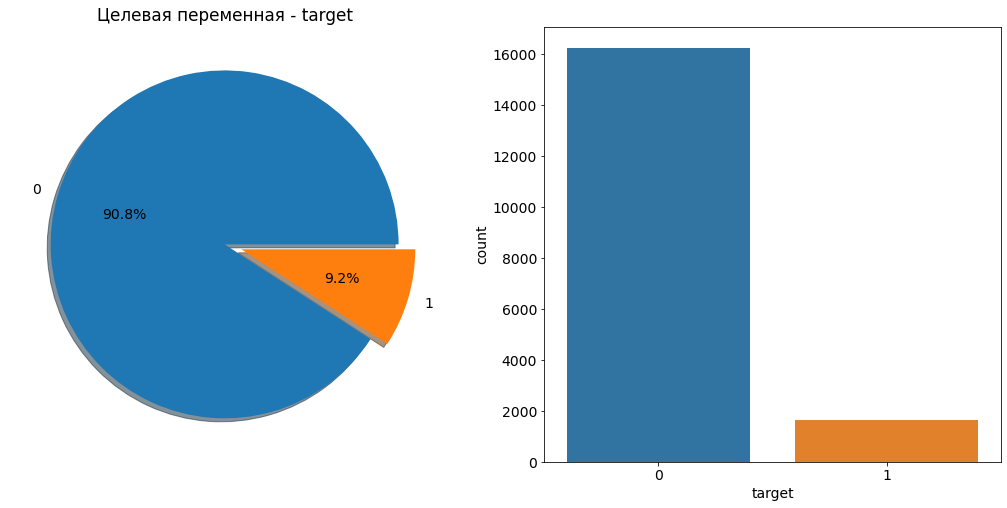

In [14]:
f, ax=plt.subplots(1, 2, figsize=(18, 8))
data['target'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Целевая переменная - target')
ax[0].set_ylabel('')
sns.countplot('target', data=data, ax=ax[1])
plt.show()

###  Обработка выбросов и пропусков

In [15]:
data.isnull().sum()

Mean of the integrated profile                  0
Standard deviation of the integrated profile    0
Excess kurtosis of the integrated profile       0
Skewness of the integrated profile              0
Mean of the DM-SNR curve                        0
Standard deviation of the DM-SNR curve          0
Excess kurtosis of the DM-SNR curve             0
Skewness of the DM-SNR curve                    0
target                                          0
dtype: int64

### Корреляция признаков

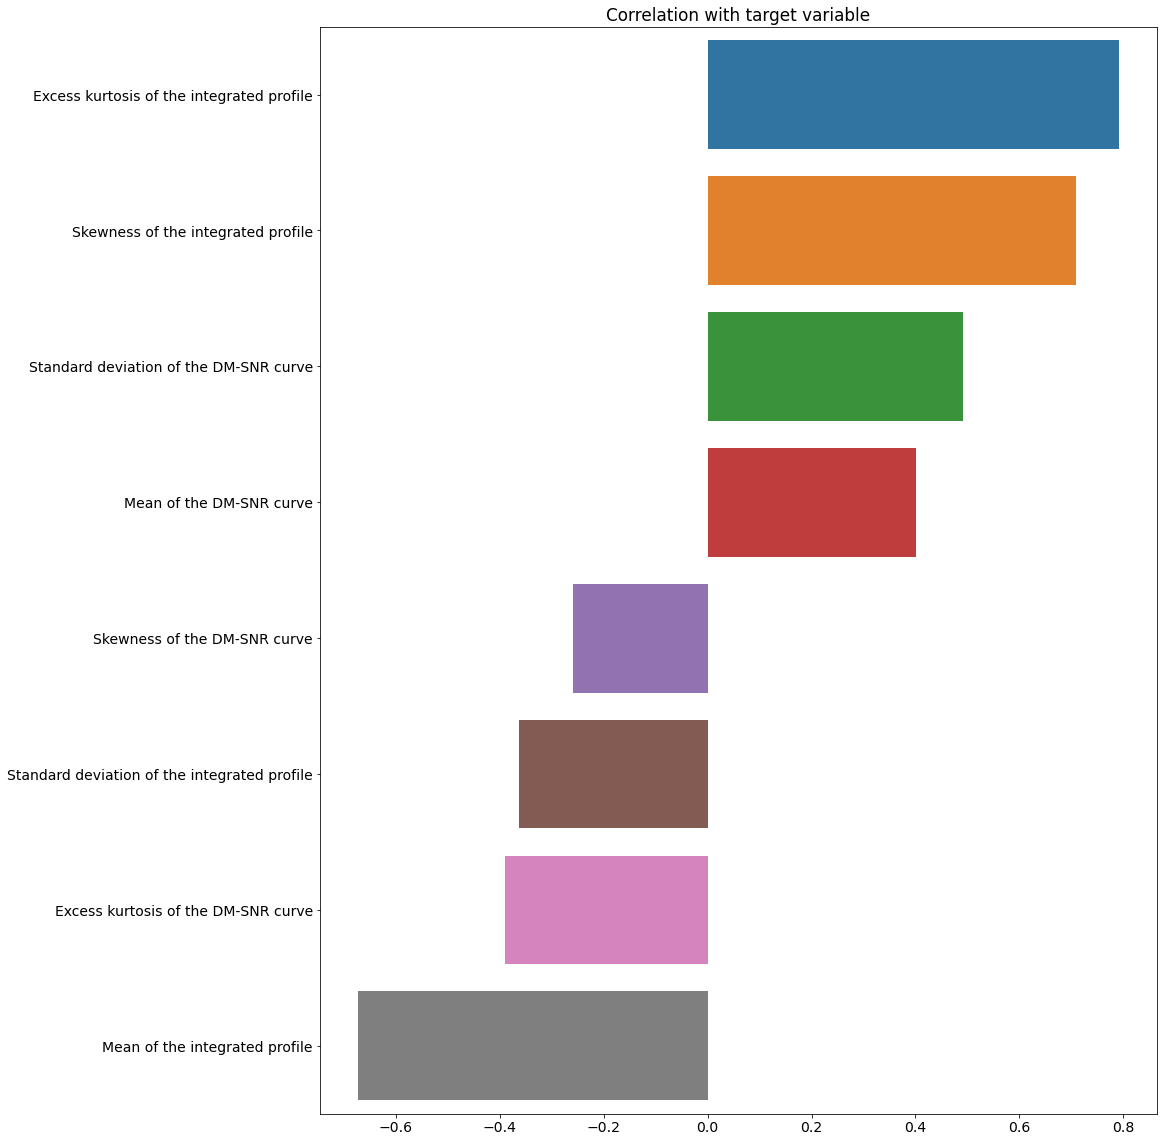

In [16]:
TARGET_NAME = 'target'

corr_with_target = data.corr()[TARGET_NAME].sort_values(ascending=False)[1:]
plt.figure(figsize=(15, 20))
sns.barplot(x=corr_with_target.values, y=corr_with_target.index)
plt.title('Correlation with target variable')
plt.show()

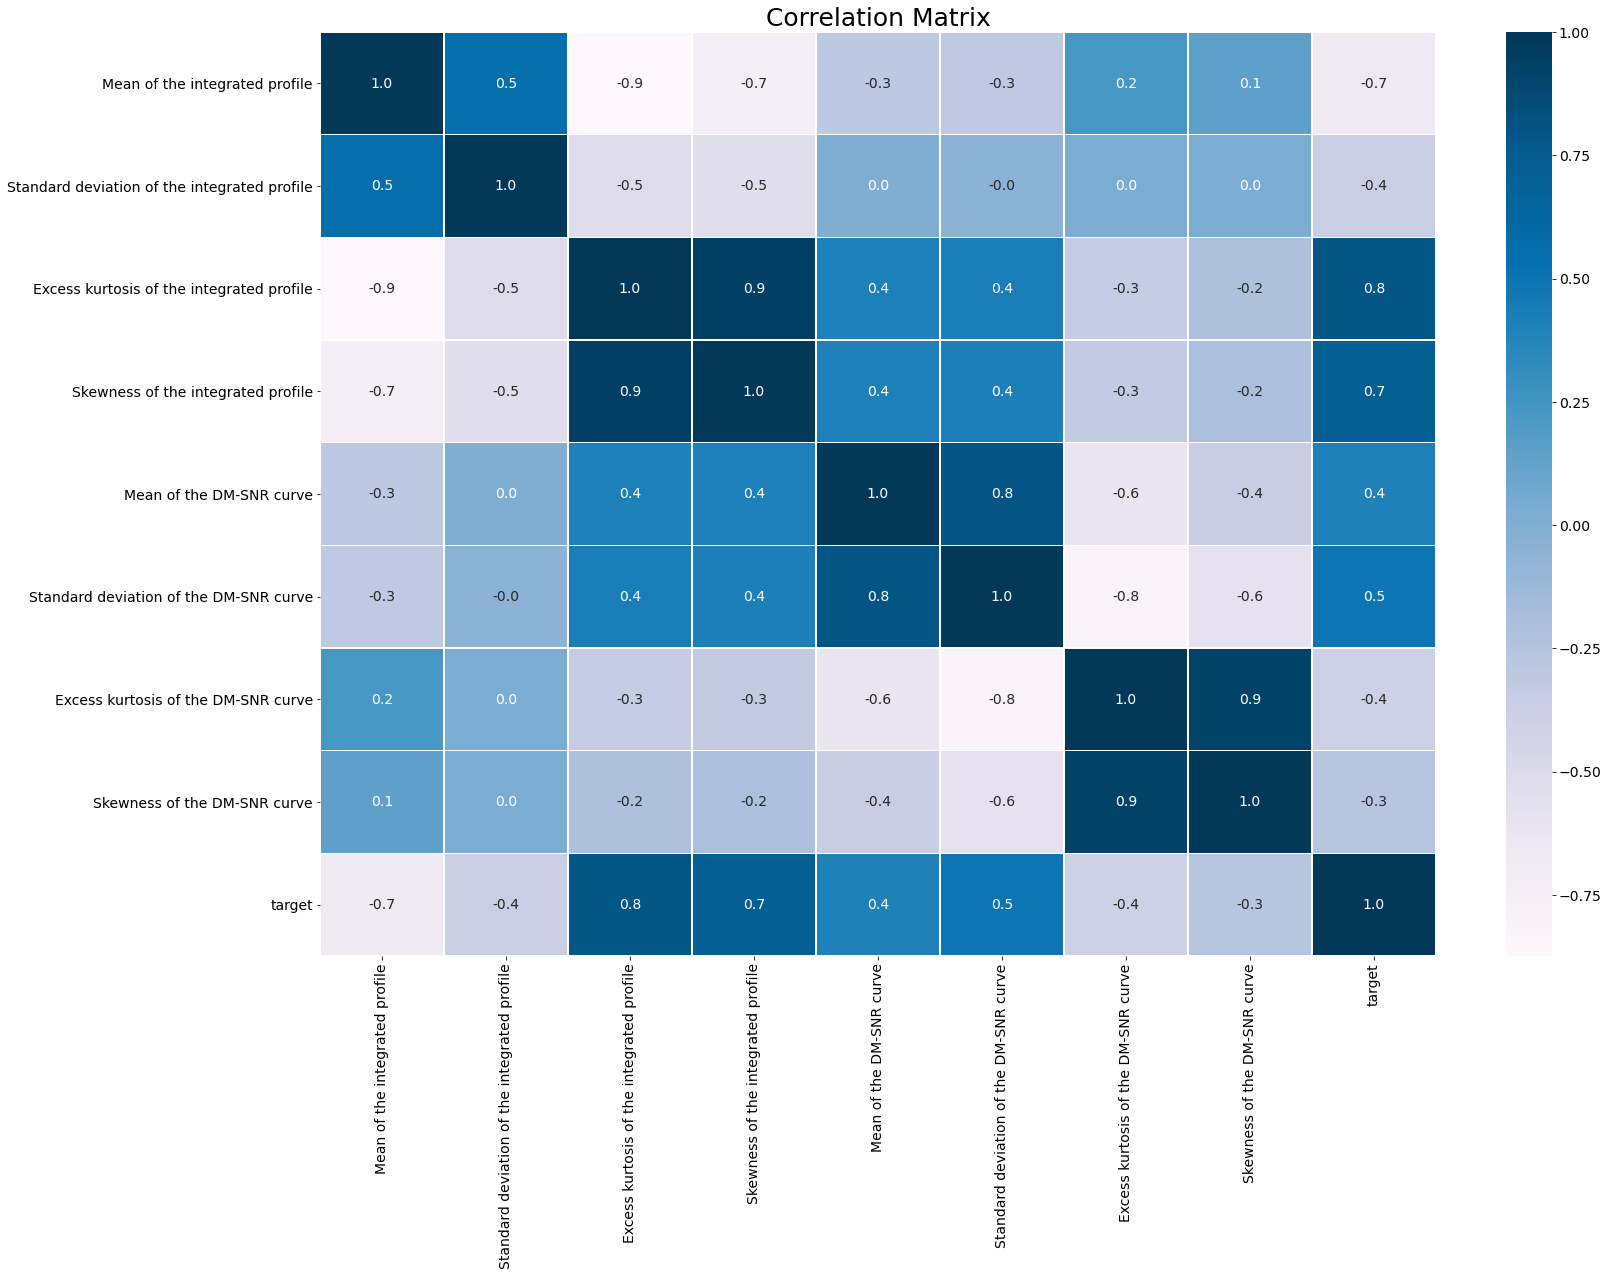

In [17]:
# Correlation Matrix
f, ax = plt.subplots(figsize = [25, 17])
sns.heatmap(data.corr(), annot=True, fmt='.1f', linewidths=.5, ax=ax, cmap = 'PuBu' )
ax.set_title('Correlation Matrix', fontsize=25)
plt.show()

### Feature engineering

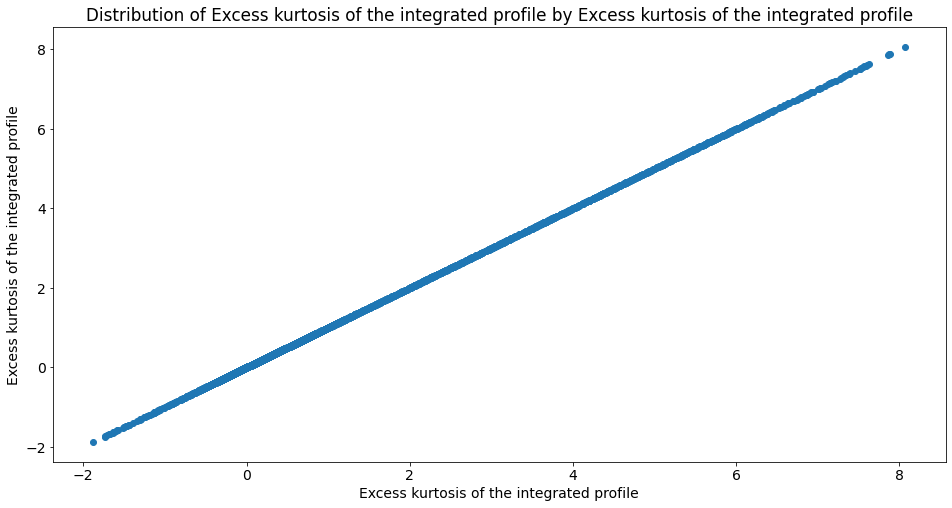

In [18]:
plt.figure(figsize = (16, 8))
plt.scatter(data['Excess kurtosis of the integrated profile'], data['Excess kurtosis of the integrated profile'])
plt.ylabel('Excess kurtosis of the integrated profile')
plt.xlabel('Excess kurtosis of the integrated profile')
plt.title('Distribution of Excess kurtosis of the integrated profile by Excess kurtosis of the integrated profile')
plt.show();

In [19]:
data['Excess kurtosis of the integrated profile'].describe([.01,.1,.25,.5,.75,.9,.91,.92,.93,.94,.95,.96])

count   17897.00000
mean        0.47790
std         1.06406
min        -1.87601
1%         -0.47919
10%        -0.13319
25%         0.02711
50%         0.22324
75%         0.47335
90%         0.89182
91%         1.01816
92%         1.21621
93%         1.61137
94%         2.13656
95%         2.70675
96%         3.34544
max         8.06952
Name: Excess kurtosis of the integrated profile, dtype: float64

In [20]:
# data.drop('Skewness of the integrated profile', axis=1, inplace=True)
# data.drop('Excess kurtosis of the DM-SNR curve', inplace=True)

### PyCaret 2 Classification

In [21]:
from pycaret.classification import *

In [22]:
clf1 = setup(data = data, 
             target = 'target',
             silent = True)

,Description,Value
0,session_id,7654
1,Target,target
2,Target Type,Binary
3,Label Encoded,"0: 0, 1: 1"
4,Original Data,"(17897, 9)"
5,Missing Values,False
6,Numeric Features,8
7,Categorical Features,0
8,Ordinal Features,False
9,High Cardinality Features,False


### Compare Baseline

In [23]:
best_model = compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.9820,0.9813,0.8635,0.9322,0.8963,0.8865,0.8874,14.4330
rf,Random Forest Classifier,0.9809,0.9729,0.8511,0.9314,0.8892,0.8788,0.8800,0.6340
et,Extra Trees Classifier,0.9808,0.9726,0.8440,0.9363,0.8875,0.8770,0.8786,0.3250
lightgbm,Light Gradient Boosting Machine,0.9808,0.9801,0.8599,0.9222,0.8897,0.8793,0.8800,0.9380
ada,Ada Boost Classifier,0.9793,0.9787,0.8280,0.9350,0.8780,0.8668,0.8689,0.2630
lr,Logistic Regression,0.9791,0.9794,0.8280,0.9322,0.8766,0.8653,0.8673,0.7860
gbc,Gradient Boosting Classifier,0.9776,0.9775,0.8502,0.8966,0.8726,0.8604,0.8608,0.9500
lda,Linear Discriminant Analysis,0.9762,0.9781,0.7810,0.9457,0.8552,0.8424,0.8471,0.0190
knn,K Neighbors Classifier,0.9733,0.9371,0.7882,0.9037,0.8417,0.8272,0.8297,0.0840
ridge,Ridge Classifier,0.9722,0.0000,0.7190,0.9636,0.8231,0.8084,0.8188,0.0160


### Create Model

In [24]:
model_cbc = create_model('catboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9792,0.9781,0.8673,0.8991,0.8829,0.8715,0.8717
1,0.9904,0.9914,0.9381,0.9550,0.9464,0.9412,0.9412
2,0.9800,0.9909,0.8496,0.9231,0.8848,0.8739,0.8748
3,0.9832,0.9783,0.8673,0.9423,0.9032,0.8941,0.8950
4,0.9848,0.9852,0.8673,0.9608,0.9116,0.9034,0.9048
5,0.9761,0.9681,0.8142,0.9109,0.8598,0.8468,0.8484
6,0.9856,0.9799,0.8761,0.9612,0.9167,0.9088,0.9100
7,0.9840,0.9821,0.8661,0.9510,0.9065,0.8978,0.8990
8,0.9792,0.9773,0.8571,0.9057,0.8807,0.8694,0.8698
9,0.9776,0.9815,0.8319,0.9126,0.8704,0.8582,0.8593


### Tune Hyperparameters

In [25]:
tuned_cbc = tune_model(model_cbc)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.9761,0.9777,0.8496,0.8807,0.8649,0.8517,0.8519
1,0.9872,0.9901,0.8938,0.9619,0.9266,0.9196,0.9204
2,0.9792,0.9916,0.8496,0.9143,0.8807,0.8694,0.8701
3,0.9808,0.9744,0.8673,0.9159,0.8909,0.8804,0.8808
4,0.9824,0.9849,0.8673,0.9333,0.8991,0.8895,0.8902
5,0.9745,0.9717,0.8053,0.9010,0.8505,0.8366,0.8381
6,0.9856,0.9840,0.8850,0.9524,0.9174,0.9096,0.9103
7,0.9840,0.9808,0.8571,0.9600,0.9057,0.8970,0.8987
8,0.9792,0.9755,0.8571,0.9057,0.8807,0.8694,0.8698
9,0.9784,0.9784,0.8319,0.9216,0.8744,0.8627,0.8640


### Analyze Model

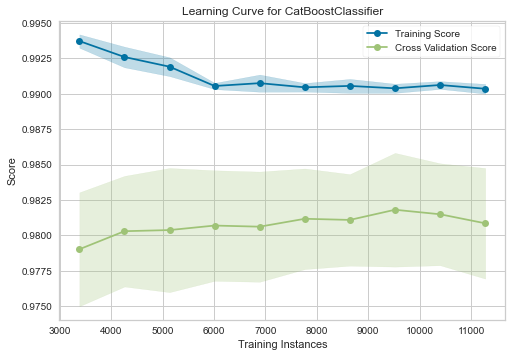

In [26]:
# Learning Curve
plot_model(estimator = tuned_cbc, plot = 'learning')

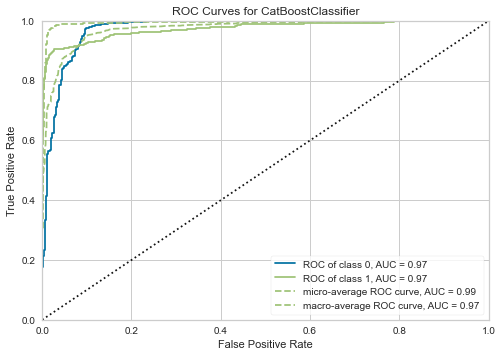

In [27]:
# AUC Curve
plot_model(estimator = tuned_cbc, plot = 'auc')

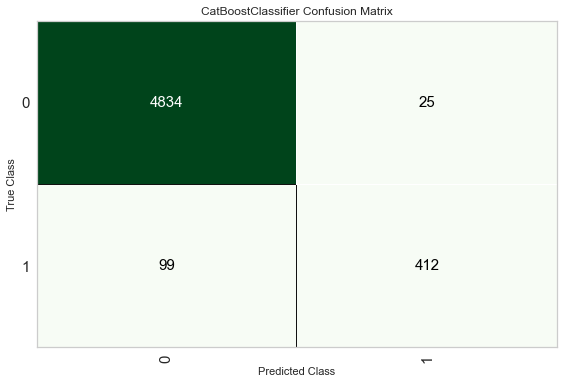

In [28]:
# Confusion Matrix
plot_model(estimator = tuned_cbc, plot = 'confusion_matrix')

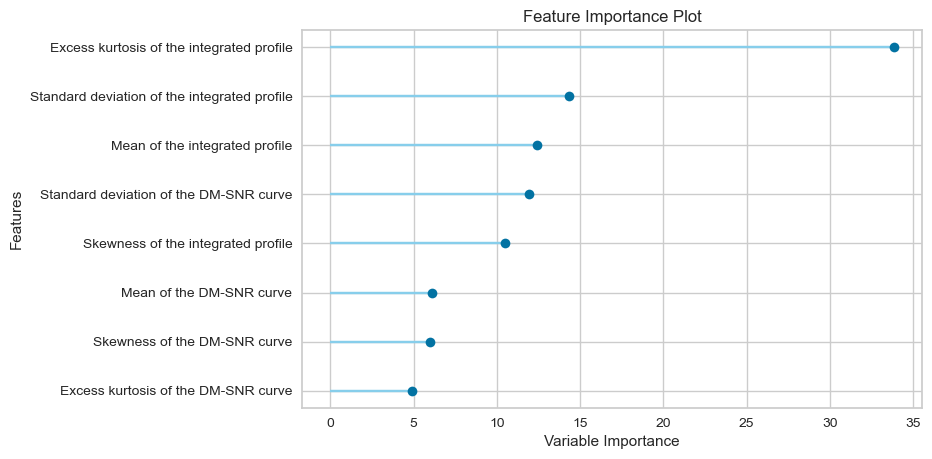

In [29]:
# Feature Importance
plot_model(estimator = tuned_cbc, plot = 'feature')

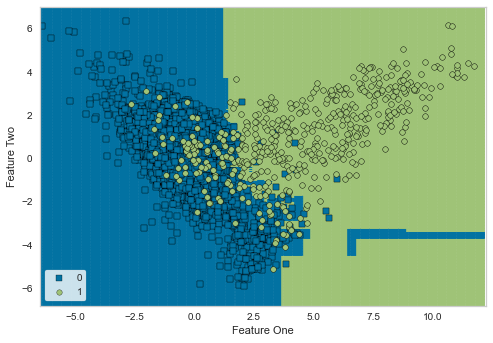

In [30]:
plot_model(tuned_cbc, plot = 'boundary')

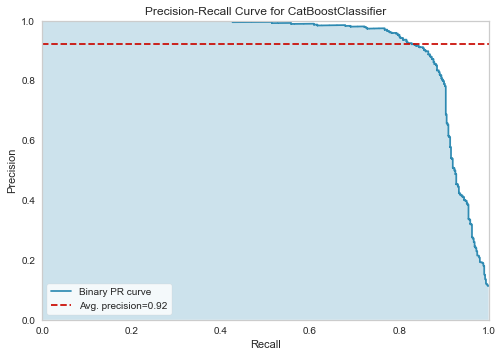

In [31]:
plot_model(tuned_cbc, plot = 'pr')

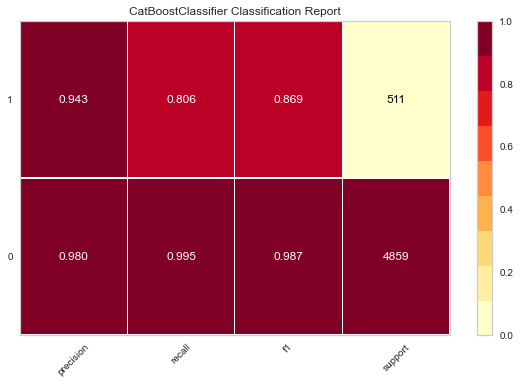

In [32]:
plot_model(tuned_cbc, plot = 'class_report')

In [33]:
evaluate_model(tuned_cbc)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

### Interpret Model

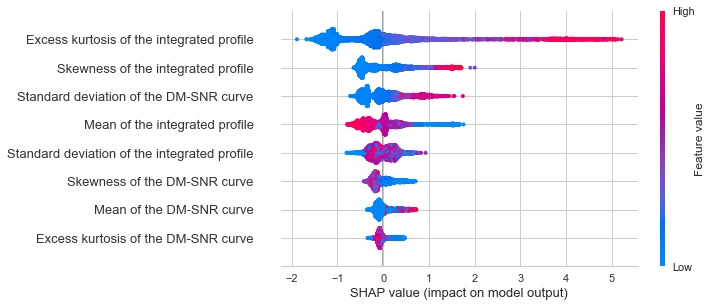

In [34]:
interpret_model(tuned_cbc)

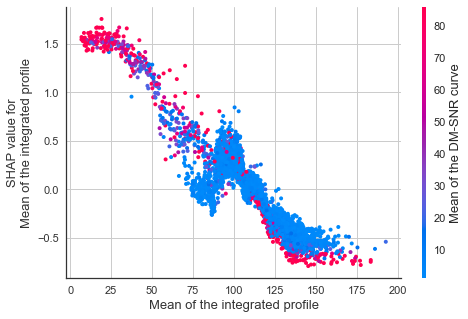

In [35]:
interpret_model(tuned_cbc, plot = 'correlation')

### Predict Model

In [36]:
predictions = predict_model(tuned_cbc)
predictions.head()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.9769,0.9740,0.8063,0.9428,0.8692,0.8566,0.8598


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target,Label,Score
0,97.78125,43.75909,0.65404,1.00002,1.45903,11.89408,12.26549,200.86324,0,0,0.98630
1,112.19531,48.35078,0.46932,0.53887,2.05184,13.26344,10.58716,151.23570,0,0,0.98920
2,121.28906,50.42881,-0.00470,-0.38869,1.83779,16.18751,10.16301,113.97882,0,0,0.99940
3,96.72656,46.70130,0.28609,0.08570,2.92224,17.82847,8.21543,79.74059,0,0,0.99580
4,138.46094,49.47741,-0.22800,-0.29396,3.86288,23.27086,7.97844,69.86874,0,0,0.99930


### Save / Load Model

In [37]:
save_model(tuned_cbc, model_name='model_cbc')

Transformation Pipeline and Model Succesfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=[],
                                       display_types=False, features_todrop=[],
                                       id_columns=[],
                                       ml_usecase='classification',
                                       numerical_features=[], target='target',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_categorical=None,
                                 fill_value_numerical=None,
                                 numeric_stra...
                 ('binn', 'passthrough'), ('rem_outliers', 'passthrough'),
                 ('cluster_all', 'passthrough'),
                 ('dummy', Dummify(target='target')),
                 ('fix_perfect', Remove_100(target='target')),
                 ('clean_names', 

In [47]:
# import requests
# url = 'http://127.0.0.1:8080/predict_api'
# pred = requests.post(url, json={'Mean of the integrated profile':124, 'Standard deviation of the integrated profile':44,
#                                 'Excess kurtosis of the integrated profile':1, 'Skewness of the integrated profile':2, 
#                                 'Mean of the DM-SNR curve':4, 'Standard deviation of the DM-SNR curve':11, 
#                                 'Excess kurtosis of the DM-SNR curve':7, 'Skewness of the DM-SNR curve':37})
# print(pred.json())

In [77]:
# from pycaret.utils import check_metric
# unseen_predictions = predict_model(tuned_cbc, data)
# unseen_predictions.head()

# check_metric(unseen_predictions['Mean of the integrated profile'], unseen_predictions['Standard deviation of the integrated profile'], 'AUC')

ValueError: y contains previously unseen labels: [24.77204176, 24.79161196, 24.89821075, 25.22005568, 25.69524955, 25.77171107, 26.12268115, 26.17979708, 26.33786912, 26.42932493, 26.54803719, 26.77655935, 26.87120136, 26.87318194, 26.91907723, 26.94351731, 26.97045186, 27.08075196, 27.12944592, 27.20264934, 27.33598885, 27.358580800000002, 27.46103418, 27.47073083, 27.540151799999997, 27.59755313, 27.61143858, 27.61239461, 27.64882382, 27.64931057, 27.66543699, 27.68022884, 27.71865201, 27.75449424, 27.79157284, 27.81156841, 27.84048802, 27.89995795, 27.96726602, 27.99158896, 28.01157249, 28.02936758, 28.03990491, 28.104262100000003, 28.11159403, 28.11690422, 28.154020399999997, 28.21013157, 28.22619706, 28.23800107, 28.26494588, 28.27726038, 28.29260714, 28.30176117, 28.33503174, 28.34305122, 28.35478613, 28.36754789, 28.37098914, 28.42734945, 28.46652022, 28.46653737, 28.46784096, 28.48169535, 28.49122672, 28.51817091, 28.56406844, 28.5790946, 28.60482624, 28.60955847, 28.65708385, 28.66604164, 28.68341049, 28.69871445, 28.70831621, 28.71866499, 28.72603345, 28.7357036, 28.73689303, 28.73882149, 28.75478476, 28.79788705, 28.83221939, 28.83903397, 28.87078906, 28.884316, 28.91509894, 28.9287402, 28.93405335, 28.9681, 28.96839603, 28.976728899999998, 28.97718914, 29.00127961, 29.00134695, 29.00583248, 29.0109043, 29.01304491, 29.04988701, 29.0527695, 29.07773458, 29.07808302, 29.1192396, 29.12390921, 29.13113116, 29.13139934, 29.15315163, 29.15505151, 29.15629919, 29.16755939, 29.168706099999998, 29.17210096, 29.17976594, 29.1863624, 29.19766013, 29.19778555, 29.21214414, 29.24998331, 29.2907702, 29.29753645, 29.29766978, 29.305893400000002, 29.32728838, 29.35649351, 29.36336102, 29.38290182, 29.38773722, 29.39053778, 29.41856809, 29.43078148, 29.44503681, 29.45676681, 29.46233589, 29.47191045, 29.4766153, 29.49823613, 29.50364119, 29.51050756, 29.53148148, 29.54938163, 29.57761634, 29.64315356, 29.64659085, 29.67901914, 29.67930397, 29.69499905, 29.7163583, 29.72375664, 29.72941018, 29.73262607, 29.73344717, 29.75528035, 29.75849139, 29.777141600000004, 29.78327376, 29.7943472, 29.80371886, 29.81593517, 29.85387488, 29.86770554, 29.88020413, 29.88231719, 29.89574883, 29.89607549, 29.93177362, 29.93477508, 29.94588116, 29.94769101, 29.94865398, 29.9672174, 29.97505066, 29.975232899999998, 29.98361776, 30.01346947, 30.01874008, 30.01898813, 30.03239523, 30.03448437, 30.05508858, 30.0577234, 30.06208481, 30.070230300000002, 30.09794801, 30.09840226, 30.09846208, 30.11476158, 30.12093848, 30.13349105, 30.16257119, 30.16767817, 30.17303209, 30.20093738, 30.20666022, 30.20948083, 30.21265673, 30.21728664, 30.22168157, 30.23624328, 30.23704769, 30.237713800000005, 30.24216126, 30.24826373, 30.26219953, 30.27033855, 30.28134574, 30.30164009, 30.30185058, 30.31609897, 30.32260523, 30.32766615, 30.32817632, 30.3327896, 30.34062806, 30.34843231, 30.35100546, 30.35849844, 30.35862209, 30.36908379, 30.37918627, 30.38473895, 30.38780815, 30.39717153, 30.4054591, 30.41066579, 30.41825844, 30.42006427, 30.43103335, 30.45536164, 30.45724843, 30.46456702, 30.46501179, 30.46526823, 30.47565226, 30.50015909, 30.50074342, 30.5112044, 30.51132842, 30.51280369, 30.53428749, 30.54297749, 30.54907281, 30.55166503, 30.55514594, 30.57549311, 30.61664028, 30.63131312, 30.64195561, 30.65678258, 30.65737188, 30.66018387, 30.67129692, 30.67137751, 30.67411459, 30.67586556, 30.68170372, 30.68319467, 30.68615943, 30.70063603, 30.71452854, 30.71520119, 30.71602782, 30.71628217, 30.71820956, 30.72009709, 30.72172226, 30.75098349, 30.75533093, 30.75907752, 30.77111092, 30.79115878, 30.80187681, 30.8046984, 30.80882232, 30.81116884, 30.81923319, 30.82317794, 30.83268921, 30.83371164, 30.83638384, 30.84132383, 30.84166719, 30.84612453, 30.85186914, 30.85392753, 30.85601248, 30.85634776, 30.86867344, 30.87137722, 30.87179635, 30.88760082, 30.89115749, 30.89288825, 30.89498341, 30.8956788, 30.89841972, 30.90200675, 30.90303873, 30.90489819, 30.92014092, 30.924080699999998, 30.92426228, 30.95132267, 30.95610926, 30.95838941, 30.97351124, 30.98032074, 30.98588388, 30.99152086, 31.00167645, 31.00626433, 31.00699266, 31.00790206, 31.03494656, 31.05004781, 31.05348268, 31.056887699999997, 31.05816117, 31.06385871, 31.09008694, 31.09633705, 31.10226014, 31.10426958, 31.11460905, 31.11821333, 31.130332399999997, 31.17166647, 31.17277861, 31.17769369, 31.18037459, 31.217072499999997, 31.24995215, 31.25374978, 31.26399296, 31.26498762, 31.26585535, 31.27058599, 31.27579307, 31.29120721, 31.29615342, 31.29735377, 31.31701798, 31.31772252, 31.32839775, 31.33563267, 31.345853, 31.35154498, 31.35327369, 31.36148862, 31.37139604, 31.39848707, 31.41343201, 31.42717645, 31.42721238, 31.43783782, 31.44636741, 31.46277562, 31.4644119, 31.46469123, 31.47045676, 31.47217506, 31.483749800000002, 31.48978997, 31.50238319, 31.52005868, 31.52227867, 31.52305704, 31.53531859, 31.54132953, 31.55757136, 31.56628129, 31.578136600000004, 31.60016993, 31.60576301, 31.60658663, 31.62276116, 31.63276523, 31.64136091, 31.641543199999997, 31.65326426, 31.67305726, 31.67775888, 31.689925899999995, 31.69202615, 31.702411699999995, 31.70273514, 31.70883369, 31.71164387, 31.719623600000002, 31.73242855, 31.75706487, 31.75819495, 31.76927549, 31.80509722, 31.813435300000002, 31.81401949, 31.82096274, 31.8212773, 31.82142787, 31.82363739, 31.83107325, 31.83860898, 31.87155312, 31.87755811, 31.88088181, 31.88994365, 31.900219800000002, 31.90383098, 31.90849573, 31.90917955, 31.92140368, 31.92783611, 31.93069583, 31.94664799, 31.94728992, 31.96163166, 31.97007497, 31.97499252, 31.9785838, 31.98659616, 31.99104851, 31.99839779, 31.99993896, 32.01401118, 32.01689846, 32.01956246, 32.02562069, 32.02610858, 32.03092607, 32.05543199, 32.06024507, 32.07074927, 32.0762641, 32.0807354, 32.11964081, 32.12457061, 32.13199097, 32.13777922, 32.14599493, 32.15723604, 32.16681583, 32.19229238, 32.19546227, 32.20137747, 32.21951912, 32.22858043, 32.228666600000004, 32.25301282, 32.25626378, 32.25859015, 32.25896193, 32.26151892, 32.26887469, 32.27802709, 32.28696612, 32.2915793, 32.30154251, 32.33763435, 32.35297178, 32.35371129, 32.36366291, 32.37258678, 32.375, 32.39553147, 32.3964537, 32.3997854, 32.40023374, 32.40571887, 32.41400036, 32.4159812, 32.41961118, 32.42293955, 32.42348923, 32.42798512, 32.43803814, 32.44086793, 32.45598639, 32.460789899999995, 32.47891349, 32.48008611, 32.48046194, 32.51237651, 32.51387925, 32.52236216, 32.5392407, 32.54461237, 32.55200823, 32.5579327, 32.56178678, 32.59413856, 32.60789538, 32.61248469, 32.61278507, 32.61408761, 32.61747006, 32.61985019, 32.63637908, 32.6375236, 32.63981999, 32.64085687, 32.64199375, 32.65374448, 32.65825353, 32.66119505, 32.66932678, 32.6716611, 32.68887332, 32.6906284, 32.70588987, 32.70624817, 32.71222401, 32.71276509, 32.71675671, 32.71704773, 32.72242753, 32.73132444, 32.745585600000005, 32.74862458, 32.76576937, 32.77156673, 32.77202489, 32.78133844, 32.78693945, 32.79384887, 32.80286968, 32.80954972, 32.81247675, 32.81416569, 32.81452375, 32.83981006, 32.83991414, 32.86580399, 32.87238211, 32.87629865, 32.87727145, 32.8836988, 32.88418416, 32.89010076, 32.89510343, 32.89917125, 32.902080100000006, 32.90311521, 32.90328865, 32.91992738, 32.92190744, 32.92258227, 32.93102755, 32.9374407, 32.9406343, 32.94164689, 32.94681494, 32.94796071, 32.94797831, 32.96576927, 32.99665492, 33.00093216, 33.00419821, 33.01448897, 33.01834891, 33.01868164, 33.02345044, 33.02495117, 33.02708757, 33.05969019, 33.07243674, 33.07724207, 33.07959373, 33.08171922, 33.08316934, 33.08343132, 33.09169537, 33.0961761, 33.10962847, 33.11685852, 33.11786111, 33.12472638, 33.12523585, 33.13215946, 33.14618924, 33.15237574, 33.15377491, 33.15730202, 33.16397692, 33.18200339, 33.18290929, 33.18596983, 33.19097204, 33.19808785, 33.21017572, 33.21632458, 33.22847929, 33.23977389, 33.24282461, 33.25187965, 33.25263496, 33.25357931, 33.25661408, 33.26666347, 33.27476371, 33.28484062, 33.28849686, 33.30166536, 33.32138773, 33.32567458, 33.33234689, 33.34421769, 33.34727532, 33.35414552, 33.36440243, 33.38165605, 33.39859649, 33.40481664, 33.41374649, 33.42691129, 33.43252007, 33.43276836, 33.43997873, 33.44468381, 33.44879975, 33.44943931, 33.45294255, 33.46745792, 33.46747707, 33.46880744, 33.47640479, 33.49469043, 33.4957874, 33.49746011, 33.50670409, 33.51194163, 33.52195726, 33.52211476, 33.53140927, 33.53258148, 33.55243099, 33.56314012, 33.57417944, 33.57727794, 33.578134999999996, 33.5997669, 33.61745439, 33.61793824, 33.62587127, 33.628891499999995, 33.63151129999999, 33.64172356, 33.64841392, 33.64970268, 33.65017699, 33.65262192, 33.65727642, 33.67165386, 33.67180974, 33.67392685, 33.67824313, 33.68233959, 33.68274187, 33.68418695, 33.69695539, 33.70518491, 33.70758964, 33.709057200000004, 33.71311642, 33.72404872, 33.72816043, 33.73181567, 33.73487707, 33.73575274, 33.73786584, 33.73927691, 33.74845826, 33.75472243, 33.7554674, 33.762291600000005, 33.76544424, 33.76680625, 33.77258992, 33.77730377, 33.78335935, 33.78537552, 33.78982658, 33.79489112, 33.79765787, 33.80432188, 33.80759607, 33.81490341, 33.81635549, 33.81891023, 33.83217715, 33.84292672, 33.85324828, 33.85786799, 33.85877923, 33.86320352, 33.86946449, 33.88063549, 33.88292328, 33.88554956, 33.88645646, 33.88750112, 33.88828369, 33.89633982, 33.90237593, 33.90840197, 33.91158422, 33.92039505, 33.92182012, 33.93800356, 33.94751234, 33.95874303, 33.95936849, 33.97077584, 33.97361899, 33.97368636, 33.97733674, 33.9782349, 33.97998894, 33.98936745, 33.98983074, 33.99079322, 33.99115863, 33.99355031, 33.99676857, 34.00120542, 34.00238029, 34.00579336, 34.00795159, 34.00899521, 34.01161534, 34.02003427, 34.03146522, 34.03703804, 34.03949912, 34.042065799999996, 34.05266128, 34.06590794, 34.07609301, 34.08719629, 34.08726791, 34.08972536, 34.09441506, 34.09646296, 34.10070965, 34.1015795, 34.10628547, 34.10782177, 34.11174408, 34.11693525, 34.12282144, 34.13255321, 34.1337477, 34.13933064, 34.15249633, 34.15622141, 34.16860981, 34.17049609, 34.17158207, 34.17480679, 34.18167137, 34.18251417, 34.18525758, 34.18674213, 34.18788562, 34.19051346, 34.20433486, 34.211082899999994, 34.21545985, 34.21580948, 34.21633749, 34.21811411, 34.23376436, 34.23393552, 34.23402556, 34.2397196, 34.24022496, 34.24163672, 34.24894145, 34.2523941, 34.25834521, 34.25918612, 34.26230105, 34.26416436, 34.26618787, 34.26724232, 34.27645587, 34.27838607, 34.27946152, 34.2826031, 34.28932416, 34.29272736, 34.29703872, 34.30105595, 34.30937539, 34.313606400000005, 34.31466296, 34.32339521, 34.323992700000005, 34.33163369, 34.33719157, 34.34239576, 34.34781596, 34.35314291, 34.3535018, 34.35408099, 34.35645807, 34.362238399999995, 34.36476765, 34.36614144, 34.36910372, 34.37203023, 34.37587978, 34.37855007, 34.38146246, 34.38625437, 34.38655701, 34.38880405, 34.39368012, 34.39420539, 34.40059328, 34.41220199, 34.41264984, 34.42626504, 34.43243781, 34.43596777, 34.44257208, 34.44594596, 34.44794728, 34.4482033, 34.45617457, 34.45875361, 34.45999435, 34.46250138, 34.46403154, 34.47353686, 34.47676697, 34.48241385, 34.48602012, 34.48770497, 34.49025334, 34.49028608, 34.50857482, 34.5110058, 34.51459493, 34.51683452, 34.51770008, 34.51878664, 34.51957877, 34.52150598, 34.52735767, 34.5291395, 34.53015765, 34.53140466, 34.53383404, 34.54612855, 34.5476126, 34.55234703, 34.55993488, 34.5648027, 34.56775149, 34.57083068, 34.57677994, 34.58462274, 34.58954356, 34.59376059, 34.6001425, 34.60665463, 34.61516952, 34.62227821, 34.62336061, 34.62832791, 34.62968771, 34.63137968, 34.63479949, 34.63965503, 34.64483581, 34.645250700000005, 34.64620201, 34.6523814, 34.65773551, 34.65809565, 34.66462418, 34.66538481, 34.67009699, 34.67032144, 34.67167432, 34.673924, 34.67417748, 34.68224904, 34.68831555, 34.6903152, 34.69084654, 34.69298591, 34.69352425, 34.70082796, 34.70666612, 34.71254638, 34.71462815, 34.71738577, 34.72141413, 34.72227986, 34.7300406, 34.73317569, 34.73926229999999, 34.74193979, 34.75280224, 34.75702141, 34.75804956, 34.76276235, 34.76421609, 34.76509392, 34.76585235, 34.77280825, 34.77314876, 34.77500839, 34.78722907, 34.79057654, 34.7940079, 34.79407807, 34.79673117, 34.80388344, 34.80523288, 34.8057914, 34.80975079, 34.81723697, 34.81915384, 34.8220364, 34.82207846, 34.82360685, 34.82781919, 34.82854208, 34.82899684, 34.83534705, 34.83560636, 34.83979798, 34.84128968, 34.84540355, 34.84964566, 34.85100033, 34.85348799, 34.86292564, 34.86703871, 34.87081961, 34.87481011, 34.87641319, 34.87805119, 34.88297872, 34.883132700000004, 34.89238128, 34.89357337, 34.894335999999996, 34.89470769, 34.89823025, 34.900962, 34.90189585, 34.90203837, 34.90334642, 34.91024257, 34.928218799999996, 34.92982642, 34.93042401, 34.93745021, 34.93760831, 34.9480886, 34.94836366, 34.9498385, 34.95064094, 34.95376061, 34.95607508, 34.95624707, 34.97226772, 34.98241397, 34.98312145, 34.98950736, 34.99026703, 34.99748875, 35.00419112, 35.00870079, 35.00902506, 35.010043200000005, 35.01822123, 35.02768767, 35.03557065, 35.03627358, 35.03700262, 35.03787014, 35.03993258, 35.04230058, 35.04257664, 35.04266025, 35.04272556, 35.04735131, 35.05597418, 35.06260793, 35.06366629, 35.07487718, 35.07570548, 35.07665208, 35.07706969, 35.08538344, 35.08675684, 35.08894599, 35.09389522, 35.09612828, 35.09885245, 35.09995493, 35.11918098, 35.12764027, 35.12802687, 35.13699386, 35.13764438, 35.14508069, 35.14509458, 35.14555393, 35.1464535, 35.14903311, 35.14908868, 35.14992651, 35.15109337, 35.157214399999994, 35.15745831, 35.16029143, 35.16456499, 35.16499804, 35.16916343, 35.17291185, 35.17332138, 35.17497331, 35.17659047, 35.17921472, 35.17954784, 35.18002581, 35.18197323, 35.18482779, 35.20330098, 35.20370062, 35.20604026, 35.21123391, 35.21131712, 35.21236407, 35.21295427, 35.21318653, 35.21363026, 35.2152829, 35.21984526, 35.22305372, 35.224582899999994, 35.22469639, 35.22546572, 35.23173493, 35.23426067, 35.25672794, 35.25723604, 35.26128753, 35.26295958, 35.26315344, 35.26877738, 35.27053559, 35.27274363, 35.27459249, 35.28001046, 35.28067478, 35.28309668, 35.2858782, 35.2894283, 35.29255175, 35.292966799999995, 35.29554004, 35.29603374, 35.29912547, 35.30420257, 35.31769787, 35.320214, 35.32198348, 35.32246731, 35.32262023, 35.3238289, 35.32897068, 35.33792986, 35.33981245, 35.34714838, 35.35840144, 35.36340012, 35.37405793, 35.37836432, 35.37943652, 35.38172142, 35.38570606, 35.38610881, 35.38766803, 35.39209693, 35.39433876, 35.39656666, 35.40057376, 35.40237457, 35.41097994, 35.42026904, 35.42431051, 35.42432429, 35.42457929, 35.42587493, 35.42820852, 35.42943081, 35.43007166, 35.43848861, 35.44437402, 35.44846267, 35.44936747, 35.4527144, 35.45803803, 35.46121805, 35.46127313, 35.46427216, 35.46840239, 35.46933851, 35.4721192, 35.47344063, 35.47736593, 35.48153335, 35.48277187, 35.48414795, 35.48519718, 35.49088998, 35.49177993, 35.49944896, 35.50203215, 35.50435214, 35.51135588, 35.51141346, 35.51824654, 35.5229315, 35.52886477, 35.53078276, 35.5308927, 35.53133847, 35.53248593, 35.54002252, 35.54202148, 35.543079299999995, 35.543313700000006, 35.54360133, 35.54373183, 35.54381426, 35.54540176, 35.55057673, 35.55078619, 35.56226573, 35.573728700000004, 35.57522479, 35.58003947, 35.58108501, 35.58677277, 35.58702746, 35.59738170000001, 35.60469542, 35.6047357, 35.60601194, 35.61249781, 35.61628783, 35.61975616, 35.61992494, 35.62097616, 35.62169667, 35.62334066, 35.62582236, 35.62587376, 35.62619841, 35.62719292, 35.62936428, 35.63108501, 35.632222399999996, 35.63327755, 35.6335576, 35.63397553, 35.63490731, 35.63500322, 35.63585018, 35.63790542, 35.64510038, 35.64581355, 35.65651019, 35.65658893, 35.65868662, 35.65974782, 35.67671685, 35.67857471, 35.68515258, 35.69182329, 35.69690437, 35.69948354, 35.70467721, 35.70472764, 35.70929497, 35.7157074, 35.72510521, 35.725680100000005, 35.72636005, 35.72677349, 35.72920273, 35.73713079, 35.73898893, 35.73930316, 35.75038243, 35.75061376, 35.75171321, 35.7564589, 35.7580711, 35.76175011, 35.7617979, 35.76189433, 35.76636477, 35.76905838, 35.76968205, 35.77222525, 35.77394508, 35.77982308, 35.7836167, 35.78453519, 35.78516286, 35.7864625, 35.79115583, 35.79190275, 35.79315782, 35.79475728, 35.7967045, 35.79743681, 35.80086031, 35.80261286, 35.80366383, 35.80437299, 35.80550403, 35.80726316, 35.81045138, 35.81109478, 35.81498734, 35.81887947, 35.82863606, 35.82889755, 35.83932838, 35.84012623, 35.84079379999999, 35.84259803, 35.843599299999994, 35.84538381, 35.84882742, 35.84937224, 35.85279334, 35.85287591, 35.85582346, 35.85939798, 35.86274834, 35.86444936, 35.86557936, 35.86943282, 35.87170267, 35.87242665, 35.87245387, 35.87459083, 35.87466994, 35.87535047, 35.88049742, 35.88435524, 35.88477705, 35.89067262, 35.90022183, 35.9072019, 35.90731069, 35.90755461, 35.92031858, 35.92575555, 35.92668231, 35.92737544, 35.92760648, 35.93063708, 35.93838229, 35.95045198, 35.95090782, 35.95156994, 35.95555847, 35.95929281, 35.96151032, 35.96755452, 35.97432556, 35.97664902, 35.98113859, 35.98674615, 35.99796205, 36.00058915, 36.00939056, 36.01014397, 36.01016346, 36.01036092, 36.01041431, 36.01322101, 36.01434634, 36.01683837, 36.01763399, 36.01835673, 36.02363912, 36.02988719, 36.03161504, 36.03784564, 36.04512333, 36.04550262, 36.05716151, 36.06054682, 36.06180184, 36.06254654, 36.06473316, 36.06895032, 36.06991823, 36.07064669, 36.070656, 36.07348931, 36.07349269, 36.07374902, 36.07714377, 36.08296308, 36.08592228, 36.09146367, 36.09270832, 36.09306598, 36.09426322, 36.10158194, 36.10547615, 36.10665945, 36.10692992, 36.10822136, 36.11038578, 36.11765898, 36.11857828, 36.12266749, 36.12305358, 36.12531088, 36.12702403, 36.1292135, 36.13050077, 36.13531072, 36.14234334, 36.15237984, 36.15467582, 36.15831279, 36.16111054, 36.16210974, 36.16312917, 36.16333593, 36.16541519, 36.16598224, 36.16675433, 36.1692654, 36.1724352, 36.17374708, 36.17555664, 36.17630491, 36.17702785, 36.17825605, 36.17851164, 36.1809114, 36.18161653, 36.18309339, 36.18849763, 36.19048101, 36.19080481, 36.19127028, 36.19790084, 36.19837043, 36.21364607, 36.2137, 36.21635022, 36.21914012, 36.21959848, 36.22308318, 36.22523063, 36.22801057, 36.24368799, 36.25515774, 36.25715766, 36.25770056, 36.25797326, 36.25836296, 36.2672701, 36.26896056, 36.26905479999999, 36.28136355, 36.28255206, 36.28327877, 36.28494998, 36.28930974, 36.29014143, 36.29383715, 36.30256073, 36.30685113, 36.31309081, 36.31413289, 36.31727324, 36.31976634, 36.32174255, 36.3229331, 36.33286511, 36.33316749, 36.33333548, 36.33588627, 36.33759621, 36.33820089, 36.33967558, 36.34023572, 36.34363496, 36.34812957, 36.348155600000005, 36.3489893, 36.34910684, 36.350933700000006, 36.35241124, 36.35327087, 36.35842822, 36.36051228, 36.3679914, 36.37301326, 36.37545304, 36.37762337, 36.37928102, 36.37942866, 36.37945299, 36.38369406, 36.38400524, 36.3883003, 36.39118435, 36.39586007, 36.39956266, 36.39973704, 36.40009001, 36.40280882, 36.40915694, 36.41039324, 36.41158759, 36.42178367, 36.42416321, 36.4302496, 36.44772232, 36.45735081, 36.46909058, 36.47202682, 36.47317397, 36.47721674, 36.47941866, 36.47987124, 36.481406299999996, 36.48210228, 36.48439089, 36.49202526, 36.50298308, 36.50555127, 36.51241144, 36.51427024, 36.51543362, 36.51558071, 36.51577878, 36.52053882, 36.52498075, 36.52663756, 36.52677792, 36.52897685, 36.52973626, 36.53487204, 36.53675559, 36.5371941, 36.54243239, 36.56533693, 36.56548799, 36.57170607, 36.57185294, 36.57406918, 36.57415596, 36.57781463, 36.57998714, 36.58643631, 36.58748812, 36.58846484, 36.59809966, 36.60520259, 36.60811458, 36.60983848, 36.61186488, 36.61378615, 36.6168458, 36.62622652, 36.63710338, 36.63805545, 36.64221745, 36.64397889, 36.64560201, 36.64596426, 36.64684449, 36.6491886, 36.65549072, 36.65583623, 36.65605602, 36.66038913, 36.66089525, 36.6631419, 36.66751745, 36.668362200000004, 36.67326887, 36.68057108, 36.68413262, 36.69080053, 36.69404006, 36.6963088, 36.69803605, 36.69851836, 36.70146452, 36.70639337, 36.70745754, 36.70830885, 36.71591661, 36.7161269, 36.71724399, 36.71727972, 36.72261615, 36.72297848, 36.72622846, 36.72685333, 36.73086818, 36.73587948, 36.73882347, 36.73889075, 36.73999385, 36.74095074, 36.74720639, 36.75573603, 36.75870167, 36.76270557, 36.77525489, 36.77549804, 36.77795675, 36.78102432, 36.78224563, 36.78442265, 36.78451557, 36.78566957, 36.78626688, 36.78944574, 36.78946316, 36.79010271, 36.79869953, 36.7994119, 36.79959186, 36.80137977, 36.80182093, 36.80193287, 36.802600399999996, 36.80277537, 36.80421901, 36.80439397, 36.80485582, 36.820905100000004, 36.82102031, 36.82481274, 36.825628200000004, 36.83045177, 36.83863325, 36.84078043, 36.84103308, 36.84505869, 36.85308870000001, 36.85635122, 36.85748972, 36.86020542, 36.87393984, 36.87558262, 36.87576717, 36.87664771, 36.87685294, 36.87709789, 36.87754229, 36.88118245, 36.88320883, 36.88347029, 36.88452936, 36.88843687, 36.89786103, 36.89870051, 36.89955403, 36.90040174, 36.90306715, 36.90835025, 36.91036109, 36.91154753, 36.91493799, 36.92091868, 36.92812563, 36.92887682, 36.93297135, 36.93618385, 36.94025526, 36.94053697, 36.94498044, 36.94601131, 36.94645817, 36.94693642, 36.94735684, 36.94874776, 36.95092488, 36.95238091, 36.952831, 36.95287642, 36.95290945, 36.95335624, 36.95647035, 36.95816562, 36.96234937, 36.96294795, 36.96582763, 36.97618202, 36.97631408, 36.98097854, 36.98284019, 36.98491877, 36.98537177, 36.98620596, 36.98796834, 36.9945815, 36.99513996, 36.99994721, 37.00593725, 37.00647823, 37.00963158, 37.01198075, 37.01936782, 37.0241744, 37.02442909, 37.02884931, 37.03297398, 37.03445315, 37.03874858, 37.03883098, 37.03925283, 37.04412685, 37.05062784, 37.05508117, 37.0552393, 37.05540813, 37.05713016, 37.06030967, 37.06106395, 37.06431475, 37.06519327, 37.06555637, 37.07655457, 37.07709122, 37.08072908, 37.08127472, 37.08245323, 37.08515904, 37.08978759, 37.09220902, 37.09384214, 37.09446082, 37.09491412, 37.09835692, 37.10034101, 37.10183065, 37.1020552, 37.10404238, 37.10464032, 37.10521029, 37.11191685, 37.11700251, 37.11852108, 37.12186221, 37.12594367, 37.12668018, 37.12765339, 37.12894221, 37.13392938, 37.13436001, 37.13570365, 37.13951408, 37.140147600000006, 37.14172274, 37.14325099, 37.14823295, 37.15719534, 37.15769551, 37.16014537, 37.16180835, 37.16325283, 37.16517187, 37.16571628, 37.16894232, 37.1697141, 37.16992429, 37.17290861, 37.17482715, 37.17537141, 37.17732841, 37.17754512, 37.17796539, 37.18109188, 37.18324556, 37.18879987, 37.18904606, 37.19468155, 37.19485139, 37.194891600000005, 37.19806753, 37.198987200000005, 37.19955736, 37.20179528, 37.20360733, 37.204220899999996, 37.20766178, 37.20899786, 37.21086123, 37.21238663, 37.21277699, 37.212859, 37.21661724, 37.21694934, 37.21935266, 37.22088099, 37.22240271, 37.22718389, 37.23243002, 37.23418731, 37.23494544, 37.2362789, 37.24643439, 37.24820413, 37.24944617, 37.24966492, 37.25826955, 37.263308200000004, 37.26661424, 37.27033513, 37.2713046, 37.27741231, 37.28039785, 37.28310976, 37.28442513, 37.28647216, 37.289195899999996, 37.29096688, 37.29922489, 37.30331804, 37.30532722, 37.30646674, 37.30713997, 37.30802341, 37.31059508, 37.31100486, 37.31158313, 37.31705374, 37.3267842, 37.32940935, 37.33065932, 37.33115553, 37.33487653, 37.33724365, 37.34031676, 37.3404941, 37.34129748, 37.34276607, 37.34464892, 37.346723700000005, 37.34986793, 37.35238443, 37.35409686, 37.35466629, 37.35471858, 37.355346000000004, 37.35895023, 37.36029233, 37.36448088, 37.36541523, 37.36590282, 37.37026958, 37.37609413, 37.37878521, 37.37885379, 37.38008741, 37.38644265, 37.38717076, 37.3886857, 37.38928236, 37.39583107, 37.39734648, 37.39774388, 37.39964436, 37.40027103, 37.40362616, 37.40738563, 37.40918610000001, 37.41770919, 37.42262525, 37.429235799999994, 37.42940539, 37.43010332, 37.43396448, 37.43707937, 37.43736631, 37.43785215, 37.44033584, 37.44120309, 37.44184863, 37.44521715, 37.45031784, 37.45434721, 37.4565365, 37.45911753, 37.45973017, 37.46105318, 37.46185234, 37.46276472, 37.46373246, 37.46562797, 37.46650767, 37.4673678, 37.46924439, 37.47003279, 37.47092542, 37.47237834, 37.47348591, 37.47542082, 37.47883517, 37.47890031, 37.47966164, 37.4802943, 37.4892229, 37.48928151, 37.49656804, 37.50214756, 37.50369692, 37.50569944, 37.51173970000001, 37.51236043, 37.51538421, 37.52090482, 37.52105854, 37.52352127, 37.52369043, 37.52547231, 37.5266824, 37.52813723, 37.53006526, 37.53130773, 37.5346422, 37.53924704, 37.54242961, 37.54587607, 37.54845746, 37.56873583, 37.5709745, 37.58062946, 37.58113537, 37.58199045, 37.58505247, 37.58521243, 37.58738516, 37.58936942, 37.59059045, 37.59362986, 37.59403574, 37.59822991, 37.60212331, 37.60411328, 37.60667120000001, 37.60870881, 37.60937094, 37.61518767, 37.61710556, 37.61757285, 37.62079503, 37.62226731, 37.62661486, 37.63224647, 37.63386183, 37.63521115, 37.63623609, 37.63846507, 37.641062, 37.64342365, 37.64370577, 37.64451321, 37.64492503, 37.6525016, 37.65415499, 37.65415904, 37.65537797, 37.6576042, 37.65851831, 37.65869335, 37.65924521, 37.65991619, 37.66139423, 37.66616506, 37.66704899, 37.66754239, 37.66782029, 37.66917245, 37.67136545, 37.67692314, 37.68078736, 37.68154541, 37.68413128, 37.69203111, 37.6984908, 37.69968887, 37.70775054, 37.70992026, 37.71086467, 37.71189807, 37.71252279, 37.712717, 37.71335142, 37.71505312, 37.71660021, 37.71878155, 37.72298207, 37.72399815, 37.72482653, 37.726707299999994, 37.731711700000005, 37.73329692, 37.73354926, 37.73694673, 37.73975117, 37.74036249, 37.74379088, 37.74422749, 37.74523977, 37.74598683, 37.75129263, 37.75135083, 37.75609171, 37.76174279, 37.76529854, 37.76674579, 37.77109045, 37.77200505, 37.77332682, 37.77668759, 37.77834201, 37.77907145, 37.779834, 37.78363358, 37.78949455, 37.79070831, 37.79405461, 37.80007221, 37.80081738, 37.80082464, 37.80386007, 37.80503461, 37.80516377, 37.80645613, 37.81095603, 37.81177685, 37.81459753, 37.81738008, 37.819030299999994, 37.82173748, 37.82369411, 37.82486562, 37.82757641, 37.82972151, 37.83485183, 37.83515592, 37.83926932, 37.84114924, 37.84208231, 37.84903887, 37.8500814, 37.85039424, 37.852870200000005, 37.85425123, 37.85659151, 37.85782408, 37.85809412, 37.85854312, 37.85889458, 37.86379446, 37.86416199, 37.86445859, 37.8661261, 37.86736722, 37.86860426, 37.87164715, 37.87380023, 37.87592498, 37.8786998, 37.87921462, 37.87972379, 37.88156706, 37.88303081, 37.88432937, 37.88469348, 37.88699967, 37.88716721, 37.88794127, 37.89175256, 37.89339793, 37.89493774, 37.89832638, 37.90167365, 37.90275579, 37.90690372, 37.91380734, 37.91664297, 37.91704298, 37.91723293, 37.91906471, 37.91952828, 37.92657042, 37.92955072, 37.93370216, 37.93698437, 37.93746702, 37.9378829, 37.93928174, 37.94002176, 37.95563608, 37.95984254, 37.96716496, 37.96739243, 37.96894853, 37.97333756, 37.97429229, 37.97689518, 37.97896918, 37.98003947, 37.9892812, 37.99069261, 37.99151838, 37.99430644, 37.99585501, 37.99635619, 37.99759626, 38.00027948, 38.00041118, 38.00056537, 38.00199082, 38.0057433, 38.00670605, 38.00747447, 38.008087100000004, 38.00882659, 38.01065637, 38.01253905, 38.01509517, 38.02077759, 38.03173707, 38.0334454, 38.0393473, 38.039381799999994, 38.04376511, 38.04465712, 38.04732017, 38.04866125, 38.04992288, 38.05148843, 38.05166407, 38.05271628, 38.05279327, 38.0536185, 38.05423681, 38.05608526, 38.05823351, 38.05878519, 38.0589199, 38.06004889, 38.06051716, 38.06129331, 38.061376700000004, 38.06244869, 38.063269700000006, 38.06527084, 38.06571979, 38.06592503, 38.06788434, 38.06826914, 38.06961189, 38.06982432, 38.07528056, 38.07596664, 38.0766984, 38.07852893, 38.078794200000004, 38.08619952, 38.08718588, 38.08866016, 38.08998055, 38.090148, 38.09060628, 38.09527209, 38.09581282, 38.0979284, 38.10821784, 38.11442524, 38.11694891, 38.12274503, 38.12430519, 38.12545786, 38.12673856, 38.12730206, 38.12970962, 38.13379765, 38.13888067, 38.14456145, 38.14946705, 38.16004969, 38.16411847, 38.16666525, 38.16803092, 38.170930799999994, 38.17107871, 38.17143688, 38.17309898, 38.17483855, 38.17547168, 38.17618155, 38.18109267, 38.18501616, 38.1859656, 38.18760229, 38.19238969, 38.19381277, 38.19928406, 38.19938632, 38.20462996, 38.20556213, 38.20559808, 38.20562604, 38.20644397, 38.20647033, 38.20697434, 38.20736412, 38.20864208, 38.21157483, 38.21284625, 38.21909495, 38.22231992, 38.22454985, 38.22485642, 38.22563562, 38.23263495, 38.23335572, 38.23425607, 38.23825072, 38.24355287, 38.24375715, 38.25151907, 38.25211583, 38.25264157, 38.25284661, 38.25298622, 38.25347206, 38.26024216, 38.26172254, 38.26398766, 38.267854799999995, 38.26878624, 38.2688596, 38.26994651, 38.27544279999999, 38.27663237, 38.27846211, 38.28016261, 38.28205356, 38.28322699, 38.28480532, 38.28499902, 38.28526765, 38.28939645, 38.28990655, 38.29022774, 38.29067167, 38.2915388, 38.29163125, 38.29451859, 38.2956733, 38.29674431, 38.30249968, 38.30621635, 38.31410261, 38.316957200000004, 38.3174948, 38.31815823, 38.318588299999995, 38.32149352, 38.32186541, 38.32284411, 38.327281, 38.33774849, 38.338801600000004, 38.33922587, 38.34363539, 38.34694538, 38.35189193, 38.35251975, 38.3534364, 38.35392257, 38.36075211, 38.36395085, 38.36540177, 38.36704671, 38.36918472, 38.36967784, 38.37418248, 38.37763377, 38.38042558, 38.38064186, 38.38359724, 38.38363143, 38.38475087, 38.38492339, 38.38704053, 38.39212817, 38.39240797, 38.39527581, 38.39982831, 38.39997454, 38.40081774, 38.40123337, 38.40146224, 38.40301346, 38.40398612, 38.4127453, 38.41568232, 38.41603742, 38.41610177, 38.42509645, 38.42577867, 38.42915862, 38.42945721, 38.42950803, 38.43361817, 38.43659726, 38.43792873, 38.43980875, 38.44820735, 38.44996543, 38.4525758, 38.45370593, 38.45504871, 38.45695646, 38.45794362, 38.46140564, 38.46517598, 38.46812804, 38.48025997, 38.48330604, 38.48390793, 38.48456214, 38.48628764, 38.48904065, 38.49242059, 38.49286853, 38.49288439, 38.49395942, 38.49425355, 38.494609499999996, 38.4991883, 38.50688526, 38.50717057, 38.51366628, 38.51481046, 38.51675566, 38.51816279, 38.52417105, 38.52669719, 38.52768178, 38.52809129, 38.52847149, 38.52948534, 38.53026075, 38.53330207, 38.53675891, 38.53781372, 38.53933411, 38.54394481, 38.55335373, 38.55727021, 38.56139126, 38.56442142, 38.56709527, 38.57083628, 38.57245032, 38.57630473, 38.58130809, 38.58581333, 38.58609489, 38.586623200000005, 38.58771382, 38.58816698, 38.58981192, 38.59127965, 38.59287385, 38.59418965, 38.594211, 38.59540735, 38.60293334, 38.60678471, 38.60795222, 38.60981447, 38.61104038, 38.61354186, 38.61443019, 38.61518572, 38.61551449, 38.61645334, 38.62130532, 38.62501185, 38.62998599, 38.6337849, 38.63458034, 38.64184045, 38.64429888, 38.64988879, 38.65066653, 38.65145926, 38.65359653, 38.65574395, 38.65740496, 38.664409, 38.66796934, 38.66981292, 38.67067233, 38.67225063, 38.67633418, 38.67780258, 38.67829098, 38.68037391, 38.68093328, 38.68247566, 38.68489285, 38.68717737, 38.68904527, 38.69151017, 38.69250318, 38.692948799999996, 38.69630147, 38.69779434, 38.7008501, 38.70257935, 38.7026858, 38.70570805, 38.7059028, 38.70778951, 38.71145307, 38.71446124, 38.71805560000001, 38.7188099, 38.72214142, 38.72239361, 38.72266866, 38.72453801, 38.72522441, 38.72688007, 38.73200738, 38.73245255, 38.73364622, 38.73493832, 38.73507462, 38.74214181, 38.74410237, 38.74571234, 38.74875801, 38.75181132, 38.75559435, 38.75576759, 38.75685423, 38.75725424, 38.76028089, 38.76701287, 38.77004821, 38.77840441, 38.78642441, 38.78662269, 38.79400145, 38.79520737, 38.79530806, 38.79594051, 38.79637393, 38.79815556, 38.79827433, 38.80122307, 38.80394116, 38.80559268, 38.80658356, 38.80764912, 38.81167518, 38.8184179, 38.81866318, 38.81910342, 38.82288933, 38.82308427, 38.8250714, 38.82547778, 38.82849912, 38.83284915, 38.83413246, 38.83503695, 38.83614417, 38.8416939, 38.84241044, 38.84277892, 38.84417032, 38.84533305, 38.84740781, 38.85374139, 38.85457082, 38.85788598, 38.85851426, 38.85907579, 38.86348993, 38.86574196, 38.86691033, 38.86989312, 38.87280738, 38.87283643, 38.87333887, 38.87960935, 38.88183141, 38.88196327, 38.883087200000006, 38.88593847, 38.88756375, 38.8882614, 38.88850938, 38.88913718, 38.89066502, 38.90128922, 38.90166891, 38.90429134, 38.9067575, 38.90794973, 38.9091984, 38.91124388, 38.91130662, 38.91281869, 38.91415504, 38.91482633, 38.91497141, 38.91834573, 38.92279941, 38.92432985, 38.92661365, 38.92891847, 38.93026916, 38.93954399, 38.94181357, 38.94274064, 38.94395058, 38.94512052, 38.94970904, 38.9504612, 38.95099633, 38.95453752, 38.95458139, 38.96050434, 38.96237715, 38.96718058, 38.96793475, 38.96916036, 38.97173752, 38.97196305, 38.97417201, 38.97535279, 38.97704403, 38.99094618, 38.99337634, 38.99464654, 38.995785999999995, 38.99609277, 38.99623677, 38.99720089, 39.00063773, 39.00602715, 39.00635966, 39.00705362, 39.00923556, 39.01390024, 39.01560936, 39.01782445, 39.02063303, 39.022501399999996, 39.02341795, 39.02409909, 39.02428052, 39.02703937, 39.02979803, 39.03591283, 39.03824247, 39.04229399, 39.04426762, 39.04541814, 39.04604653, 39.04606451, 39.04762139, 39.04779411, 39.052048600000006, 39.05559861, 39.05677146, 39.05779659, 39.05958036, 39.06159999, 39.06169296, 39.06237187, 39.06272187, 39.06387185, 39.06884636, 39.07445989, 39.07567825, 39.07925188, 39.07939635, 39.08079259, 39.08133296, 39.08223252, 39.08424317, 39.08466168, 39.08815954, 39.09292565, 39.09303806, 39.09342526, 39.096132399999995, 39.09808926, 39.099978899999996, 39.10138611, 39.10192698, 39.10210414, 39.10596254, 39.1083598, 39.11719218, 39.1238019, 39.12926716, 39.12980998, 39.13131361, 39.13525412, 39.13682616, 39.13919892, 39.14181635, 39.14505027, 39.14582285, 39.14624772, 39.14658138, 39.1472635, 39.14830264, 39.15573872, 39.15660851, 39.15716576, 39.16327002, 39.16636114, 39.16842825, 39.1695276, 39.16977691, 39.17440767, 39.175386100000004, 39.17686929, 39.17948031, 39.18156541, 39.18498219, 39.18830912, 39.19158359, 39.19235603, 39.19411577, 39.19601869, 39.19782731, 39.19816442, 39.20059886, 39.20479084, 39.20597946, 39.20929605, 39.20960348, 39.20981908, 39.21158737, 39.21175236, 39.21376883, 39.21828234, 39.21879902, 39.22169747, 39.22232849, 39.22807098, 39.22838527, 39.23063114, 39.23266685, 39.23290254, 39.23723108, 39.23940489, 39.2405318, 39.24149537, 39.24643492, 39.24660365, 39.24761061, 39.25019205, 39.25068965, 39.25148037, 39.2517416, 39.25273599, 39.25486385, 39.25620022, 39.25838308, 39.25953354, 39.25970222, 39.26187168, 39.26308189, 39.26320625, 39.26452446, 39.26813919, 39.26816406, 39.27287102, 39.27404904, 39.27442202, 39.27939783, 39.28369172, 39.28411821, 39.28604706, 39.28812263, 39.29202256, 39.29279303, 39.29793969, 39.29967296, 39.30049918, 39.30092238, 39.304189799999996, 39.30494062, 39.30672326, 39.30710602, 39.31044358, 39.31253726, 39.31276005, 39.31418605, 39.31934233, 39.32084259, 39.323922100000004, 39.32432798, 39.32561077, 39.32873957, 39.3317463, 39.33631222, 39.33768073, 39.33887775, 39.33921985, 39.34164944, 39.34380507, 39.34380895, 39.345425399999996, 39.34954224, 39.35395953, 39.3541914, 39.3550661, 39.35990534, 39.36266858, 39.36564171, 39.36705572, 39.36746502, 39.36998976, 39.37114239, 39.3720702, 39.37358318, 39.37622068, 39.377913299999996, 39.37827057, 39.37852709, 39.37965002, 39.38222822, 39.38628001, 39.389772, 39.39089151, 39.39367039, 39.39574649, 39.39797119, 39.39848552, 39.39913617, 39.40210423, 39.40338061, 39.40935304, 39.41240473, 39.41440783, 39.414414799999996, 39.41456036, 39.41919333, 39.42179449, 39.42243469, 39.42288445, 39.42365236, 39.42615724, 39.42761552, 39.42791506, 39.42813875, 39.42950639, 39.43066502, 39.43251937, 39.43395574, 39.43663873, 39.43868548, 39.44075533, 39.44128148, 39.44410401, 39.4454448, 39.44645055, 39.44651167, 39.44908705, 39.45122133, 39.45172878, 39.45284963, 39.45622126, 39.45770626, 39.46749738, 39.46912655, 39.47135717, 39.4722231, 39.47628884, 39.47722268, 39.47986331, 39.48015395, 39.48266453, 39.48377754, 39.48562631, 39.495447600000006, 39.49628827, 39.49648839, 39.49674182, 39.50002163, 39.5044221, 39.50632552, 39.50728569, 39.50816319, 39.50985633, 39.51161815, 39.51290876, 39.51303233, 39.51363244, 39.51388499, 39.51697803, 39.52279353, 39.52429225, 39.52537938, 39.525799400000004, 39.5272347, 39.527331200000006, 39.5316329, 39.53260867, 39.53834855, 39.54064164, 39.54602923, 39.54748617, 39.55442055, 39.55698196, 39.55899162, 39.55973452, 39.56124649, 39.56189446, 39.56351743, 39.5663968, 39.56717735, 39.56866744, 39.57479614, 39.57607929, 39.57804481, 39.57821367, 39.58046282, 39.58139113, 39.58140346, 39.58500236, 39.5857201, 39.58735443, 39.58759263, 39.5898212, 39.59009871, 39.59274414, 39.5950441, 39.59620405, 39.6009853, 39.60512412, 39.60804053, 39.60937192, 39.61029646, 39.6103581, 39.61156537, 39.61173563, 39.61179957, 39.61457298, 39.61498974, 39.61815962, 39.63294032, 39.63316901, 39.6405203, 39.64083671, 39.64372586, 39.64499446, 39.64579425, 39.64722366, 39.64853448, 39.64883697, 39.65062263, 39.65070191, 39.65274607, 39.65517569, 39.65663708, 39.65845394, 39.65904184, 39.66055234, 39.6634085, 39.6644095, 39.67692326, 39.67893301, 39.67966212, 39.68005513, 39.681408700000006, 39.68164019, 39.68232004, 39.68326441, 39.68830892, 39.68909246, 39.69486198, 39.69677242, 39.69810313, 39.69997036, 39.70021634, 39.70398203, 39.70540243, 39.70658682, 39.70949194, 39.71207946, 39.71400367, 39.71403825, 39.71608146, 39.71970811, 39.7215774, 39.72256079, 39.72375005, 39.72562146, 39.73214685, 39.73738791, 39.73879252, 39.73986994, 39.74319956, 39.74480899, 39.74607436, 39.74727828, 39.75331342, 39.75470442, 39.75604317, 39.75892932, 39.76306475, 39.76532723, 39.77200649, 39.77494058, 39.78079585, 39.78244595, 39.78466744, 39.78864372, 39.78866213, 39.79133731, 39.79176449, 39.792269899999994, 39.79618178, 39.79618408, 39.80123881, 39.80141133, 39.81185534, 39.81283651, 39.81362832, 39.81626503, 39.81663829, 39.81854518, 39.81858197, 39.81918284, 39.82089341, 39.82203759, 39.82233187, 39.82387908, 39.82607451, 39.82912032, 39.82939003, 39.83320862, 39.83361927, 39.83639561, 39.83790092, 39.842695299999995, 39.84278109, 39.842805600000005, 39.84405561, 39.844375, 39.84800759, 39.85123704, 39.85137105, 39.85257179, 39.85287196, 39.85738661, 39.85875637, 39.86083886, 39.862348600000004, 39.86250707, 39.86324278, 39.86460162, 39.86625284, 39.86831274, 39.86879039, 39.86997222, 39.87009852, 39.8732971, 39.87499923, 39.87595206, 39.87900401, 39.88054597, 39.88292192, 39.88316601, 39.88822196, 39.89093331, 39.89426256, 39.89545588, 39.89909682, 39.89938441, 39.90067929999999, 39.9024621, 39.90442378, 39.90537437, 39.90711873, 39.91204242, 39.91219611, 39.91291714, 39.92221364, 39.92253776, 39.92859762, 39.92911734, 39.93076207, 39.93245029, 39.93275598, 39.93321757, 39.93612759, 39.93639276, 39.93988937, 39.94094686, 39.94099347, 39.94220602, 39.94355071, 39.94474256, 39.94503059, 39.95004739, 39.95288897, 39.95530874, 39.95797353, 39.9583279, 39.9607229, 39.96077713, 39.96111391, 39.96614091, 39.96621422, 39.96751611, 39.96774823, 39.96920125, 39.97376764, 39.97681747, 39.97689686, 39.97745642, 39.98048154, 39.98091509, 39.98156848, 39.98229283, 39.98256151, 39.98562287, 39.98873666, 39.98923729, 39.98966847, 39.99478039, 39.99643539, 39.99673983, 39.99774164, 40.00268546, 40.00415552, 40.00727397, 40.00893455, 40.01072854, 40.01321117, 40.01460839, 40.02013577, 40.02045375, 40.02097762, 40.02206423, 40.02340319, 40.02623346, 40.0285474, 40.03367647, 40.03470174, 40.036256, 40.03989405, 40.04118668, 40.04286567, 40.04297542, 40.04579593, 40.04874273, 40.05206268, 40.05268671, 40.05323606, 40.05367416, 40.05851966, 40.0613665, 40.06629942, 40.06997587, 40.07200246, 40.07374793, 40.07491763, 40.07492906, 40.07815165, 40.07863898, 40.08028747, 40.08131384, 40.08160545, 40.08401516, 40.089399, 40.09410241, 40.09475776, 40.09621911, 40.09871167, 40.10093466, 40.10349085, 40.10539627, 40.10604154, 40.10907902, 40.10942065, 40.10956674, 40.11281698, 40.11396652, 40.11564095, 40.11663218, 40.119072499999994, 40.12012906, 40.12158036, 40.12357544, 40.12446988, 40.12458549, 40.13161939, 40.1331737, 40.13377822, 40.13584036, 40.13733063, 40.13787806, 40.13851749, 40.14071927, 40.14077325, 40.14247012, 40.14512173, 40.14699553, 40.14776175, 40.14939676, 40.15057034, 40.15322216, 40.15387806, 40.15424059, 40.15492459, 40.15698489, 40.15769696, 40.16001928, 40.16216822, 40.1642988, 40.16565962, 40.16572648, 40.16799439, 40.16944017, 40.17189323, 40.17224192, 40.17420258, 40.17435071, 40.17442439, 40.17983181, 40.18112070000001, 40.18635484, 40.18909163, 40.18995956, 40.19023899, 40.19241365, 40.19395117, 40.19395649, 40.19538994, 40.20748115, 40.20967309, 40.20975809, 40.21110978, 40.2131892, 40.21385399, 40.21503479, 40.2153869, 40.21606607, 40.21635139, 40.21791229, 40.21921058, 40.21980546, 40.22012718, 40.22215834, 40.22244969, 40.22896429, 40.23029105, 40.23589803, 40.24033936, 40.24165286, 40.24218674, 40.24324159, 40.24422437, 40.24644464, 40.24942301, 40.24989082, 40.2514125, 40.25280145, 40.25305695, 40.25357779, 40.25386967, 40.25422144, 40.2566284, 40.26108564, 40.26506945, 40.26776754, 40.26803507, 40.26817376, 40.27032602, 40.27586074, 40.27691547, 40.27724961, 40.27893391, 40.28370383, 40.28407958, 40.28506819, 40.28592799, 40.28655218, 40.286862, 40.29037592, 40.29163401, 40.29228842, 40.29256335, 40.296069200000005, 40.29887049, 40.29999806, 40.30147318, 40.30730344, 40.31318359, 40.31414725, 40.31529711, 40.31759824, 40.322188, 40.32228261, 40.32291532, 40.32404677, 40.32857525, 40.33431384, 40.33760044, 40.3396098, 40.34119316, 40.34129831, 40.34349281, 40.35009678, 40.35294044, 40.353406299999996, 40.354120200000004, 40.35640777, 40.35931678, 40.36008577, 40.36169176, 40.36587733, 40.36860119, 40.37105425, 40.37185553, 40.37712767, 40.38155952, 40.38351001, 40.385372, 40.38572565, 40.38757242, 40.38938813, 40.39126798, 40.39163668, 40.39252897, 40.3928818, 40.39675062, 40.40128003, 40.40137294, 40.40251276, 40.40343955, 40.40768499, 40.40859353, 40.41138248, 40.42015362, 40.4202042, 40.42223965, 40.42605132, 40.43030268, 40.43034797, 40.43376866, 40.433973200000004, 40.43485474, 40.43653097, 40.437017, 40.4386222, 40.44234705, 40.44660048, 40.44836299, 40.45134761, 40.45308577, 40.45322383, 40.455324, 40.45715326, 40.4576843, 40.45858946, 40.4630237, 40.46517163, 40.46625158, 40.46680437, 40.47081845, 40.47152425, 40.47182662, 40.47368153, 40.47895624, 40.47914924, 40.48157902, 40.485864500000005, 40.4884695, 40.48953376, 40.49028068, 40.4904985, 40.49631587, 40.49826084, 40.50240441, 40.50265231, 40.50403867, 40.50412004, 40.50441765, 40.50462258, 40.50793756, 40.50843855, 40.50882126, 40.51084623, 40.51388651, 40.51434148, 40.51518812, 40.51566718, 40.51900159, 40.52022245, 40.52304213, 40.52724341, 40.53083362, 40.53218288, 40.53344777, 40.53441523, 40.53489707, 40.53735738, 40.53995606, 40.54220454, 40.54492634, 40.54781129, 40.55055604, 40.55185723, 40.55464762, 40.55488466, 40.55489143, 40.55531283, 40.55852434, 40.55909242, 40.55938737, 40.56047761, 40.56144593, 40.56494359, 40.56637296, 40.56765183, 40.56871025, 40.56898783, 40.57835588, 40.57857624, 40.57957797, 40.58204986, 40.58275974, 40.58370197, 40.58543446, 40.58692251, 40.58699845, 40.58781952, 40.59012927, 40.59030294, 40.59121717, 40.59310948, 40.59347259, 40.59529488, 40.597297499999996, 40.59965255, 40.59969164, 40.59999155, 40.60969664, 40.61125894, 40.61762478, 40.61841293, 40.61918228, 40.62035956, 40.6206458, 40.62480769, 40.62548002, 40.62636942, 40.62653843, 40.6287979, 40.62999669, 40.63088599, 40.63305134, 40.63324961, 40.63456543, 40.63475844, 40.63510616, 40.63711057, 40.63787056, 40.63943779, 40.63998522, 40.64339653, 40.6455169, 40.64751479, 40.64871603, 40.64898856, 40.65237584, 40.65275419, 40.65767916, 40.65773246, 40.65892514, 40.65996017, 40.66243167, 40.66274388, 40.66600995, 40.66679341, 40.66698552, 40.66809913, 40.66823946, 40.67088755, 40.67222541, 40.67421823, 40.67710301, 40.67906784, 40.67912185, 40.68346454, 40.68781127, 40.68979733, 40.69003208, 40.69203529, 40.69226328, 40.69572869, 40.69618463, 40.69853921, 40.70110585, 40.70153173, 40.70176566, 40.70343315, 40.70355311, 40.70724172, 40.70813309, 40.71028833, 40.71230328, 40.71333845, 40.71506543, 40.71796754, 40.71840149, 40.71987719, 40.72431895, 40.72743621, 40.72969008, 40.73058395, 40.73293279, 40.73601343, 40.74145568, 40.74206391, 40.74333427, 40.74439187, 40.74691368, 40.74874183, 40.74898673, 40.75091065, 40.7509466, 40.75656506, 40.75868554, 40.76068612, 40.76220146, 40.76590947, 40.76608914, 40.76617822, 40.76754963, 40.77299964, 40.77338211, 40.77466946, 40.77565141, 40.77571727, 40.78087209, 40.78169001, 40.7820043, 40.78304519, 40.78467419, 40.78578085, 40.78604423, 40.78851632, 40.78954358, 40.79091046, 40.7928556, 40.79343613, 40.79414233, 40.79430766, 40.79617483, 40.79753551, 40.79785342, 40.79873607, 40.80134802, 40.80230539, 40.80380049, 40.80422006, 40.80543987, 40.81106429, 40.81360067, 40.81504751, 40.81517686, 40.81651298, 40.81665055, 40.82051211, 40.82189964, 40.82340673, 40.82644691, 40.82749937, 40.82793589, 40.82798971, 40.82833728, 40.83036957, 40.83288159, 40.8339152, 40.83428962, 40.83666538, 40.83770039, 40.83992352, 40.84001319, 40.84382098, 40.8455544, 40.84600642, 40.84602136, 40.84673188, 40.8477756, 40.84801467, 40.85293553, 40.85411355, 40.85497108, 40.85616846, 40.8590852, 40.86163952, 40.86298009, 40.86401966, 40.86491358, 40.86590755, 40.86596505, 40.88196899, 40.88204662, 40.88228325, 40.88603635, 40.88641851, 40.88705668, 40.89345122, 40.89515866, 40.89544596, 40.89610264, 40.89887252, 40.90263828, 40.90351344, 40.90423267, 40.90604409, 40.90609408, 40.9101225, 40.91034405, 40.91283772, 40.91761728, 40.918480200000005, 40.9185421, 40.91977118, 40.92041554, 40.92256109, 40.92322926, 40.92693014, 40.93153583, 40.93200106, 40.93254309, 40.93771171, 40.94150446, 40.94364219, 40.94495325, 40.94503747, 40.94698125, 40.94770865, 40.94829816, 40.9496523, 40.95152432, 40.9539976, 40.95480312, 40.95588507, 40.96033476, 40.96061415, 40.9633238, 40.963443, 40.9668311, 40.96686015, 40.96750377, 40.96916416, 40.97018912, 40.97066807, 40.97085875, 40.97135706, 40.97140473, 40.97150007, 40.97535747, 40.97750908, 40.98121473, 40.98372569, 40.98603918, 40.9866825, 40.98880299, 40.99079829, 40.99092113, 40.99164999, 40.99268406, 40.99536628, 40.99557471, 41.00342973, 41.00541167, 41.00604873, 41.00776115, 41.00873975, 41.00945192, 41.01376186, 41.0155744, 41.01765099, 41.01918065, 41.02160894, 41.02205009, 41.02503092, 41.02510828, 41.02609688, 41.02667336, 41.02676262, 41.02841095, 41.03252033, 41.03401968, 41.03868028, 41.03951685, 41.03960832, 41.04231498, 41.04275516, 41.04356191, 41.04368088, 41.04489729, 41.04541998, 41.04589359, 41.04618133, 41.04646757, 41.04706756, 41.04783482, 41.04836788, 41.04879611, 41.05159435, 41.05269976, 41.05827767, 41.05930041, 41.06228522, 41.063590999999995, 41.06579298, 41.06634067, 41.06787966, 41.06806172, 41.06959767, 41.07084378, 41.07303126, 41.07386639, 41.07479066, 41.07531594, 41.07556632, 41.07598758, 41.0769326, 41.07759233, 41.07765845, 41.07788355, 41.07971184, 41.08274493, 41.08572581, 41.0863995, 41.08916324, 41.0909784, 41.09188446, 41.09199066, 41.09250236, 41.09325095, 41.0945461, 41.0954699, 41.09768799, 41.09771844, 41.09786992, 41.10088757, 41.10093509, 41.10333108, 41.10653838, 41.10760223, 41.10884867, 41.11247123, 41.11366853, 41.11535494, 41.11601628, 41.11655068, 41.11796978, 41.11998628, 41.12214739, 41.12432842, 41.12483081, 41.12696792, 41.1293802, 41.13150298, 41.13448477, 41.13581497, 41.13667479, 41.13820596, 41.13865699, 41.13996851, 41.14104633, 41.14222352, 41.14268415, 41.14293634, 41.14717297, 41.14760017, 41.14777743, 41.15024634, 41.15200170000001, 41.15431537, 41.1578012, 41.15786867, 41.1583143, 41.15896604, 41.15973789, 41.16024726, 41.16029249, 41.161048, 41.1613505, 41.16212749, 41.16223796, 41.16278659, 41.16427824, 41.16465781, 41.16472898, 41.16544067, 41.16732882, 41.17606344, 41.17663931, 41.17851805, 41.1824309, 41.18259096, 41.18393147, 41.18550756, 41.18615369, 41.18851656, 41.18898112, 41.19094968, 41.19180317, 41.19237215, 41.19520212, 41.19707483, 41.19739781, 41.19740892, 41.19821264, 41.20033039, 41.20172883, 41.20478035, 41.20716807, 41.20812268, 41.21253551, 41.21380322, 41.21683977, 41.2179911, 41.21834649, 41.21854862, 41.21920903, 41.21965548, 41.22210231, 41.22399749, 41.224041899999996, 41.22427879, 41.22556612, 41.22624716, 41.22697555, 41.22790527, 41.23434762, 41.23446677, 41.23727239, 41.23946066, 41.24115598, 41.24185526, 41.24261815, 41.24275505, 41.24333442, 41.24793955, 41.253076799999995, 41.25396525, 41.25511258, 41.25657796, 41.26398245, 41.27139597, 41.27680163, 41.28081236, 41.28173199, 41.28449005, 41.28577328, 41.29042689, 41.29476442, 41.30274135, 41.30318245, 41.30351568, 41.30441191, 41.30489881, 41.30497934, 41.30499929, 41.30843399, 41.31020036, 41.31171919, 41.31403351, 41.31464809, 41.31527742, 41.31573538, 41.31616306, 41.31622805, 41.31631743, 41.31705901, 41.31814624, 41.31816988, 41.318644799999994, 41.32143953, 41.32158133, 41.32198974, 41.32327107, 41.32404502, 41.3248256, 41.327713700000004, 41.329007399999995, 41.33131707, 41.33419438, 41.33459528, 41.33815672, 41.34175106, 41.34623894, 41.34650687, 41.34876611, 41.35330046, 41.35403547, 41.35547521, 41.356181400000004, 41.35647952, 41.35701082, 41.35724695, 41.35765353, 41.36099827, 41.36234406, 41.36241489, 41.3629129, 41.36352675, 41.36431765, 41.36516829999999, 41.36633026, 41.37042082, 41.37261311, 41.37816264, 41.37833891, 41.37863392, 41.38120041, 41.38122401, 41.38212741, 41.38433382, 41.38556087, 41.38584403, 41.38606525, 41.38666916, 41.38803771, 41.38886354, 41.39132322, 41.39255670000001, 41.3930256, 41.39514518, 41.39756911, 41.39765241, 41.39952702, 41.399536600000005, 41.40028259, 41.40090694, 41.401919, 41.40499924, 41.40518867, 41.40648511, 41.40830699, 41.409020399999996, 41.40986939, 41.40993793, 41.41228656, 41.41394681, 41.41462106, 41.41547067, 41.41899494, 41.42063945, 41.42066966, 41.4214941, 41.42546724, 41.42549597, 41.42585547, 41.42707539, 41.42717558, 41.42876746, 41.42914461, 41.42939138, 41.43066497, 41.43191127, 41.43749926, 41.43901342, 41.44053710000001, 41.44157617, 41.44205999, 41.44332582, 41.44419252, 41.44527347, 41.44626604, 41.44744413, 41.44824227, 41.45098335, 41.4526715, 41.45548885, 41.45663208, 41.4569258, 41.46008219, 41.46117525, 41.46118923, 41.46515194, 41.46534035, 41.46680051, 41.47579949, 41.47602538, 41.47622625, 41.47690611, 41.47848652, 41.48060467, 41.48192377, 41.48718432, 41.49057966, 41.49143875, 41.49376071, 41.49434026, 41.49503159, 41.49759676, 41.4977409, 41.49982866, 41.5099049, 41.50996371, 41.51415701, 41.51543388, 41.51787357, 41.51799706, 41.51851452, 41.51883794, 41.52098417, 41.52137812, 41.52239607, 41.52341913, 41.5246766, 41.52523514, 41.52627577, 41.52648154, 41.52874569, 41.53029694, 41.5310031, 41.53468216, 41.53645801, 41.53741901, 41.53744252, 41.53753876, 41.53841451, 41.539872100000004, 41.54099244, 41.54128923, 41.54335129, 41.54947443, 41.54969184, 41.55012739, 41.55285294, 41.55643753, 41.55695452, 41.55849370000001, 41.55851646, 41.55869343, 41.5593859, 41.55974791, 41.56006146, 41.5616064, 41.56270853, 41.56278195, 41.56383633, 41.56539508, 41.56799702, 41.57133879, 41.57220208, 41.57281871, 41.57353883, 41.574079100000006, 41.57559636, 41.57847144, 41.5787298, 41.57940725, 41.58025936, 41.58104614, 41.58223142, 41.58355831, 41.58458574, 41.585137599999996, 41.58637634, 41.58671463, 41.58763338, 41.59023320000001, 41.59059128, 41.59090899, 41.59178876, 41.59234053, 41.59313882, 41.59359079, 41.59433623, 41.59448663, 41.59504057, 41.59786955, 41.60317265, 41.607811299999995, 41.60790518, 41.61117847, 41.61272738, 41.61448523, 41.61483723, 41.61536156, 41.61537989, 41.61682819, 41.6181657, 41.62355053, 41.62451905, 41.62560925, 41.62570089, 41.62573901, 41.62823455, 41.62843029, 41.62943095, 41.63086996, 41.63098138, 41.63325084, 41.63763108, 41.63982469, 41.64075032, 41.64207534, 41.64219846, 41.64455891, 41.64741092, 41.65187465, 41.65341326, 41.65874591, 41.66120798, 41.66192803, 41.66218954, 41.66357248, 41.66708821, 41.66710799, 41.66733064, 41.6676822, 41.66852006, 41.67142608, 41.67225801, 41.6726974, 41.67777424, 41.6779053, 41.67821577, 41.67822236, 41.67830363, 41.67845008, 41.67904756, 41.67908637, 41.68046874, 41.68112111, 41.68145498, 41.68193527, 41.68238115, 41.68276772, 41.68281165, 41.68332341, 41.68426712, 41.68464196, 41.68469979, 41.68630234, 41.68665666, 41.68706662, 41.68716911, 41.68980079, 41.69000575, 41.69205533, 41.6932155, 41.69326747, 41.69440711, 41.69603709, 41.69827154, 41.69951497, 41.70075689, 41.70469098, 41.70707277, 41.70752131, 41.70868836, 41.71221201, 41.71374912, 41.71513327, 41.71570609, 41.71623061, 41.71626207, 41.71663077, 41.71917647, 41.72118951, 41.72147405, 41.72488178, 41.7272807, 41.72840405, 41.72924435, 41.73220757, 41.73423168, 41.73585718, 41.73891133, 41.73984719, 41.74349395, 41.74474845, 41.74583624, 41.74644373, 41.74649636, 41.7466835, 41.74690061, 41.74711626, 41.74927196, 41.74970762, 41.74985308, 41.75119803, 41.75812091, 41.75925, 41.76081023, 41.76400577, 41.76426298, 41.76527062, 41.77076579, 41.77113986, 41.77218532, 41.77555531, 41.77585555, 41.77590596, 41.7774042, 41.77892138, 41.78167948, 41.78189203, 41.78290947, 41.78394879, 41.78800359, 41.78960509, 41.79281814, 41.79302187, 41.793597999999996, 41.79510145, 41.79675453, 41.79778255, 41.8008643, 41.80414875, 41.80602704, 41.80659569, 41.80706286, 41.80773515, 41.80944539, 41.81081543, 41.81254598, 41.81350939, 41.81365609, 41.81553322, 41.8178598, 41.81861803, 41.82167707, 41.82212146, 41.82375523, 41.82668548, 41.82862915, 41.82881592, 41.83116219, 41.83141315, 41.8326249, 41.83336243, 41.83344997, 41.83468208, 41.83710972, 41.83755249, 41.839256400000004, 41.83969988, 41.84070132, 41.84177787, 41.843265, 41.84438523, 41.84758825, 41.84848741, 41.84879952, 41.85027765, 41.85129635, 41.85241928, 41.8534197, 41.85351303, 41.854921000000004, 41.85559179, 41.85811737, 41.85951206, 41.86240191, 41.86267309, 41.86555106, 41.86585721, 41.86597311, 41.86603143, 41.86653876, 41.86991574, 41.87302934, 41.87339593, 41.87695599, 41.88043269, 41.88048515, 41.881223299999995, 41.88215599, 41.88306169, 41.88332182, 41.88366282, 41.88591786, 41.88609272, 41.8899861, 41.89069712, 41.891644899999996, 41.8940248, 41.90120157, 41.90208356, 41.90601624, 41.90652891, 41.90912497, 41.9093143, 41.9115017, 41.912575700000005, 41.91265797, 41.91422414, 41.91867985, 41.92000555, 41.92132466, 41.92220913, 41.92403554, 41.92417821, 41.92478894, 41.92548263, 41.92664725, 41.92775362, 41.9285448, 41.92876606, 41.93014093, 41.93081343, 41.93121737, 41.93176831, 41.93865192, 41.94012834, 41.94103643, 41.94118996, 41.94141698, 41.94191249, 41.94256443, 41.94333787, 41.94474646, 41.94616155, 41.94808149, 41.95191674, 41.95256052, 41.95309227, 41.95583892, 41.95839411, 41.95970619, 41.95982474, 41.96086986, 41.96419779, 41.96698081, 41.96820245, 41.96881326, 41.96952877, 41.97314685, 41.97450863, 41.97459515, 41.97486925, 41.97543925, 41.97620626, 41.9784985, 41.97905681, 41.98074263, 41.98085894, 41.98153135, 41.98175524, 41.98213906, 41.98297355, 41.99068675, 41.99176744, 41.99260247, 41.99688128, 41.9988425, 41.99920944, 42.00088282, 42.00111606, 42.002713799999995, 42.00325218, 42.00382397, 42.00473141, 42.00612559, 42.0062244, 42.00643944, 42.00690222, 42.00771588, 42.00793309, 42.00855568, 42.0117607, 42.01501124, 42.01608404, 42.01650459, 42.01989856, 42.02165318, 42.02338957, 42.02503947, 42.02623983, 42.02865277, 42.02874934, 42.02876314, 42.03087172, 42.03300342, 42.03372945, 42.03396178, 42.03462754, 42.03495279, 42.03811515, 42.03974632, 42.04276097, 42.04285098, 42.04417712, 42.0445023, 42.04516498, 42.04814948, 42.04816981, 42.05011702, 42.05149373, 42.05163017, 42.05200173, 42.05219042, 42.05466863, 42.05642761, 42.05692466, 42.05900571, 42.05923717, 42.0592495, 42.05992212, 42.06140226, 42.06301585, 42.06654463, 42.06746741, 42.07011954, 42.07066867, 42.07261847, 42.07505559, 42.07782039, 42.07862978, 42.07893366, 42.07934922, 42.07951385, 42.07961901, 42.081579999999995, 42.08192519, 42.08221817, 42.08406011, 42.08421312, 42.08440818, 42.08471782, 42.08736887, 42.089381700000004, 42.09245587, 42.0933556, 42.09355208, 42.09458446, 42.09582342, 42.09794821, 42.10213586, 42.10260483, 42.10343984, 42.10587517, 42.10807338, 42.11015769, 42.11095414, 42.11194334, 42.11265351, 42.1133144, 42.11475209, 42.11756936, 42.11769616, 42.11957422, 42.12208977, 42.12374161, 42.12504564, 42.12730659, 42.12813459, 42.12913715, 42.13008753, 42.13054532, 42.13074597, 42.13195345, 42.13288059, 42.134964399999994, 42.13612613, 42.14273015, 42.14293943, 42.14309874, 42.14325153, 42.14328629, 42.14435004, 42.14487937, 42.14556944, 42.14567299, 42.14594018, 42.14664399, 42.148798799999994, 42.14906163, 42.14954239, 42.15095639, 42.15447782, 42.15609943, 42.15665467, 42.15697319, 42.15721135, 42.15933956, 42.16010612, 42.16263663, 42.16572861, 42.16957663, 42.17331865, 42.17469424, 42.17494533, 42.176334600000004, 42.17670869, 42.1767919, 42.17791268, 42.18073948, 42.18088417, 42.182219, 42.18263861, 42.18315299, 42.186331, 42.18689814, 42.18858506, 42.18892359, 42.18896916, 42.19013808, 42.19189503, 42.19358463, 42.19536964, 42.19548246, 42.19555189, 42.1966013, 42.19716252, 42.19758488, 42.19771795, 42.19870222, 42.20063959, 42.20538683, 42.20678957, 42.20702601, 42.20758781, 42.21054275, 42.21090135, 42.21249187, 42.212694299999995, 42.21600599, 42.21608334, 42.21919816, 42.21966077, 42.22057659, 42.22373444, 42.22568223, 42.2267345, 42.2269253, 42.23392628, 42.23436055, 42.23451012, 42.24154452, 42.24274089, 42.24406437, 42.24652988, 42.25065224, 42.25304804, 42.25335066, 42.25787822, 42.25891453, 42.25956807, 42.25979844, 42.25988004, 42.26256054, 42.26487118, 42.26563294, 42.26894266, 42.26973178, 42.27077141, 42.27112011, 42.27276612, 42.27352846, 42.27429729, 42.27559595, 42.27657263, 42.27668741, 42.27698842, 42.27993274, 42.28150406, 42.28158418, 42.28449209, 42.28622707, 42.28978269, 42.2902099, 42.29053318, 42.29197423, 42.29444128, 42.2950683, 42.29638726, 42.30157898, 42.30206666, 42.30476108, 42.30848105, 42.30886983, 42.30889652, 42.31187612, 42.31259232, 42.31262694, 42.31355877, 42.3167205, 42.31779647, 42.31892074, 42.31979258, 42.3209687, 42.32398928, 42.32596418, 42.32710409, 42.33533127, 42.335515799999996, 42.33628783, 42.33688179, 42.33826576, 42.33865211, 42.33866436, 42.33953436, 42.33960715, 42.34011674, 42.34022126, 42.34133699, 42.34280442, 42.34318208, 42.34329739, 42.34626881, 42.34655707, 42.34858137, 42.35695063, 42.35697945, 42.35793985, 42.35815527, 42.35974026, 42.35998809, 42.36024817, 42.36190513, 42.362328000000005, 42.36300228, 42.36325586, 42.36342659, 42.36667319, 42.36728402, 42.37105252, 42.37435399, 42.37542562, 42.37779348, 42.37907818, 42.3834771, 42.38453986, 42.38513243, 42.38513891, 42.38611738, 42.38616922, 42.38668185, 42.386936, 42.3887791, 42.38937809, 42.39073443, 42.39120957, 42.39389832, 42.39610175, 42.39679277, 42.39748666, 42.39807905, 42.39838208, 42.40134459, 42.40208159, 42.40217372, 42.40261994, 42.40374843, 42.40659471, 42.40738991, 42.40751584, 42.40843767, 42.40991141, 42.41084111, 42.41116347, 42.41309762, 42.41501081, 42.41523889, 42.41718724, 42.41912975, 42.41927003, 42.41992615, 42.42289651, 42.42443808, 42.42482365, 42.42743619, 42.42836046, 42.42853524, 42.42945015, 42.42954221, 42.43203938, 42.43439833, 42.43495712, 42.43545118, 42.43662267, 42.4370599, 42.43797102, 42.44334171, 42.44434545, 42.44792809, 42.44999068, 42.45455981, 42.45792308, 42.45918235, 42.45976884, 42.46020009, 42.46104531, 42.46156063, 42.4630354, 42.46548964, 42.46559312, 42.466163, 42.46817512, 42.46914594, 42.46969781, 42.47197993, 42.47200365, 42.47283067, 42.47377911, 42.47521968, 42.475449600000005, 42.47733483, 42.48101598, 42.48292324, 42.48316532, 42.48438865, 42.4851357, 42.48588274, 42.48606662, 42.48641499, 42.4893369, 42.49093926, 42.49151742, 42.49211496, 42.49364612, 42.49484114, 42.49512193, 42.49702928, 42.49710396, 42.49777611, 42.49894803, 42.49896526, 42.50161345, 42.50247867, 42.50253252, 42.51198992, 42.512773100000004, 42.51326697, 42.51345074, 42.51393886, 42.51419512, 42.51493017, 42.51594083, 42.51819463, 42.51830302, 42.51945499, 42.52082368, 42.52167416, 42.52184354, 42.52312029, 42.52755239, 42.52755311, 42.52985796, 42.53038608, 42.53293115, 42.53358048, 42.53761835, 42.54067949, 42.542258399999994, 42.54331146, 42.54377054, 42.544941200000004, 42.54540027, 42.54615772, 42.54776441, 42.55008251, 42.55051499, 42.55247722, 42.55377959, 42.55399832, 42.55444296, 42.55544909, 42.55552367, 42.55631537, 42.56452406, 42.56502379, 42.56534499, 42.56577803, 42.56884862, 42.569701, 42.56997915, 42.57103439, 42.5717792, 42.57215554, 42.57256844, 42.57834862, 42.57986235, 42.58062708, 42.58067295, 42.581315100000005, 42.58135524, 42.58398684, 42.58417603, 42.58461748, 42.585756200000006, 42.58577913, 42.586727200000006, 42.58866842, 42.58879095, 42.5922597, 42.59263514, 42.59701058, 42.59733727, 42.60013408, 42.60118283, 42.60127453, 42.60158399, 42.60372224, 42.60515484, 42.60638612, 42.60703147, 42.6073545, 42.60761808, 42.60777279, 42.60830567, 42.60858071, 42.61156943, 42.61482005, 42.61491816, 42.61679652, 42.61807759, 42.61897338, 42.61991284, 42.62077279, 42.6210012, 42.62551477, 42.62805773, 42.62945515, 42.6317094, 42.6326858, 42.63284543, 42.63338945, 42.63395637, 42.63507945, 42.63523907, 42.63787093, 42.64318639, 42.64519588, 42.64538266, 42.645430600000005, 42.6465126, 42.64744, 42.64884036, 42.64957308, 42.65152217, 42.65230064, 42.65256394, 42.65317568, 42.65402281, 42.65567121, 42.65596383, 42.65683379, 42.66489653, 42.6670173, 42.66898562, 42.67150311, 42.671596799999996, 42.67428576, 42.67446312, 42.67501233, 42.67525618, 42.67532483, 42.67565879, 42.67866784, 42.68255756, 42.68315815, 42.6863304, 42.68802331, 42.68806906, 42.68818559, 42.69025588, 42.69049035, 42.69509449, 42.69546546, 42.70043499, 42.70058365, 42.70074874, 42.70089739, 42.70372816, 42.70391039, 42.70473435, 42.70930766, 42.70933553, 42.70948415, 42.71073029, 42.71073601, 42.71162557, 42.71327961, 42.71594952, 42.71607526, 42.71612599, 42.71668109, 42.71686399, 42.71896074, 42.72074951, 42.72136671, 42.72268107, 42.72293323, 42.7243554, 42.72703533, 42.72759601, 42.72784671, 42.72916659, 42.73044643, 42.73137558, 42.73169553, 42.73198905, 42.73226972, 42.733571600000005, 42.73775124, 42.7384503, 42.74063311, 42.74067595, 42.74154419, 42.74457931, 42.74486489, 42.74488202, 42.7456338, 42.74679036, 42.74715517, 42.74991362, 42.75237495, 42.75248702, 42.75478475, 42.755253700000004, 42.75547925, 42.75636075, 42.7568411, 42.75692033, 42.75835993, 42.76003857, 42.76006997, 42.760785799999994, 42.76091783, 42.76100633, 42.76147093, 42.76223954, 42.76301243, 42.76306952, 42.76322938, 42.76372036, 42.76426271, 42.76890958, 42.76932129, 42.77076476, 42.77087892, 42.77094742, 42.77298516, 42.77319135, 42.77438355, 42.77753762, 42.77781156, 42.77959502, 42.78080202, 42.78104456, 42.78573239, 42.7858886, 42.78628232, 42.78828509, 42.78903825, 42.79279813, 42.79299781, 42.79340858, 42.79388781, 42.79419017, 42.79434421, 42.79437344, 42.79440126, 42.79464728, 42.79505162, 42.79511223, 42.79981493, 42.80029194, 42.80094506, 42.80256428, 42.8027411, 42.80304341, 42.80311185, 42.80434956, 42.80484007, 42.80613262, 42.80857361, 42.80975627, 42.8104064, 42.81161538, 42.81222628, 42.81340955, 42.8149114, 42.81617728, 42.8165194, 42.81682232, 42.81746094, 42.82291659, 42.82358148, 42.82609273, 42.82611482, 42.82726636, 42.8289708, 42.83331995, 42.83420341, 42.83599307, 42.83612986, 42.83620395, 42.84036502, 42.84601149, 42.8468605, 42.84708628, 42.84906912, 42.85074706, 42.85089519, 42.85229674, 42.85275252, 42.85545291, 42.85663142, 42.85672613, 42.85793025, 42.85873416, 42.86284605, 42.86287809, 42.86350748, 42.86415394, 42.8647826, 42.86671337, 42.86716401, 42.86743453, 42.86921924, 42.86941643, 42.86970403, 42.87162603, 42.87203604, 42.87216417, 42.87226668, 42.87578509, 42.87618154, 42.87747977, 42.87972596, 42.88255844, 42.88326084, 42.88431406, 42.88671074, 42.88708077, 42.88809191, 42.89010986, 42.89029201, 42.8906556, 42.89326253, 42.89470822, 42.89485051, 42.90249437, 42.90316301, 42.90341624, 42.90370005, 42.90494624, 42.906850299999995, 42.90924217, 42.91110622, 42.91128828, 42.91622642, 42.91842508, 42.91860071, 42.91908422, 42.91991259, 42.92259737, 42.92275877, 42.92362403, 42.92405346, 42.92506871, 42.92552371, 42.92608038, 42.92801407, 42.92829274, 42.92871999, 42.93271216, 42.93329716, 42.93335972, 42.93482112, 42.93494977, 42.93525968, 42.94256873, 42.94433895, 42.9443425, 42.94554416, 42.94727233, 42.94899546, 42.94982538, 42.95108657, 42.95195624, 42.952982899999995, 42.953599600000004, 42.95445217, 42.95600876, 42.95617927, 42.95730245, 42.95796456, 42.95871403, 42.95937114, 42.96045374, 42.96100783, 42.96293995, 42.96300814, 42.96616398, 42.96680606, 42.967965899999996, 42.96878906, 42.96909091, 42.96964772, 42.97036361, 42.97040835, 42.97128402, 42.97139481, 42.97315815, 42.974099100000004, 42.97450459, 42.97531129, 42.97634521, 42.97687423, 42.97750408, 42.98052964, 42.98117931, 42.98249141, 42.98302533, 42.98583112, 42.98889017, 42.98998055, 42.99006787, 42.99126044, 42.99418565, 42.99443267, 42.99516163, 42.99523048, 43.00116320000001, 43.00133708, 43.00157766, 43.001793400000004, 43.00360447, 43.00366692, 43.00716394, 43.00879952, 43.010365500000006, 43.0150773, 43.01833503, 43.02006879, 43.02060507, 43.02120662, 43.02178545, 43.02213445, 43.02427591, 43.02796417, 43.02866207, 43.02963797, 43.03291161, 43.03461926, 43.03486958, 43.03495397, 43.03553262, 43.03631549, 43.03646865, 43.03661402, 43.04121163, 43.04248716, 43.04283103, 43.04347976, 43.04491829, 43.04678638, 43.04757543, 43.04888834, 43.04975319, 43.05147647, 43.05273539, 43.05282683, 43.05428702, 43.05515177, 43.05561036, 43.05630781, 43.05681246, 43.05682734, 43.05703147, 43.06015775, 43.06275442, 43.07087863, 43.07099129, 43.07140507, 43.07145609, 43.07176784, 43.07401594, 43.07565607, 43.07641058, 43.08036356, 43.08130712, 43.08182211, 43.08275784, 43.08524478, 43.085596100000004, 43.08806092, 43.08836476, 43.09178692, 43.09233293, 43.09303333, 43.09486889, 43.09539008, 43.09553384, 43.09661019, 43.09688211, 43.09691114, 43.09757322, 43.09772405, 43.09800941, 43.10042821, 43.10097836, 43.10148532, 43.10179332, 43.10394569, 43.10656238, 43.1075797, 43.10812552, 43.10814251, 43.11249819, 43.11332425, 43.11352811, 43.11532882, 43.11647334, 43.11691217, 43.11713866, 43.11837585, 43.12073971, 43.12107942, 43.12144389, 43.12145592, 43.12226483, 43.12386137, 43.12390171, 43.12571331, 43.12617469, 43.12876385, 43.12982027, 43.13035449, 43.13129483, 43.13131464, 43.13201653, 43.13300919, 43.13757672, 43.13766798, 43.14127792, 43.14141162, 43.14387891, 43.1449392, 43.14948849, 43.15133933, 43.15198431, 43.1521201, 43.15351681, 43.15365259, 43.15487459, 43.15851209, 43.161068900000004, 43.16121385, 43.16588231, 43.16696328, 43.16743553, 43.16815026, 43.16877025, 43.1690099, 43.1702661, 43.17091009, 43.17546866, 43.17551389, 43.17678051, 43.17868531, 43.1811335, 43.18156389999999, 43.18329888, 43.18453488, 43.18595599, 43.18626126, 43.18736362, 43.18750495, 43.18765193, 43.1885677, 43.19021055, 43.19048399, 43.19085707, 43.19143434, 43.19289761, 43.19314136, 43.1936098, 43.19419763, 43.19732881, 43.1988046, 43.20188953, 43.20245465, 43.20281631, 43.20343792, 43.20582821, 43.20806086, 43.20978701, 43.21199827, 43.21384643, 43.21713155, 43.21804882, 43.21872105, 43.22104271, 43.22207993, 43.225691299999994, 43.22596593, 43.22691479, 43.22798999, 43.2281799, 43.23030339, 43.23055187, 43.2309839, 43.23184158, 43.23337831, 43.23375031, 43.235907399999995, 43.24146411, 43.24160456, 43.242593299999996, 43.24363212, 43.24392287, 43.2449299, 43.24597996, 43.24723322, 43.24791135, 43.24859723, 43.25065409, 43.25346511, 43.25459468, 43.25537358, 43.25580183, 43.25640081, 43.25768128, 43.25970738, 43.25983225, 43.26272167, 43.264323600000004, 43.27058759, 43.27092329, 43.2726688, 43.2740179, 43.27454822, 43.27518008, 43.27830541, 43.2824, 43.28339345, 43.28423317, 43.28671488, 43.28696939, 43.28813968, 43.28912877, 43.291553799999996, 43.2953807, 43.29627376, 43.29647112, 43.29662126, 43.29825859, 43.30013972, 43.30266209, 43.30351413, 43.30501378, 43.30636399, 43.30640063, 43.30667123, 43.30742031, 43.30744286, 43.31029528, 43.31238445, 43.31295587, 43.31435937, 43.31483847, 43.31705917, 43.31743467, 43.31888523, 43.32088663, 43.32115433, 43.32121843, 43.32143822, 43.32165307, 43.32380579, 43.32782847, 43.33182965, 43.33200924, 43.33260717, 43.33447694, 43.33905704, 43.33986047, 43.3410061, 43.34113566, 43.34287059, 43.34303746, 43.34532078, 43.34540597, 43.34653737, 43.34729561, 43.34809186, 43.34886415, 43.35147732, 43.35220661, 43.35227419, 43.35345962, 43.35448945, 43.35513774, 43.35537355, 43.35644416, 43.35781177, 43.35823478, 43.35957207, 43.36060809, 43.3639412, 43.36598204, 43.36643242, 43.36650842, 43.36785038, 43.36796368, 43.36844148, 43.36933092, 43.36957087, 43.37102602, 43.37129622, 43.37417751, 43.37534897, 43.3764409, 43.37760526, 43.37895602, 43.37992756, 43.38171933, 43.38382475, 43.38385781, 43.38546512, 43.38682901, 43.3870766, 43.38876467, 43.38911353, 43.39120102, 43.39182626, 43.39193246, 43.39202248, 43.39214626, 43.39332005, 43.39408802, 43.39480816, 43.39550297, 43.39569636, 43.39578075, 43.39692349, 43.39698819, 43.39749732, 43.39871737, 43.40470885, 43.40681737, 43.40700087, 43.40808356, 43.41083306, 43.41253709, 43.41318733, 43.41372368, 43.41383967, 43.41441608, 43.41480691, 43.415332, 43.4195444, 43.42013409, 43.42039274, 43.42045248, 43.42224327, 43.42663702, 43.42952307, 43.43091157, 43.43156364, 43.43345305, 43.43398985, 43.43460464, 43.44218092, 43.44338989, 43.44386686, 43.44442391, 43.44547757, 43.44625516, 43.44864333, 43.45048142, 43.45089441, 43.45266639, 43.45496993, 43.45664413, 43.45941163, 43.46060256, 43.46061028, 43.46294149, 43.46361344, 43.46369979999999, 43.46566575, 43.46628922, 43.46807532, 43.46907295, 43.46918738, 43.46958965, 43.47293336, 43.47378136, 43.47439348, 43.47626348, 43.47702507, 43.47816147, 43.47893426, 43.47933013, 43.48112692, 43.48378758, 43.48603334, 43.48624106, 43.4870102, 43.48771196, 43.48813371, 43.48870352, 43.48975541, 43.49005083, 43.49007329, 43.49218399, 43.49307371, 43.4932393, 43.49373538, 43.49492326, 43.49516673, 43.49557087, 43.496407899999994, 43.49685412, 43.49730525, 43.49759501, 43.49784477, 43.49858494, 43.49913498, 43.49941629999999, 43.49944366, 43.50011716, 43.50071768, 43.50181558, 43.50181769, 43.50211022, 43.50215442, 43.5060133, 43.50661936, 43.50688871, 43.50708231, 43.50772693, 43.50796261, 43.50823546, 43.50868647, 43.51001072, 43.51001142, 43.5108636, 43.51117572, 43.5132875, 43.51400637, 43.51686769, 43.51769169, 43.51846939, 43.51882843, 43.51969446, 43.51981578, 43.52022179, 43.52631924, 43.53114835, 43.53184168, 43.53240461, 43.53652158, 43.53680196, 43.53682369, 43.54025546, 43.541467299999994, 43.54233009, 43.54318234, 43.54388669, 43.54432682, 43.54450624, 43.54558271, 43.54729548, 43.54934945, 43.55021277, 43.55161424, 43.55769608, 43.55897751, 43.55994433, 43.56169296, 43.562631700000004, 43.56348636, 43.56438303, 43.5701409, 43.57128397, 43.57158935, 43.5725636, 43.57302375, 43.57347199, 43.57354973, 43.57473544, 43.57590361, 43.57804377, 43.57948915, 43.58188052, 43.58268159, 43.58312413, 43.58540397, 43.58600682, 43.59042816, 43.59047297, 43.59294284, 43.59406852, 43.59430933, 43.59481896, 43.59540697, 43.59561418, 43.59645979, 43.59660539, 43.59715978, 43.5992597, 43.60006605, 43.60260257, 43.60285243, 43.60345364, 43.60352433, 43.60435509, 43.60520613, 43.60574362, 43.60603266, 43.60609984, 43.60618592, 43.60695085, 43.60725597, 43.61385555, 43.61476588, 43.6154173, 43.6156419, 43.61850775, 43.61940329, 43.61987834, 43.62075147, 43.62137342, 43.62212338, 43.62347497, 43.62461315, 43.62495453, 43.62611646, 43.62705661, 43.62722729, 43.62831011, 43.62837726, 43.63050646, 43.63065684, 43.63131152, 43.631843100000005, 43.63323635, 43.63325663, 43.63477502, 43.63518346, 43.63529536, 43.63838161, 43.64320601, 43.64438074, 43.64459401, 43.64656229, 43.64727896, 43.64766771, 43.64838017, 43.64879967, 43.64944289, 43.65309581, 43.65320696, 43.65372219, 43.65437583, 43.65470649, 43.65546637, 43.65658554, 43.65686515, 43.65749638, 43.65840579, 43.65845053, 43.65877697, 43.65950462, 43.66036507, 43.66064256, 43.66297078, 43.66402266, 43.66954377, 43.6700602, 43.67059759, 43.67121743, 43.67244731, 43.67363592, 43.67383717, 43.67547154, 43.6756001, 43.67760123, 43.67835372, 43.67958619, 43.68422511, 43.68468059, 43.68543716, 43.68765368, 43.68845839, 43.69228336, 43.6928086, 43.69342813, 43.69345048, 43.69374103, 43.69584818, 43.69621415, 43.69639294, 43.69794266, 43.69799364, 43.69861868, 43.70002657, 43.70200981, 43.70211665, 43.70228425, 43.70231497, 43.70260198, 43.70292599, 43.70347694, 43.70371366, 43.70425901, 43.70508786, 43.70618062, 43.70627768, 43.70654091, 43.70755754, 43.70830323, 43.71261517, 43.71315413, 43.71393324, 43.71413639, 43.71425996, 43.71466137, 43.71595774, 43.71647641, 43.71678357, 43.72452104, 43.72510173, 43.72559308, 43.72791574, 43.72945318, 43.73021595, 43.73045252, 43.73184612, 43.7329759, 43.73388584, 43.73461504, 43.73576708, 43.73587942, 43.73770405, 43.74151634, 43.74190704, 43.74396652, 43.74400629, 43.744150700000006, 43.74430487, 43.74516714, 43.74725368, 43.74836772, 43.74964007, 43.7503125, 43.75168524, 43.75187217, 43.75225929, 43.7523409, 43.75268337, 43.75299097, 43.75310745, 43.7539284, 43.75528707, 43.75696373, 43.75838926, 43.75909504, 43.75932657, 43.75991447, 43.76016623, 43.76025549, 43.76054491, 43.7612374, 43.76414671, 43.76455045, 43.76624419, 43.76687105, 43.76873483, 43.76953735, 43.76996127, 43.77272777, 43.77282817, 43.7745913, 43.77615778, 43.77704242, 43.77769701, 43.77800164, 43.77842548, 43.77911908, 43.77936236, 43.78212827, 43.78333273, 43.78778433, 43.78836975, 43.79011484, 43.79162919, 43.79469815, 43.79692726, 43.7984999, 43.79996867, 43.80059296, 43.80513198, 43.80664232, 43.80688197, 43.80897532, 43.80914529, 43.81001394, 43.8112455, 43.81235999, 43.81361168, 43.81515726, 43.81734772, 43.81804349, 43.81940923, 43.81958473, 43.81993782, 43.82027211, 43.82027768, 43.82078816, 43.82154864, 43.82310577, 43.82320257, 43.8256649, 43.8265005, 43.82902461, 43.82976824, 43.83143091, 43.8322859, 43.83342214, 43.83652646, 43.83718712, 43.83766886, 43.83772455, 43.84054177, 43.84168963, 43.84187827, 43.84382169, 43.84388295, 43.84438967, 43.84670604, 43.8475301, 43.84763032, 43.84825741, 43.8506202, 43.85393625, 43.85397244, 43.85426123, 43.85611503, 43.858793299999995, 43.86050149, 43.86154308, 43.86199672, 43.86300626, 43.86455357, 43.86529381, 43.86676105, 43.86689462, 43.87239297, 43.87288267, 43.87363599, 43.87572824, 43.87595082, 43.87760131, 43.88015169, 43.88050847, 43.88234169, 43.8826442, 43.88465606, 43.88497038, 43.88570193, 43.88621652, 43.88633821, 43.88718934, 43.88720603, 43.88905288, 43.89195441, 43.89239939, 43.89362307, 43.89507198, 43.89611482, 43.8963505, 43.89670645, 43.89780557, 43.89805237, 43.89910974, 43.90009966, 43.9002665, 43.90226225, 43.90247704, 43.90275717, 43.90427528, 43.90508715, 43.90510383, 43.90916847, 43.91041392, 43.91166559, 43.91257114, 43.91275252, 43.91446765, 43.91565736, 43.91644399, 43.91856964, 43.91902547, 43.91949797, 43.91969809, 43.9198315, 43.91998228, 43.92010458, 43.92286996, 43.92351682, 43.92500434, 43.92609371, 43.92719627, 43.92856347, 43.92860794, 43.93227029, 43.93238143, 43.93245923, 43.93543014, 43.93644911, 43.93833278, 43.9426777, 43.94359441, 43.94391109, 43.94403331, 43.94613888, 43.94625346, 43.94702219, 43.94704997, 43.94798881, 43.94931648, 43.9498088, 43.95061149, 43.9506219, 43.95335551, 43.95343258, 43.95594385, 43.95705954, 43.95764827, 43.95895413, 43.95936997, 43.95965113, 43.9598476, 43.96336088, 43.96337962, 43.96767278, 43.968913799999996, 43.969616200000004, 43.97051291, 43.97083703, 43.97234169, 43.97468463, 43.97526757, 43.97645633, 43.9770781, 43.97729947, 43.97775469, 43.97803782, 43.97849927, 43.98069131, 43.98189588, 43.982052, 43.98468236, 43.98619765, 43.98667845, 43.98741109, 43.98817979, 43.98838445, 43.9900661, 43.99057669, 43.99107617, 43.99253921, 43.99345696, 44.00017756, 44.00114301, 44.00176444, 44.00201689, 44.00257381, 44.00546994, 44.00566411, 44.005825, 44.00647965, 44.00798933, 44.00884297, 44.00972016, 44.01020556, 44.01102656, 44.01131710000001, 44.01273716, 44.01386667, 44.01411073, 44.01532201, 44.01561113, 44.01719468, 44.0184447, 44.0203006, 44.022731799999995, 44.02476706, 44.02485094, 44.02609797, 44.02655615, 44.02691105, 44.02731793, 44.02806653, 44.02873748, 44.02875204, 44.02998579, 44.03005163, 44.03091662, 44.03112524, 44.03159377, 44.03258556, 44.03362307, 44.03436325, 44.03530854, 44.03616234, 44.03811382, 44.04154463, 44.04187724, 44.04256808, 44.04314457, 44.04349033, 44.04461004, 44.04682165, 44.04699902, 44.04750895, 44.05044092, 44.05070764, 44.05156946, 44.05194286, 44.05304641, 44.05542316, 44.05593299, 44.0560272, 44.05639294, 44.05824378, 44.05849314, 44.06129209, 44.06138906, 44.06187666, 44.06240858, 44.06243836, 44.06294257, 44.06315311, 44.06500367, 44.0654469, 44.06590191, 44.066533500000006, 44.06668586, 44.067497499999995, 44.06831674, 44.06973497, 44.07083185, 44.07247158, 44.07325888, 44.07334751, 44.07506954, 44.07513048, 44.0765651, 44.07659834, 44.07829878, 44.07937399, 44.08177493, 44.08265275, 44.082701899999996, 44.08280159, 44.08330003, 44.08360463, 44.08376523, 44.08508328, 44.08866065, 44.08884338, 44.090238799999995, 44.09027272, 44.09534389, 44.09546362, 44.09730175, 44.09780279, 44.09815712, 44.09858618, 44.09929135, 44.10310352, 44.10339138, 44.10344327, 44.10356852, 44.10398023, 44.10714092, 44.10748756, 44.10797119, 44.10868313, 44.10955419, 44.11189607, 44.11272002, 44.1134651, 44.11374458, 44.11392168, 44.11397426, 44.11437479999999, 44.11445781, 44.11561515, 44.11718612, 44.11800513, 44.12195056, 44.12197892, 44.12262907, 44.12274735, 44.12297421, 44.12521855, 44.12524276, 44.12601805, 44.12612594, 44.12667091, 44.12800912, 44.12831963, 44.12904715, 44.12927606, 44.1306536, 44.13165838, 44.13171647, 44.13186029999999, 44.13225792, 44.1343386, 44.13601746, 44.13734501, 44.13829294, 44.13878315, 44.13950496, 44.14106471, 44.14127488, 44.14506615, 44.14536133, 44.1455307, 44.14647846, 44.14716973, 44.147203600000005, 44.14757896, 44.14793842, 44.14818727, 44.15176505, 44.15198139, 44.15297601, 44.15769581, 44.15826252, 44.15842561, 44.15951131, 44.15967786, 44.15968615, 44.16136335, 44.16300318, 44.16328719, 44.16463119, 44.16746626, 44.16852271, 44.16993772, 44.17330856, 44.17470684, 44.17485675, 44.17495554, 44.17499975, 44.17615481, 44.17775195, 44.17866378, 44.17909828, 44.18027741, 44.1862375, 44.18891164, 44.18915129, 44.19168783, 44.19311315, 44.19373671, 44.19376434, 44.19409027, 44.19523447, 44.19584696, 44.19752141, 44.19837207, 44.19841005, 44.1988554, 44.20061466, 44.20167998, 44.20263344, 44.20271836, 44.20342532, 44.2042593, 44.20476811, 44.20491101, 44.204911700000004, 44.20627861, 44.20884109, 44.21037285, 44.210511600000004, 44.21270870000001, 44.2141009, 44.21449847, 44.2146724, 44.21620948, 44.21860024, 44.22039253, 44.22105504, 44.22348625, 44.22354145, 44.22446338, 44.22480565, 44.22518104, 44.22648729, 44.22668878, 44.22752715, 44.22845521, 44.22847453, 44.22858493, 44.22912243, 44.23079286, 44.23269436, 44.23418941, 44.23430325, 44.23515597, 44.23625358, 44.23793132, 44.2386598, 44.23982975, 44.24044231, 44.24070513, 44.24114867, 44.24221371, 44.24336771, 44.24337805, 44.24368155, 44.24411748, 44.24417059, 44.244432, 44.24565698, 44.25001931, 44.25043035, 44.25088, 44.25335439, 44.254785999999996, 44.25501977, 44.25582589, 44.25776699, 44.25811797, 44.25819795, 44.25836827, 44.25895643, 44.25987487, 44.26073468, 44.261677899999995, 44.26198678, 44.2664323, 44.26773733, 44.26959312, 44.27008325, 44.27045067, 44.27241043, 44.27721331, 44.27935817, 44.28103429, 44.28167935, 44.28266968, 44.28300047, 44.28317689, 44.28335607, 44.28608431, 44.2867293, 44.28776361, 44.28779324, 44.28785181, 44.28819635, 44.28846577, 44.28868076, 44.28900117, 44.28950556, 44.28956275, 44.29133219, 44.29147068, 44.29424871, 44.294518100000005, 44.29454635, 44.29527871, 44.29608341, 44.29675099, 44.29689429, 44.29764315, 44.29768518, 44.29836858, 44.30011287, 44.3002782, 44.301633200000005, 44.30296682, 44.30332845, 44.30347931, 44.30458487, 44.30475225, 44.30588533, 44.31029614, 44.31076929, 44.31200414, 44.315441299999996, 44.31549432, 44.31651075, 44.31734811, 44.31756571, 44.31967282, 44.32250416, 44.32308734, 44.32356656, 44.32422753, 44.32564308, 44.32655531, 44.32781107, 44.32820761, 44.329547999999996, 44.33041265, 44.33262102, 44.33278623, 44.33466201, 44.33607929, 44.33714205, 44.33770164, 44.34004937, 44.34023107, 44.34428886, 44.34521379, 44.3453239, 44.34563014, 44.34580631, 44.34613663, 44.34645869, 44.34913143, 44.34975556, 44.3501581, 44.35016911, 44.35120125, 44.35468767, 44.35681571, 44.35754429, 44.35808436, 44.35874413, 44.36169475, 44.36185916, 44.36249824, 44.36309741, 44.36354386, 44.3643026, 44.36521679, 44.36896691, 44.369244099999996, 44.37092782, 44.37199594, 44.37390995, 44.37482394, 44.37494429, 44.37551716, 44.37693658, 44.37973057, 44.38009365, 44.38068777, 44.38109484, 44.38448333, 44.38467104, 44.38596297, 44.38738205, 44.38819126, 44.39123754, 44.3919085, 44.39208449, 44.39259046, 44.39413925, 44.39562612, 44.39581103, 44.39611074, 44.39730678, 44.39730953, 44.39805739, 44.39815568, 44.39864852, 44.39994829, 44.40073802, 44.40205766, 44.40346523, 44.4043415, 44.40583697, 44.40649191, 44.40696403, 44.40766568, 44.40789315, 44.41041446, 44.41161493, 44.41188773, 44.41226428, 44.41298715, 44.41311908, 44.41860135, 44.41889266, 44.41945878, 44.41975557, 44.42135563, 44.42257298, 44.42323454, 44.4241118, 44.42548776, 44.42613073, 44.42655181, 44.42749357, 44.4284779, 44.42852667, 44.42872449, 44.42877189, 44.43101383, 44.4317309, 44.43225771, 44.43389303, 44.43646093, 44.43888379, 44.44079629, 44.44175217, 44.44305342, 44.44430932, 44.44497056, 44.44535507, 44.44542991, 44.44637471, 44.44730026, 44.44759618, 44.44843176, 44.44872562, 44.45059582, 44.45063358, 44.45089241, 44.451581700000006, 44.45270485, 44.45492294, 44.45713129999999, 44.45768526, 44.45880895, 44.46246263, 44.46645437, 44.46727793, 44.46894696, 44.47067152, 44.47151627, 44.47237816, 44.47238434, 44.47343218, 44.4755216, 44.47664415, 44.47716494, 44.4789276, 44.47909226, 44.47997528, 44.48079104, 44.48085965, 44.48107645, 44.48172616, 44.48222082, 44.4827086, 44.48503084, 44.485533000000004, 44.48588424, 44.4864351, 44.48770623, 44.49017225, 44.49063869, 44.49147346, 44.49301813, 44.49322938, 44.495147100000004, 44.49539126, 44.49665323, 44.49678422, 44.49703112, 44.49863663, 44.49960224, 44.50341167, 44.50376345, 44.50432231, 44.50450334, 44.50502997, 44.50529877, 44.50546883, 44.5060119, 44.50618538, 44.50675244, 44.50780907, 44.50813819, 44.51022256, 44.51037614, 44.51134355, 44.51155198, 44.51438277, 44.51713524, 44.52144012, 44.52342036, 44.52527852, 44.52623258, 44.52645739, 44.5265787, 44.52696183, 44.53018639, 44.53106839, 44.53138638, 44.53479084, 44.53509578, 44.53539934, 44.5354384, 44.5360791, 44.53821218, 44.53824506, 44.5385952, 44.53934959, 44.53941194, 44.54274454, 44.54277263, 44.54797931, 44.54802247, 44.54875478, 44.54911922, 44.55025842, 44.55083999, 44.55176542, 44.55227574, 44.55251069, 44.55263741, 44.55375254, 44.55561217, 44.55579094, 44.55774157, 44.55902642, 44.56116046, 44.56205007, 44.56214868, 44.56232194, 44.5631766, 44.56601645, 44.56665259, 44.5679995, 44.56841651, 44.5715251, 44.57183937, 44.57191126, 44.57198521, 44.57217418, 44.57522774, 44.57542765, 44.57626494, 44.57732745, 44.57874592, 44.5787466, 44.57985012, 44.58192772, 44.58241304, 44.58296339, 44.58629205, 44.58646796, 44.58653093, 44.58660417, 44.58761167, 44.59164148, 44.59165243, 44.592183500000004, 44.59258933, 44.59327301, 44.59455957, 44.59757602, 44.59791884, 44.59859765, 44.60076537, 44.60079, 44.60174724, 44.60326346, 44.60349882, 44.60464347, 44.60598991, 44.60622458, 44.60626289, 44.60724601, 44.60785557, 44.61273179, 44.61278446, 44.61278651, 44.61569775, 44.61852194, 44.61921069, 44.62574336, 44.62782018, 44.62843493, 44.62875291, 44.63005213, 44.63040975, 44.63120293, 44.63223131, 44.63312907, 44.63322753, 44.63340257, 44.63566705, 44.63605471, 44.63606907, 44.63694625, 44.638434600000004, 44.63921602, 44.64210982, 44.64234771, 44.642464600000004, 44.64302789, 44.64347085, 44.64390356, 44.64490909, 44.64623245, 44.646741, 44.64828303, 44.6508591, 44.65166764, 44.65300242, 44.65318216, 44.65452168, 44.65580101, 44.65698737, 44.65913039, 44.66089612, 44.66263991, 44.66294944, 44.66590114, 44.66647164, 44.66787156, 44.66789069, 44.66821522, 44.67039596, 44.67088579, 44.6729325, 44.67390459, 44.6749436, 44.67508296, 44.67595732, 44.67718139, 44.67761855, 44.67779615, 44.67932344, 44.68123863, 44.68203023, 44.68236148, 44.68238334, 44.68289968, 44.68522653, 44.68688742, 44.68884873, 44.68928031, 44.68993041, 44.69020971, 44.694677500000004, 44.69498886, 44.69508718, 44.69608132, 44.69720174, 44.69767148, 44.69828323, 44.69912436, 44.69920902, 44.70209552, 44.70348204, 44.70382064, 44.70552453, 44.706759399999996, 44.708842700000005, 44.7108085, 44.71104534, 44.71174768, 44.71647812, 44.71677363, 44.7169149, 44.71776728, 44.71939421, 44.71977637, 44.72003773, 44.72079179, 44.72404264, 44.72550763, 44.72631345, 44.72715065, 44.72741266, 44.72924664, 44.73062209, 44.73098231, 44.7321428, 44.73278341, 44.73444799, 44.73674898, 44.74038542, 44.74108457, 44.74146381, 44.74164047, 44.74218409, 44.74370373, 44.74379103, 44.74393017, 44.74442875, 44.74447581, 44.74512715, 44.74792407, 44.74805161, 44.74906639, 44.74943193, 44.74962629, 44.75001569, 44.75102292, 44.75151051, 44.7523977, 44.75260705, 44.75344784, 44.75394358, 44.75403428, 44.75411815, 44.75413451, 44.75522621, 44.75541646, 44.75583717, 44.75639835, 44.75688451, 44.75967661, 44.7649835, 44.76541435, 44.76583974, 44.7665794, 44.76807571, 44.77014252, 44.77202929, 44.77477273, 44.77565333, 44.77611338, 44.77622039, 44.77817505, 44.7783761, 44.7793091, 44.78017529, 44.78064961, 44.78082203, 44.781794500000004, 44.7832283, 44.7841939, 44.7848801, 44.78642896, 44.787072200000004, 44.78722415, 44.78732772, 44.78821692, 44.78918106, 44.78940999, 44.78942703, 44.78976225, 44.79224435, 44.79501653, 44.79584699, 44.79793773, 44.79998681, 44.8003819, 44.80047386, 44.80090233, 44.80172247, 44.80256643, 44.80421752, 44.80504373, 44.80733427, 44.80735402, 44.81088462, 44.81174203, 44.81201444, 44.81253269, 44.813098600000004, 44.81317283, 44.81349153, 44.81400091, 44.8143843, 44.81628555, 44.81676494, 44.81811931, 44.81957033, 44.82002857, 44.82114794, 44.82159732, 44.82173826, 44.82177162, 44.82605269, 44.82807258, 44.828464700000005, 44.83015296, 44.83125302, 44.83132926, 44.83176016, 44.83404661, 44.83417186, 44.83436245, 44.83495599, 44.83532968, 44.83808694, 44.84158246, 44.84415219, 44.84589226, 44.84596507, 44.84616718, 44.84650403, 44.84661086, 44.84691844, 44.8469722, 44.84898434, 44.84950897, 44.85026085, 44.85180609, 44.85329548, 44.85396157, 44.85574752, 44.85735788, 44.86017502, 44.86260424, 44.86311646, 44.86320829, 44.86362188, 44.86396471, 44.86541289, 44.86709908, 44.86718614, 44.86748542, 44.86880833, 44.86891103, 44.86976597, 44.86983943, 44.87063654, 44.87066306, 44.87087526, 44.87404179, 44.87431926, 44.87440971, 44.87612072, 44.87908832, 44.87962347, 44.88055981, 44.88174566, 44.88189729, 44.882025799999994, 44.88359238, 44.88517251, 44.8852269, 44.88689943, 44.88856646, 44.89031772, 44.89053254, 44.89180175, 44.89309132, 44.89334624, 44.89399135, 44.8954705, 44.89592729, 44.89650031, 44.89757155, 44.89777275, 44.90301778, 44.90323526, 44.90360158, 44.90402091, 44.90425402, 44.90471683, 44.90490984, 44.90576002, 44.90815008, 44.90888943, 44.909136100000005, 44.90970759, 44.91276266, 44.91432817, 44.91554575, 44.91811058, 44.9214803, 44.92156182, 44.92326832, 44.92389398, 44.92484773, 44.92501348, 44.92597468, 44.92612684, 44.92750236, 44.92831136, 44.92850155, 44.92875695, 44.93086527, 44.93122933, 44.93183789, 44.93202059, 44.93235408, 44.93451996, 44.93519368, 44.93695603, 44.93796655, 44.93805347, 44.93845346, 44.94151948, 44.94185086, 44.94308399, 44.94366523, 44.9438282, 44.94645252, 44.94717969, 44.94822257, 44.94918939, 44.94952071, 44.94973253, 44.94981943, 44.95416978, 44.95444471, 44.95457709, 44.95524508, 44.95531636, 44.95560962, 44.95670593, 44.95795562, 44.95802893, 44.96070333, 44.96108343, 44.96190268, 44.96478385, 44.96748975, 44.96876018, 44.96906421, 44.97116046, 44.97308223, 44.97662628, 44.980811200000005, 44.98505001, 44.98929723, 44.98965742, 44.98966827, 44.99149225, 44.99207762, 44.99487547, 44.9956351, 44.99851343, 44.99885998, 45.00028144, 45.00137802, 45.00177677, 45.00288348, 45.00440449, 45.00576949, 45.00599393, 45.00850343, 45.00900246, 45.00912383, 45.00926283, 45.01031783, 45.01121551, 45.01232945, 45.01333285, 45.01392742, 45.01418776, 45.01471588, 45.01692119, 45.01719439, 45.01757944, 45.01890879, 45.02078242, 45.02113219, 45.02123794, 45.02260446, 45.02470839, 45.02553461, 45.02603346, 45.02801862, 45.02891595, 45.03132319, 45.032908299999995, 45.03301672, 45.03329321, 45.03481455, 45.03492297, 45.03530516, 45.03550506, 45.03634532, 45.03718014, 45.03731092, 45.03748371, 45.03908622, 45.03997519, 45.0417226, 45.04297468, 45.04507224, 45.0451786, 45.04525109, 45.04534865, 45.04538659, 45.04831865, 45.04905909, 45.05002035, 45.05212909, 45.05335108, 45.05377578, 45.05377646, 45.05403047, 45.05432647, 45.05612751, 45.05651833, 45.05658064, 45.05669104, 45.05692743, 45.05790274, 45.05800772, 45.05846286, 45.06009916, 45.06109608, 45.06151327, 45.06323072, 45.0633445, 45.06384089, 45.06477475, 45.06549528, 45.06670877, 45.06885398, 45.06917155, 45.06950944, 45.06956429, 45.06967195, 45.07036531, 45.07172832, 45.07275951, 45.07362074, 45.07387328, 45.07406828, 45.07437159, 45.07548939, 45.07623141, 45.07819744, 45.07842491, 45.080732700000006, 45.08080581, 45.08173729, 45.08247379, 45.08350542, 45.08588741, 45.08738734, 45.08788551, 45.08806487, 45.08970822, 45.09024967, 45.09069027, 45.0913779, 45.09172239, 45.09193896, 45.09202762, 45.09273147, 45.09482197, 45.09583911, 45.09590475, 45.09609897, 45.09771225, 45.09771292, 45.09804586, 45.09883894, 45.09915224, 45.10130132, 45.10348074, 45.10399158, 45.10417629, 45.10521486, 45.10562081, 45.106779100000004, 45.10827902, 45.10867953, 45.10996154, 45.11172924, 45.11286844, 45.11327364, 45.11387501, 45.11476725, 45.11501077, 45.11666463, 45.11694602, 45.11972937, 45.1208014, 45.12117407, 45.12153726, 45.12295959, 45.12311108, 45.12465306, 45.12516231, 45.12519207, 45.12526984, 45.12616861, 45.1270011, 45.12725064, 45.12862477, 45.12895747, 45.12967157, 45.13012599, 45.13105915, 45.13160484, 45.13177794, 45.13181378, 45.13421757, 45.13485652, 45.13537512, 45.1357328, 45.13676523, 45.13708977, 45.14003548, 45.14152009, 45.14167625, 45.14297761, 45.14418565, 45.14736883, 45.15069102, 45.15238684, 45.15328102, 45.15354596, 45.15418937, 45.154211, 45.1553356, 45.15553565, 45.15588235, 45.15608713, 45.15799021, 45.16095347, 45.16147177, 45.16181843, 45.16518551, 45.16569903, 45.16663754, 45.16989413, 45.17058528, 45.17086634, 45.17188311, 45.17225535, 45.17262625, 45.17323426, 45.17374161, 45.17506569, 45.17530686, 45.1758385, 45.1788006, 45.17946459, 45.18004077, 45.18235013, 45.18236094, 45.18367396, 45.18772084, 45.18793695, 45.18829691, 45.18832122, 45.19005007, 45.19069837, 45.19368515, 45.19404506, 45.1941558, 45.19444751, 45.19680745, 45.1973726, 45.19750427, 45.19815786, 45.1982929, 45.19940358, 45.20056149, 45.20119344, 45.20124205, 45.20152088, 45.20213931, 45.20257612, 45.20459066, 45.20659971, 45.2067057, 45.20687852, 45.20854185, 45.21095303, 45.21290509, 45.21377108, 45.21424423, 45.21452163, 45.2166227, 45.21817499, 45.21943028, 45.21977514, 45.219980299999996, 45.220023499999996, 45.22140628, 45.22150346, 45.2218483, 45.22199744, 45.22212701, 45.22240437, 45.22284233, 45.22400572, 45.22457458, 45.22563873, 45.22571161, 45.22656655, 45.2275598, 45.22916299, 45.22962248, 45.22994365, 45.23119592, 45.23272072, 45.23355191, 45.23394052, 45.2348142, 45.235564399999994, 45.23709715, 45.23839779, 45.23847874, 45.23851449, 45.23881873, 45.23945014, 45.23953109, 45.23994191, 45.24078107, 45.241517, 45.24178143, 45.24362694, 45.24435541, 45.24524103, 45.24529229, 45.24610437, 45.24617924, 45.24665205, 45.24730695, 45.24872398, 45.24930332, 45.250026299999995, 45.25105681, 45.25242718, 45.25256543, 45.25427293, 45.25657041, 45.2587282, 45.26373925, 45.26595603, 45.26616637, 45.26665515, 45.27087528, 45.2709555, 45.27349345, 45.27353659, 45.27526959, 45.27549944, 45.27851905, 45.27920921, 45.28069937, 45.28070477, 45.28108555, 45.28147375, 45.28299619, 45.28333045, 45.28361148, 45.28807262, 45.28874108, 45.29004764, 45.290285499999996, 45.29134676, 45.29147613, 45.29161089, 45.29437609, 45.29572898, 45.29714651, 45.29775555, 45.29841309, 45.29986826, 45.30118124, 45.30132338, 45.3026471, 45.30394787, 45.30403948, 45.30566489, 45.30653449, 45.3083181, 45.30890543, 45.30926443, 45.30946043, 45.30951499, 45.311481, 45.31238618, 45.31331828, 45.31351023, 45.31577305, 45.31603434, 45.31677175, 45.31962161, 45.32001823, 45.32011183, 45.32034415, 45.32165586, 45.32183026, 45.321857200000004, 45.32189288, 45.32302073, 45.3261375, 45.32689427, 45.327593799999995, 45.32844278, 45.32859022, 45.33005519, 45.33141241, 45.33257906, 45.33297423, 45.33372079, 45.3337881, 45.3361731, 45.33706231, 45.33723194, 45.33914895, 45.33953665, 45.33984022, 45.34137011, 45.34154242, 45.34223095, 45.34225249, 45.34364232, 45.34369347, 45.34461954, 45.34516064, 45.34527909, 45.34582557, 45.34679669, 45.34711972, 45.34932771, 45.35021868, 45.35080009, 45.35126507, 45.35560181, 45.35872373, 45.35932925, 45.3600155, 45.36048039, 45.36089482, 45.36165168, 45.36251281, 45.36422694, 45.3656578, 45.36604595, 45.36621816, 45.36775726, 45.36785345, 45.36838956, 45.36930706, 45.36931514, 45.37005975, 45.37230698, 45.37279865, 45.37498924, 45.37628861, 45.37774398, 45.37822819, 45.37855571, 45.37868483, 45.379035200000004, 45.37928201, 45.38056243, 45.38117371, 45.38348898, 45.38349772, 45.38937377, 45.38988005, 45.39041187, 45.39046028, 45.39065458, 45.39096654, 45.391179, 45.39125699, 45.39246177, 45.39250413, 45.39512335, 45.39530621, 45.39559125, 45.39638182, 45.39824256, 45.39888049, 45.39909828, 45.40018926, 45.40124862, 45.40195306, 45.40304531, 45.40348019, 45.404206099999996, 45.40473372, 45.40480294, 45.40495888, 45.40580641, 45.40591395, 45.41249137, 45.41257201, 45.412838799999996, 45.4148084, 45.41503216, 45.41612545, 45.41616845, 45.41631359, 45.41637877, 45.41644261, 45.41720594, 45.41794775, 45.41871173, 45.41990504, 45.42145239, 45.42162506, 45.42176414, 45.42236412, 45.42384421, 45.42706893, 45.42746663, 45.42855558, 45.43001935, 45.43133595, 45.43145955, 45.43236772, 45.43271768, 45.43621044, 45.43641462, 45.43812798, 45.43943159, 45.44261491, 45.44483907, 45.44639431, 45.44660584, 45.44706044, 45.4473183, 45.448067, 45.44968391, 45.4507636, 45.45119869, 45.45150822, 45.45180902, 45.45232468, 45.452413299999996, 45.45273491, 45.45296588, 45.45392195, 45.45398641, 45.45553328, 45.45663431, 45.45685452, 45.45692232, 45.45848185, 45.45947876, 45.45972244, 45.45974393, 45.45993256, 45.46040248, 45.46199477, 45.46331583, 45.4645234, 45.46611287, 45.46678945, 45.46866879, 45.46903928, 45.47367886, 45.47433855, 45.47457007, 45.47508547, 45.47640346, 45.47734831, 45.47763015, 45.47812135, 45.47902523, 45.47989487, 45.48015321, 45.48044241, 45.48158109, 45.48221383, 45.48289017, 45.48385434, 45.48436091, 45.48733244, 45.48787653, 45.48844879999999, 45.48874936, 45.4892183, 45.48931021, 45.48951416, 45.48959936, 45.48985161, 45.49052783, 45.49069421, 45.49089882, 45.49209828, 45.49265305, 45.49399468, 45.49561867, 45.49836812, 45.499156899999996, 45.49918373, 45.49995104, 45.50001006, 45.50150707, 45.50642769, 45.50657724, 45.50714592, 45.50726931, 45.50831612, 45.51187214, 45.51201496, 45.51669978, 45.51733806, 45.51822842, 45.51973087, 45.52056152, 45.52076063, 45.52130701, 45.52187618, 45.52283014, 45.52295952, 45.52333426, 45.52429959, 45.524701799999995, 45.5264105, 45.52675035, 45.5267537, 45.52759763, 45.52771896, 45.53003749, 45.53025734, 45.53044502, 45.53107774, 45.53114276, 45.53288472, 45.53342694, 45.53356567, 45.53496843, 45.53522779, 45.53731943, 45.53771617, 45.53858402, 45.53860613, 45.53863763, 45.54135901, 45.54205793, 45.54311935, 45.54367484, 45.54388927, 45.54463974, 45.54629274, 45.54827064, 45.549214, 45.54938083, 45.54971783, 45.54984178, 45.54990543, 45.55292895, 45.55384005, 45.55429493, 45.55618741, 45.55731214, 45.55830354, 45.560398799999994, 45.56116039, 45.56125416, 45.56151874, 45.5615884, 45.56290656, 45.56314233, 45.56391392, 45.56405323, 45.56530167, 45.56661437, 45.56668938, 45.56733299, 45.56740197, 45.56767589, 45.56796454, 45.56845544, 45.57239047, 45.57387373, 45.57410408, 45.57462906, 45.57578414, 45.57600042, 45.57813303, 45.57899476, 45.57958999, 45.58056416, 45.58078913, 45.58154435, 45.58203175, 45.58259748, 45.58273875, 45.58384742, 45.58388492, 45.58436694, 45.58644561, 45.586450299999996, 45.5890162, 45.58970167, 45.59108328, 45.591426, 45.59233031, 45.59337986, 45.59348226, 45.59411345, 45.59505586, 45.59618029999999, 45.59628538, 45.59651227, 45.59651762, 45.59840768, 45.60049642, 45.60184491, 45.60262454, 45.60397565, 45.60457591, 45.60502492, 45.60513734, 45.60572956, 45.6058654, 45.6069715, 45.607819299999996, 45.60872395, 45.60971491, 45.61109524, 45.61181049, 45.61292381, 45.61414616, 45.61446729, 45.61498111, 45.61524872, 45.61551097, 45.61588094, 45.61729387, 45.6187382, 45.62031694, 45.62195784, 45.6223505, 45.62262876, 45.62358463, 45.62421807, 45.62449633, 45.62602471, 45.62646549, 45.62687282, 45.62699522, 45.62703067, 45.628157, 45.62998087, 45.63029721, 45.63038215, 45.63091183, 45.63321576, 45.6362973, 45.636417, 45.63674333, 45.63719269, 45.63791555, 45.63894265, 45.6431658, 45.64437664, 45.64527589, 45.645745899999994, 45.64844218, 45.64956464, 45.64981132, 45.65001388, 45.65004597, 45.65075726, 45.65153271, 45.65196054, 45.65197124, 45.65221791, 45.65357557, 45.65374736, 45.65408961, 45.65482491, 45.65617246, 45.65674195, 45.657822100000004, 45.65784081, 45.65936206, 45.66062126, 45.66279404, 45.66330196, 45.66374038, 45.66427502, 45.66547595, 45.66549934, 45.66561161, 45.66646166, 45.66748276, 45.66936788, 45.67205408, 45.67345926, 45.67385013, 45.67554389, 45.67641581, 45.67681067, 45.67702246, 45.67833395, 45.67881031, 45.67906685, 45.67915237, 45.6803362, 45.68040301, 45.68133762, 45.68154672, 45.68313866, 45.68359292, 45.68394563, 45.68411196, 45.68538852, 45.68624956, 45.68643125, 45.68775383, 45.68779657, 45.68908104, 45.69333429, 45.69361747, 45.69489977, 45.69579001, 45.69667957, 45.69875179, 45.69946567, 45.69958587, 45.69989572, 45.70031175, 45.70092142, 45.70177015, 45.70187164, 45.70285991, 45.7031644, 45.7035223, 45.70369858, 45.70405114, 45.70440169, 45.70589735, 45.70603289, 45.70708517, 45.71222132, 45.71271534, 45.71508057, 45.71610927, 45.71634691, 45.71651179, 45.71692099, 45.71795967, 45.71834349, 45.72035199, 45.72140326, 45.72362788, 45.72521568, 45.7255634, 45.72573893, 45.7261614, 45.72659921, 45.726934899999996, 45.72809414, 45.72928738, 45.72963174, 45.73144422, 45.73236511, 45.73355824, 45.73356091, 45.73357626, 45.73379313, 45.733899900000004, 45.73420618, 45.73561012, 45.7359711, 45.73656562, 45.73695329, 45.73949074, 45.73957147, 45.73999781, 45.74054758, 45.74266118, 45.74307282, 45.74625836, 45.74672266, 45.74812155, 45.74876194, 45.74893271, 45.74949771, 45.74992462, 45.75017076, 45.75035153, 45.75226725, 45.75479118, 45.7554955, 45.75627518, 45.75664268, 45.75895362, 45.75907566, 45.75921438, 45.75923039, 45.76168524, 45.76685994, 45.7669873, 45.76702797, 45.76879897, 45.76952442, 45.77005449, 45.77012183, 45.77024985, 45.7703992, 45.77051322, 45.77057723, 45.77109996, 45.772183399999996, 45.77259877, 45.77359951, 45.77405487, 45.77414554, 45.77436422, 45.77643693, 45.7779909, 45.77816156, 45.77895419, 45.77925284, 45.78182593, 45.78319908, 45.78330773, 45.78344705, 45.78375633, 45.78442755, 45.7846995, 45.78518274, 45.78644115, 45.78651847, 45.78769952, 45.78785615, 45.78829671, 45.78891787, 45.78967499, 45.78991426, 45.79068735, 45.79183698, 45.79297991, 45.79399353, 45.79467327, 45.79859353, 45.79975029, 45.79979293, 45.80075043, 45.80149936, 45.80190181, 45.80194645, 45.80205372, 45.80294854, 45.80326836, 45.80339095, 45.80422578, 45.80545435, 45.80565089, 45.80565622, 45.80669555, 45.80793538, 45.80836175, 45.81049021, 45.81401078, 45.81473551, 45.81519046, 45.81863275, 45.82032182, 45.82040508, 45.82071678, 45.82105778, 45.82171247, 45.82176575, 45.82180304, 45.82236582, 45.82625774, 45.82686441, 45.82695031, 45.82720536, 45.82762157, 45.8293769, 45.831824, 45.83228211, 45.832857399999995, 45.83444009, 45.83464716, 45.83525971, 45.83581433, 45.83640023, 45.83713459, 45.83901007, 45.83912657, 45.84014982, 45.84173426, 45.84194396, 45.84298778, 45.84348372, 45.84475584, 45.84729398, 45.8474078, 45.85073585, 45.85227799, 45.85336617, 45.85346201, 45.85608219, 45.85728275, 45.85787902, 45.85930579, 45.85962787, 45.86028734, 45.86077511, 45.86343878, 45.86558997, 45.86595659, 45.86616419, 45.86791006, 45.86929926, 45.86961861, 45.87129317, 45.87259179, 45.87261574, 45.87446515, 45.87468002, 45.87512174, 45.87754378, 45.87764955, 45.87768214, 45.87774001, 45.87963977, 45.88196513, 45.88303465, 45.88495081, 45.88607812, 45.88741956, 45.88785317, 45.88855213, 45.88921716, 45.88924376, 45.89121552, 45.89289328, 45.89400311, 45.89482499, 45.89516478, 45.89580844, 45.89623731, 45.89757978, 45.90089688, 45.90189681, 45.90321584, 45.90416454, 45.90501017, 45.90501549, 45.90698125, 45.90733956, 45.91032293, 45.91227783, 45.91313594, 45.91342309, 45.9135753, 45.91432238, 45.91500233, 45.91566698, 45.91582649, 45.916183399999994, 45.91719098, 45.91759507, 45.91763428, 45.91774394, 45.91844777, 45.91923465, 45.91958555, 45.9202076, 45.92026609, 45.92104231, 45.92173877, 45.92306055, 45.92314229, 45.92337089, 45.92437897, 45.92471588, 45.92492853, 45.92547076, 45.92640172, 45.92807886, 45.92895794, 45.9290782, 45.92911275, 45.92954597, 45.93047353, 45.930828999999996, 45.93087683, 45.93150471, 45.93175719, 45.9319193, 45.93197246, 45.93252524, 45.93345473, 45.93580925, 45.93610688, 45.93618129, 45.93632479, 45.93660647, 45.93732727, 45.93809258, 45.93843536, 45.93863732, 45.93900335, 45.94013598, 45.94017783, 45.94058703, 45.94153628, 45.94160005, 45.94166648, 45.94183653, 45.94203847, 45.94236528, 45.94237857, 45.94541213, 45.94612748, 45.94807954, 45.95165532, 45.95216337, 45.95523082, 45.95528926, 45.95549977, 45.95645867, 45.95855969, 45.9598771, 45.96102448, 45.96269505, 45.96283249, 45.96342208, 45.96422479, 45.96427725, 45.96445253, 45.96528111, 45.96556793, 45.96631484, 45.96774023, 45.97331658, 45.97375204, 45.97502652, 45.97697868, 45.97716121, 45.97833007, 45.97841503, 45.97889756, 45.97937014, 45.98029204, 45.98031527, 45.98080906, 45.98215304, 45.98229042, 45.98250347, 45.98294348, 45.98307423, 45.98356268, 45.98376709, 45.9854866, 45.98716424, 45.98727905, 45.98796057, 45.9887018, 45.98945829, 45.99165003, 45.99320602, 45.99397504, 45.99557275, 45.99687317, 45.99820606, 45.99836993, 45.99965435, 45.99983016, 46.00001526, 46.00184429, 46.00262974, 46.00316045, 46.00424573, 46.00674986, 46.00795777, 46.00848045, 46.00867944, 46.00954968, 46.01031379, 46.014332399999994, 46.0150175, 46.01531396, 46.01540946, 46.01598047, 46.01655347, 46.01655546, 46.01722461, 46.01725048, 46.01839643, 46.01857681, 46.01961132, 46.02036531, 46.02105496, 46.02299654, 46.02406809, 46.02493738, 46.02627477, 46.0272554, 46.02732502, 46.02746293, 46.02756835, 46.0286451, 46.02915959, 46.02922125, 46.03059166, 46.03071365, 46.03193352, 46.03349279, 46.03415573, 46.03645738, 46.03785541, 46.03805361, 46.0385342, 46.04005281, 46.04065533, 46.04298515, 46.04317936, 46.04354721, 46.04410396, 46.04421, 46.04460304, 46.04461828, 46.04497419, 46.04540831, 46.04578808, 46.04646343, 46.04693332, 46.04801492, 46.04942188, 46.05015351, 46.05175457, 46.05282876, 46.05348612, 46.05407124, 46.05467027, 46.05659519, 46.05774812, 46.05957419, 46.06025266, 46.06085094, 46.06149759, 46.06188252, 46.06459287, 46.06464057, 46.06628883, 46.06651672, 46.06720038, 46.06795889, 46.06840869, 46.06853057, 46.06880681, 46.069299, 46.06961166, 46.07195459, 46.07364763, 46.07375559, 46.07389403, 46.0742411, 46.07429078, 46.07483457, 46.08116287, 46.08227347, 46.083558200000006, 46.08356614, 46.08644473, 46.08735589, 46.08920462, 46.089972700000004, 46.09059311, 46.09270589, 46.09308726, 46.09437235, 46.09618638, 46.0963446, 46.09681597, 46.097910299999995, 46.09840019, 46.0985882, 46.09888676, 46.09925748, 46.10010483, 46.10044377, 46.10160354, 46.10215429, 46.10271033, 46.10352055, 46.10392631, 46.10912283, 46.10932735, 46.10939816, 46.11023805, 46.11500503, 46.11542658, 46.116196200000005, 46.11663561, 46.11953728, 46.1198807, 46.12025721, 46.12056887, 46.12241429, 46.12518459, 46.12523223, 46.12603477, 46.12624847, 46.12832125, 46.12838741, 46.13049383, 46.13185329, 46.13393839, 46.13541284, 46.13574292, 46.13574821, 46.13667427, 46.13750505, 46.13814335, 46.13869366, 46.13962495, 46.140193100000005, 46.14048478, 46.14090808, 46.1412196, 46.14214554, 46.14251658, 46.14271499, 46.14624129999999, 46.14852677, 46.14862134, 46.14869606, 46.14955309, 46.15002854, 46.15031222, 46.15382473, 46.15446214, 46.15570452, 46.15579246, 46.15581031, 46.1568715, 46.15822755, 46.15859845, 46.15892572, 46.16067639, 46.16076101, 46.16256978, 46.16385294, 46.164656799999996, 46.16490205, 46.16794281, 46.16802741, 46.16820721, 46.170952299999996, 46.17146785, 46.1719563, 46.17218367, 46.17281355, 46.17340575, 46.173569, 46.17399794, 46.174727600000004, 46.17629724, 46.17689998, 46.17720134, 46.17956987, 46.18036816, 46.18083339, 46.18324733, 46.18356715, 46.18480876, 46.18490391, 46.18515038, 46.18552239, 46.1874782, 46.18837744, 46.18873093, 46.18930773, 46.18973058, 46.19057627, 46.19109887, 46.19236273, 46.19332399, 46.1938426, 46.19483355, 46.1981947, 46.1983975, 46.20093932, 46.20142878, 46.20250676, 46.20352395, 46.20453847, 46.20510648, 46.20545786, 46.2055424, 46.20586405, 46.20588849, 46.206564799999995, 46.20664076, 46.20672595, 46.20829782, 46.20868021, 46.21129543, 46.21260035, 46.21277799, 46.21357307, 46.21383721, 46.21609227, 46.21920163, 46.21932841, 46.21975362, 46.22015243, 46.22050369, 46.22185588, 46.22294857, 46.22330311, 46.22355399, 46.22375139, 46.22562636, 46.22613405, 46.22664106, 46.2276016, 46.22764385, 46.22820366, 46.2285311, 46.22883806, 46.23063097, 46.23068576, 46.23089172, 46.23464628, 46.23529116, 46.24217034, 46.24230299, 46.24278277, 46.24328961, 46.24337936, 46.24345129, 46.24410594, 46.24436661, 46.24601374, 46.24614044, 46.24751828, 46.24845595, 46.25096863, 46.25226979, 46.25417792, 46.25472949, 46.25620735, 46.26097579, 46.26100415, 46.26128914, 46.26155894, 46.26170605, 46.26211769, 46.26277009, 46.26298118, 46.26317314, 46.26459863, 46.2646514, 46.2660023, 46.26790194, 46.2705501, 46.27304114, 46.2749273, 46.27518054, 46.27760736, 46.27888074, 46.27948741, 46.27967798, 46.27980393, 46.28012044, 46.28035322, 46.28090184, 46.28147617, 46.28237887, 46.28348595, 46.28518246, 46.28587542, 46.28642991, 46.28727317, 46.28828652, 46.28972046, 46.28976793, 46.29016151, 46.29073837, 46.29193029, 46.29274774, 46.29498446, 46.29582756, 46.29709384, 46.30005144, 46.30033091, 46.30178425, 46.30334761, 46.30384258, 46.30572814, 46.30579141, 46.30604712, 46.30704885, 46.30840906, 46.31191419, 46.31316356, 46.31443925, 46.31530374, 46.31611024, 46.31632702, 46.31641136, 46.31655302, 46.3200035, 46.32164465, 46.32182912, 46.32278637, 46.32328376, 46.32451504, 46.32468566, 46.32526538, 46.32575879, 46.32654073, 46.32676734, 46.32738195, 46.32826992, 46.32864934, 46.32892074, 46.32973951, 46.33056486, 46.33135726, 46.3338391, 46.33387665, 46.33584134, 46.33682465, 46.34007276, 46.34017221, 46.34040994, 46.34095786, 46.34186335, 46.34192722, 46.34246919, 46.34252187, 46.34271745, 46.34388104, 46.34466663, 46.34485364, 46.34553517, 46.34616006, 46.34751057, 46.34823749, 46.34963666, 46.34968143, 46.35056634, 46.35085867, 46.35090081, 46.35154011, 46.35245988, 46.35447383, 46.3561888, 46.35741064, 46.35840073, 46.35940331, 46.35940396, 46.35966728, 46.36377212, 46.3651333, 46.36580137, 46.36835508, 46.36912183, 46.36988724, 46.37220974, 46.37258288, 46.37311462, 46.37512635, 46.37546064, 46.37754531, 46.37799013, 46.37801053, 46.37879488, 46.37888437, 46.37940551, 46.37982136, 46.37996678, 46.38021089, 46.38037999, 46.38114588, 46.381605799999996, 46.381663700000004, 46.38217955, 46.383503999999995, 46.38380073, 46.3843251, 46.38748503, 46.38960928, 46.39030397, 46.39089011, 46.39461923, 46.39469553, 46.39707861, 46.40143533, 46.40177798, 46.40262441, 46.40263822, 46.4031979, 46.4038378, 46.40447177, 46.40467103, 46.40516558, 46.4053872, 46.405818599999996, 46.40648608, 46.40714172, 46.40909082, 46.4105789, 46.41212084, 46.41438205, 46.41524534, 46.41608429, 46.41634925, 46.41658923, 46.41742224, 46.4181461, 46.41862998, 46.418910700000005, 46.41995733, 46.42018678, 46.42099342, 46.42323908, 46.42565816, 46.42591584, 46.42605783, 46.42651073, 46.42655214, 46.42855038, 46.42881133, 46.42922871, 46.42980713, 46.43308357, 46.43340365, 46.43377695, 46.43425081, 46.43497046, 46.43526029, 46.43528921, 46.43553303, 46.43640645, 46.43862507, 46.44249886, 46.44359556, 46.44508844, 46.44754055, 46.44756618, 46.44922253, 46.44977704, 46.44988939, 46.45290952, 46.45295156, 46.4530593, 46.45417086, 46.45461955, 46.45474042, 46.45486458, 46.45507743, 46.45632754, 46.45781016, 46.45914494, 46.45923887, 46.46110434, 46.46130402, 46.46199238, 46.4629382, 46.46459663, 46.46637979, 46.4664586, 46.46679486, 46.46770907, 46.46780364, 46.46794024, 46.46839274, 46.47011533, 46.4707149, 46.47096445, 46.47130265, 46.47301529, 46.47385582, 46.47624601, 46.47664064, 46.47716331, 46.47995777, 46.48003328, 46.4811153, 46.48224785, 46.48349986, 46.48386817, 46.485490399999996, 46.48556721, 46.48906752, 46.49015983, 46.49038039, 46.49065806, 46.49198664, 46.49289838, 46.49307889, 46.49350751, 46.49431288, 46.49452817, 46.49553634, 46.49621895, 46.49699605, 46.49827786, 46.49878191, 46.5000256, 46.50113406, 46.50343819, 46.50363047, 46.50410493, 46.50771145, 46.50856513, 46.50938403, 46.51130719, 46.51162214, 46.51190361, 46.51388966, 46.51474061, 46.51528056, 46.51538881, 46.51608425, 46.51700207, 46.51824396, 46.51824593, 46.51829907, 46.51900693, 46.51913813, 46.52134756, 46.52143481, 46.52196222, 46.522004200000005, 46.5240869, 46.52515018, 46.53064137, 46.53081714, 46.53097717, 46.53106898, 46.53180026, 46.53230919, 46.5362283, 46.53635749, 46.53858381, 46.53895955, 46.54196013, 46.54257058, 46.54303219, 46.54418421, 46.54478415, 46.54663045, 46.54741524, 46.54877105, 46.55061719, 46.55110756, 46.55160776, 46.55205354, 46.55352197, 46.5568782, 46.55715088, 46.55847757, 46.55966592, 46.559814700000004, 46.56043869, 46.56085358, 46.56286113, 46.56341167, 46.563968100000004, 46.56593881, 46.56602074, 46.56641919, 46.56710797, 46.56728098, 46.56809687, 46.56815651, 46.56906151, 46.56945667, 46.56974501, 46.57051106, 46.57053661, 46.57078825, 46.5729854, 46.57436929, 46.57481944, 46.57513396, 46.57523355, 46.57561686, 46.57583636, 46.57662328, 46.57666456, 46.57755629, 46.57824752, 46.57920998, 46.58170483, 46.58204288, 46.58243529999999, 46.58321621, 46.58453692, 46.58475768, 46.58510816, 46.58564599, 46.58570888, 46.58640064, 46.58829442, 46.58837106, 46.58903397, 46.58908637, 46.59084446, 46.59155383, 46.592481299999996, 46.59289067, 46.59291097, 46.59406897, 46.59423992, 46.59650604, 46.59761417, 46.59803528, 46.59815579, 46.59834767, 46.598979, 46.60266724, 46.60293376, 46.60332143, 46.60360431, 46.60374052, 46.60484652, 46.60528066, 46.6076438, 46.60972595, 46.6112888, 46.61361433, 46.61549456, 46.6161178, 46.61644251, 46.61668146, 46.61951142, 46.6199703, 46.62106675, 46.62205124, 46.62227117, 46.62380546, 46.62449666, 46.62562835, 46.62684771, 46.62834847, 46.62941854, 46.63220192, 46.63483201, 46.63529793, 46.63546087, 46.63636915, 46.63655761, 46.6369679, 46.63833746, 46.63911220000001, 46.64011398, 46.64012968, 46.64015127, 46.6427554, 46.6438886, 46.64807507, 46.64817451, 46.64868217, 46.6489131, 46.64935207, 46.65125507, 46.65279037, 46.652811299999996, 46.65307296, 46.65340264, 46.65474229, 46.65481555, 46.65625785, 46.65661629, 46.65770207, 46.65845817, 46.65879305, 46.65929536, 46.65963024, 46.66147134, 46.66278983, 46.66463146, 46.66540053, 46.66600218, 46.66816607, 46.66856039, 46.66865979, 46.67138067, 46.6717233, 46.67207901, 46.67239548, 46.67381239, 46.67395885, 46.67733258, 46.68022032, 46.68133365, 46.683305299999994, 46.68335564, 46.68604559, 46.68626327, 46.68863931, 46.68971454, 46.69030018, 46.69054332, 46.69147145, 46.69203289, 46.69288582, 46.69324921, 46.69371128, 46.69430211, 46.69480927, 46.69560398, 46.69621896, 46.69673329, 46.6979887, 46.69811352, 46.69821808, 46.69868664, 46.69939960000001, 46.70063403, 46.7012973, 46.70153059, 46.70208733, 46.70300738, 46.70320015, 46.70383071, 46.70561518, 46.70594973, 46.70626924, 46.70672857, 46.70859787, 46.70912056, 46.70972687, 46.71016853, 46.71229052, 46.71270799, 46.71321495, 46.71361542, 46.71398322, 46.71752455, 46.71898973, 46.72007471, 46.72064103, 46.72293825, 46.72613798, 46.72806136, 46.73010679, 46.73088719, 46.73090352, 46.73159052, 46.73288613, 46.73364037, 46.73556279, 46.73668918, 46.7370568, 46.73863498, 46.73889551, 46.74006555, 46.7426047, 46.74262494, 46.74347107, 46.74347955, 46.74391502, 46.74421795, 46.74422317, 46.74488648, 46.7459467, 46.74665763, 46.74714268, 46.74763687, 46.74912004, 46.74941967, 46.75029179, 46.75096089, 46.75152422, 46.75258429, 46.75438584, 46.75448505, 46.75490606, 46.75537797, 46.75557639, 46.7569242, 46.75767544, 46.760938700000004, 46.76174273, 46.76211342, 46.76286522, 46.76378408, 46.76458806, 46.76477079, 46.76483865, 46.7672094, 46.76816993, 46.76825085, 46.76849293, 46.76860582, 46.76898167, 46.77000742, 46.77050266, 46.771009, 46.77154991, 46.77551683, 46.77571778, 46.77637476, 46.77681122, 46.77789682, 46.7790685, 46.7792453, 46.77929553, 46.7800177, 46.7807777, 46.78133285, 46.78140656, 46.78214762, 46.78459968, 46.78516848, 46.78752711, 46.78937949, 46.78968734, 46.79236923, 46.7945951, 46.79538812, 46.79589158, 46.79655937, 46.79684044, 46.79734649, 46.79913588, 46.80123362, 46.80208326, 46.80363056, 46.80480617, 46.80493722, 46.806196899999996, 46.80644727, 46.80790771, 46.80924555, 46.80962564, 46.81141521, 46.81174899, 46.81247327, 46.81535528, 46.81570208, 46.81610819, 46.8161134, 46.81706576, 46.82033205, 46.8215294, 46.82162586, 46.82246014, 46.82333546, 46.82359682, 46.82424075, 46.82643317, 46.82668083, 46.82736056, 46.82781414, 46.82920093, 46.82936255, 46.8296343, 46.83153128, 46.83260583, 46.83330437, 46.83448705, 46.83654412, 46.83726541, 46.83736966, 46.83837892, 46.83878744, 46.83990092, 46.84028858, 46.84347899, 46.84382297, 46.84444251, 46.84476564, 46.84566725, 46.84612587, 46.84765804, 46.84819481, 46.84874199, 46.84942987, 46.84965721, 46.85084729, 46.85149867, 46.85159246, 46.85162894, 46.85374258, 46.85478731, 46.85589129, 46.85648007, 46.85655301, 46.85712159, 46.85716327, 46.85726162, 46.85766346, 46.85803274, 46.85915292, 46.85995331, 46.86051795, 46.86061172, 46.86134111, 46.86283175, 46.86322508, 46.86509726, 46.86706118, 46.86713411, 46.86738415, 46.86842076, 46.86876781, 46.87099918, 46.8719973, 46.87351821, 46.87373957, 46.87380988, 46.87453906, 46.87477539, 46.87663474, 46.87730984, 46.87750449, 46.8778326, 46.87798949, 46.87949978, 46.87992617, 46.88012472, 46.88139279, 46.88260095, 46.88361314, 46.88385073, 46.88431092, 46.88465526, 46.8864335, 46.88666522, 46.88733627, 46.88937019, 46.89231386, 46.89231907, 46.89232427, 46.89333951, 46.89449595, 46.89463912, 46.89486819, 46.89502632, 46.895692700000005, 46.89623477, 46.89690113, 46.89842904, 46.90038635, 46.90112228, 46.90120036, 46.90203127, 46.90256937, 46.90271837, 46.90378738, 46.90501578, 46.90665598, 46.90837809, 46.90845096, 46.90975534, 46.91044233, 46.91085868, 46.91116769, 46.91269253, 46.91514362, 46.91555993, 46.91606274, 46.91630472, 46.91710023, 46.92021712, 46.92051696, 46.92092477, 46.92247596, 46.92303528, 46.92326682, 46.92504555, 46.92729375, 46.92739194, 46.92896308, 46.92977464, 46.93068502, 46.93135935, 46.93151216, 46.93163246, 46.93237894, 46.9327977, 46.93382702, 46.93406629999999, 46.934368, 46.93594996, 46.93619963, 46.93699806, 46.93858123, 46.93880813, 46.93986593, 46.9404725, 46.94060968, 46.94074296, 46.94125981, 46.94131702, 46.94181111, 46.94227464, 46.94269006, 46.94413586, 46.94414107, 46.94450836, 46.94492441, 46.94633894, 46.9463929, 46.94643515, 46.94852307, 46.95041785, 46.95170742, 46.9521234, 46.95269018, 46.95287022, 46.95306975, 46.95417272, 46.95454644, 46.95528281, 46.9558203, 46.95799944, 46.95806637, 46.95866427, 46.96049495, 46.96216635, 46.96261018, 46.96337957, 46.96486113, 46.96565128, 46.96685726, 46.96720099, 46.96819902, 46.971556799999995, 46.97176925, 46.97185826, 46.972637899999995, 46.97453755, 46.97529894, 46.97532948, 46.97533987, 46.97595119, 46.97745509, 46.97766297, 46.97827945, 46.98029255, 46.98511026, 46.98524276, 46.98616961, 46.98649241, 46.98818042, 46.98842267, 46.99068472, 46.99118933, 46.9916777, 46.99266222, 46.99272457, 46.99449093, 46.99604943, 46.99613515, 46.99662801, 46.99698645, 46.99957405, 47.00057593, 47.00157325, 47.00200438, 47.0020771, 47.00223357, 47.00236603, 47.0027939, 47.00323086, 47.00323865, 47.00384116, 47.00441965, 47.00479361, 47.00562983, 47.00652317, 47.00655498, 47.00658549, 47.00663808, 47.00730287, 47.00741649, 47.00757229, 47.00820591, 47.00922904, 47.01081302, 47.01271177, 47.01325899, 47.0133265, 47.01478896, 47.01564253, 47.01568407, 47.0157652, 47.01807332, 47.02193637, 47.02383663, 47.02765767, 47.02822288, 47.02837408, 47.0290775, 47.02910541, 47.0293189, 47.02983737, 47.02996715, 47.03264053, 47.03646151, 47.03701169, 47.03773574, 47.03788302, 47.03867259, 47.03993639, 47.04006808, 47.04176326, 47.04182813, 47.04216482, 47.042199200000006, 47.04328062, 47.04334095, 47.0451852, 47.04550695, 47.04574566, 47.04623347, 47.04691133, 47.04765858, 47.05045224, 47.05122019, 47.05149066, 47.05202446, 47.05224238, 47.05278719, 47.05293053, 47.05403764, 47.05664804, 47.0568867, 47.05779917, 47.05874339, 47.05901122, 47.05930434, 47.06039833, 47.06042427, 47.06406598, 47.06452311, 47.06484214, 47.06657143, 47.06739682, 47.06752585, 47.06908712, 47.07656662, 47.07669109, 47.07673193, 47.076929, 47.07757724, 47.07768096, 47.07800767, 47.08120271, 47.08134725, 47.08186645, 47.0843554, 47.08439105, 47.08531983, 47.0855039, 47.0866258, 47.08906266, 47.08940484, 47.09090901, 47.09096539, 47.09216298, 47.09384072, 47.0939444, 47.09414399, 47.09451141, 47.09509721, 47.09789648, 47.09829886, 47.09978395, 47.10102797, 47.10236266, 47.1024579, 47.10431345, 47.1044482, 47.10532736, 47.10716465, 47.10726765, 47.10820894, 47.10924803, 47.11020159, 47.11132031, 47.11189035, 47.11239625, 47.11273503, 47.11429545, 47.11504164, 47.11686559, 47.11890451, 47.11944337, 47.1196299, 47.11992005, 47.1201817, 47.12054374, 47.12056964, 47.12194782, 47.12430513, 47.12632624, 47.12657232, 47.12706187, 47.12914438, 47.12961837, 47.12994666, 47.13353444, 47.13374163, 47.13494331, 47.13635409, 47.13685131, 47.13705913, 47.13718085, 47.13750909, 47.13812543, 47.13949273, 47.14012264, 47.14101342, 47.14208221, 47.14331476, 47.14534541, 47.14595646, 47.14802778, 47.14859155, 47.14952943, 47.15105627, 47.151165, 47.15204522, 47.15221932, 47.155885, 47.15614645, 47.15650304, 47.15653928, 47.15781092, 47.15825809, 47.15860042, 47.15861854, 47.15952969, 47.16056506, 47.16066859, 47.16234261, 47.16287579, 47.16290685, 47.16347627, 47.16369174, 47.1648066, 47.16505507, 47.16533976, 47.16704855, 47.16770526, 47.16857029, 47.16890155, 47.17036113, 47.17068137, 47.17095051, 47.17613429, 47.17677276, 47.17694354, 47.17781358, 47.17907365, 47.17917714, 47.18327796, 47.18427141, 47.18509928, 47.1855934, 47.18613409, 47.1861522, 47.18711131, 47.18722514, 47.18724907, 47.18852894, 47.1887831, 47.18967232, 47.18987926, 47.19202625, 47.19424039, 47.19469044, 47.19490771, 47.19649904, 47.19921212, 47.19994597, 47.20276036, 47.20318448, 47.20403205, 47.20460938, 47.20467338, 47.2053147, 47.20595666, 47.20656111, 47.20681517, 47.20941583, 47.21128785, 47.21133245, 47.21196011, 47.21294585, 47.21464386, 47.21584155, 47.21658872, 47.21699203, 47.21777731, 47.21906475, 47.21959212, 47.2200316, 47.22377473, 47.22496185, 47.22649206, 47.22699545, 47.228820899999995, 47.22893204, 47.229233799999996, 47.23031416, 47.23064498, 47.23120648, 47.23174082, 47.23265379, 47.23608581, 47.23672347, 47.23947624, 47.23976565, 47.24102666, 47.24141619, 47.24249628, 47.24250145, 47.242517600000006, 47.24344521, 47.24400526, 47.24501294, 47.24586364, 47.24622213, 47.24626928, 47.24808753, 47.24821994, 47.25188527, 47.25493875, 47.25508405, 47.25545603, 47.25682446, 47.25832782, 47.25839498, 47.2588864, 47.2589174, 47.25904073, 47.25925771, 47.26070481, 47.26123107, 47.26191811, 47.262687799999995, 47.26306036, 47.26357627, 47.26388685, 47.26963051, 47.27159247, 47.27202113, 47.27280162, 47.27310116, 47.27322253, 47.273284499999995, 47.27409273, 47.27586666, 47.27623848, 47.2763282, 47.27655543, 47.27696855, 47.27766569, 47.27855453, 47.2791303, 47.28189028, 47.28191029, 47.28361228, 47.28403825, 47.28433772, 47.2851819, 47.28696509, 47.28904379, 47.29141019, 47.29191095, 47.29245816, 47.29366098, 47.29472245, 47.29504443, 47.29517349, 47.29821449, 47.29978105, 47.30014494, 47.30044172, 47.301061100000005, 47.30148627, 47.30168304, 47.30220885, 47.3045088, 47.30563583, 47.305837100000005, 47.306141600000004, 47.30656479, 47.30921221, 47.31021915, 47.31033203, 47.31261804, 47.3128038, 47.31332498, 47.31410995, 47.31418219, 47.31500778, 47.31563148, 47.31855765, 47.31870148, 47.32140497, 47.32215886, 47.32289918, 47.32298882, 47.32355954, 47.32402577, 47.32406189, 47.32639946, 47.32673929, 47.32688179, 47.32787417, 47.32797798, 47.33004069, 47.33071964, 47.33102589999999, 47.33187506, 47.33267197, 47.33296533, 47.3331955, 47.33325998, 47.33406396, 47.33481184, 47.33486664, 47.335353399999995, 47.33644165, 47.33828351, 47.33962376, 47.33965277, 47.3403303, 47.34035673, 47.34069129, 47.34108903, 47.34119991, 47.34147065, 47.34355146, 47.34379899, 47.3440594, 47.34472397, 47.34586165, 47.34722489, 47.34734671, 47.34816334, 47.34853975, 47.35000732, 47.35048168, 47.35058673, 47.35256725, 47.35302547, 47.35471653, 47.35494917, 47.35536935, 47.35607758, 47.35640237, 47.35654479, 47.3588408, 47.35969655, 47.36171276, 47.3632463, 47.36325338, 47.36358843, 47.36390866, 47.36419474, 47.36690853, 47.36706058, 47.36716366, 47.36734921, 47.36807337, 47.36968143, 47.37005187, 47.37011178, 47.37072187, 47.37108264, 47.37237944, 47.3729283, 47.37330709, 47.37383533, 47.37452331, 47.37598686, 47.37657626, 47.38000301, 47.38166219, 47.38204348, 47.3824383, 47.38273972, 47.38298704, 47.38335738, 47.3854679, 47.38592838, 47.38661362, 47.38706185, 47.38845288, 47.39089997, 47.39093603, 47.39134816, 47.3914235, 47.39194574, 47.39456779, 47.39507325, 47.39537138, 47.39567529, 47.39759662, 47.39914251, 47.39938975, 47.39969815, 47.40054285, 47.40121306, 47.40202684, 47.40277622, 47.40300283, 47.40434383, 47.40535132, 47.40539252, 47.40697035, 47.40780526, 47.40852559, 47.41152778, 47.41192428, 47.41435536, 47.41455038, 47.41563167, 47.41600303, 47.41738035, 47.41853365, 47.41880396, 47.41888376, 47.42020178, 47.42180035, 47.42320066, 47.42320517, 47.42332872, 47.42557646, 47.42625855, 47.42870626, 47.42911485, 47.42983549, 47.43155984, 47.43340058, 47.43601519, 47.43641342, 47.44135398, 47.44157334, 47.44173801, 47.44200561, 47.44889315, 47.44922181, 47.44945656, 47.44980644, 47.45097118, 47.45240214, 47.45258478, 47.45285425, 47.45534947, 47.45573338, 47.45652757, 47.45688576, 47.45696485, 47.45704202, 47.45717385, 47.4578349, 47.45948107, 47.45984117, 47.46034272, 47.46178304, 47.46215598, 47.46265429, 47.46281182, 47.4639846, 47.46477351, 47.46497925, 47.465138700000004, 47.46637122, 47.46688813, 47.46723531, 47.47083744, 47.47093838, 47.47209231, 47.47349114, 47.47350207, 47.47394176, 47.47592356, 47.47785192, 47.4779117, 47.47893242, 47.47957967, 47.48025906, 47.48226373, 47.48229458, 47.48315645, 47.48332805, 47.48357485, 47.48426382, 47.484634, 47.4856475, 47.48679915, 47.48687884, 47.48766737, 47.48924053, 47.48992492, 47.49134314, 47.49194011, 47.49344052, 47.49496016, 47.495270500000004, 47.49628892, 47.49629856, 47.49661789, 47.49719358, 47.49875615, 47.49888915, 47.49891999, 47.50199163, 47.50418362, 47.50444508, 47.50495901, 47.506953, 47.50771358, 47.50938371, 47.51063756, 47.51070757, 47.51084375, 47.51269297, 47.51405014, 47.51611569, 47.5163257, 47.5187919, 47.51927806, 47.51988687, 47.52046999, 47.52541402, 47.52613385, 47.52630594, 47.52642922, 47.52786947, 47.52833178, 47.52849616, 47.52963457, 47.53211227, 47.53492689, 47.53755711, 47.53904388, 47.5405152, 47.54086891, 47.54099536, 47.5430315, 47.54354244, 47.54495971, 47.54730824, 47.54833068, 47.54882359, 47.54919263, 47.55087479, 47.55289445, 47.55330005, 47.55368831, 47.5542601, 47.55748411, 47.5590094, 47.55993276, 47.56010216, 47.56023884, 47.56077526, 47.56257956, 47.563798, 47.56473731, 47.56553867, 47.56567661, 47.56592619, 47.56598778, 47.56734535, 47.56834041, 47.56951572, 47.57021884, 47.57079172, 47.57132802, 47.57196183, 47.57235187, 47.5727419, 47.57409671, 47.57574078, 47.57641879, 47.57729884, 47.57740853, 47.57773245, 47.58154429, 47.58216578, 47.58288859, 47.58327404, 47.58411998, 47.58436625, 47.58481775, 47.58486457, 47.58714187, 47.58899712, 47.58910164, 47.58924529, 47.58937931, 47.58967686, 47.59011741, 47.59059771, 47.59102863, 47.59246179, 47.59250796, 47.59340118, 47.59502984, 47.59572937, 47.59593263, 47.59607305, 47.59673538, 47.59832545, 47.59935897, 47.6008124, 47.60145351, 47.60158686, 47.60164841, 47.60650516, 47.60673593, 47.6083308, 47.61068518, 47.61101337, 47.61139218, 47.61184342, 47.61448926, 47.61496611, 47.61597684, 47.61613065, 47.61743745, 47.61780147, 47.61788863, 47.61820138, 47.61828854, 47.61917359, 47.61966577, 47.6199862, 47.62006823, 47.62072446, 47.62167739, 47.6221798, 47.62302889, 47.62303146, 47.62350053, 47.62351335, 47.62359537, 47.62381068, 47.62444379, 47.62597847, 47.62625529, 47.62677303, 47.62768355, 47.62778799, 47.63059504, 47.63156123, 47.63168424, 47.63179701, 47.63184570000001, 47.631866200000005, 47.632606200000005, 47.63266258, 47.63294448, 47.63398045, 47.63606899, 47.63670642, 47.6374015, 47.637668, 47.63858215, 47.63898701, 47.6391715, 47.63922596, 47.64041489, 47.64058592, 47.64120088, 47.64229304, 47.64332817, 47.64414741, 47.64480331, 47.64510884, 47.64570324, 47.64601068, 47.64670435, 47.64975366, 47.65017123, 47.65103455, 47.65173134, 47.65220206, 47.65320687, 47.65528624, 47.65662654, 47.65818387, 47.65930254, 47.65975397, 47.66052683, 47.66131121, 47.66205651, 47.66337037, 47.66356437, 47.66403561, 47.66446074, 47.66452221, 47.66824068, 47.66852301, 47.67085266, 47.67195374, 47.67201583, 47.67250491, 47.67389978, 47.6758259, 47.67746454, 47.67770009, 47.677812100000004, 47.67852707, 47.67888743, 47.67910313, 47.6802085, 47.68056757, 47.68098679, 47.68233917, 47.68278398, 47.68350399, 47.68421247, 47.6901186, 47.69046671, 47.69161342, 47.69216884, 47.69276009, 47.69291046, 47.69327199, 47.69376341, 47.69528051, 47.69544239, 47.69629465, 47.69634008, 47.69648660000001, 47.69659089, 47.69728702, 47.69757429999999, 47.69759221, 47.69932416, 47.70278402, 47.703611200000005, 47.70424581, 47.70430722, 47.70454968, 47.70524889, 47.70545551, 47.70686605, 47.70691403, 47.70727545, 47.70749742, 47.70788954, 47.70803283, 47.71077567, 47.71351516, 47.71536741, 47.71562899, 47.715646899999996, 47.71581255, 47.71676486, 47.71812518, 47.71821215, 47.71832023, 47.71840145, 47.72012113, 47.72061228, 47.72072227, 47.72188551, 47.72339532, 47.72472476, 47.7272422, 47.72743083, 47.72753889, 47.72765079, 47.72780936, 47.72879724, 47.72924673, 47.72952103, 47.72990977, 47.73064314, 47.73142572, 47.73296528, 47.73303688, 47.73370754, 47.73526173, 47.73537233, 47.7369271, 47.7374609, 47.74036059, 47.74191008, 47.74295391, 47.74328119, 47.74358225, 47.74395554, 47.74574588, 47.74671166, 47.74819767, 47.74949893, 47.75015786, 47.753067, 47.75359934, 47.75367092, 47.75592803, 47.75787065, 47.75809558, 47.75924066, 47.75928155, 47.759339700000005, 47.75997677, 47.76244252, 47.76324822, 47.76489601, 47.765253799999996, 47.76552469, 47.76717623, 47.76726248, 47.76861178, 47.77015844, 47.77047211, 47.77051874, 47.77067142, 47.77089438, 47.77138755, 47.77350777, 47.77403477, 47.77439185, 47.774862, 47.77563939, 47.77633883, 47.77974713, 47.78152336, 47.78482591, 47.78630819, 47.78636694, 47.78647167, 47.78708922, 47.78743152, 47.78747239, 47.78800179, 47.78825979, 47.78834919, 47.78877513, 47.7918256, 47.79190478, 47.79236645, 47.79379677, 47.7939813, 47.79561014, 47.79660428, 47.79692352, 47.79758499, 47.79766671, 47.79774014, 47.79774844, 47.79823559, 47.79836392, 47.79913965, 47.80199793, 47.80207645, 47.80209177, 47.80281765, 47.80357287, 47.80606319, 47.80617746, 47.80820038, 47.80850103, 47.80851125, 47.80936915, 47.81033428, 47.81224916, 47.81239532, 47.81246362, 47.81410268, 47.814213099999996, 47.81449138, 47.81506325, 47.81570404, 47.81674562, 47.81762381, 47.81795057, 47.81803417, 47.81943309, 47.82012807, 47.82211658, 47.82421987, 47.82430857, 47.82640155, 47.82745311, 47.82822199, 47.82850784, 47.82871393, 47.83108235, 47.83322416, 47.83510431, 47.83606382, 47.83653846, 47.83744243, 47.83773589, 47.83822837, 47.83899389, 47.83900856, 47.83949146, 47.84208579999999, 47.8429616, 47.84382144, 47.84521897, 47.84628861, 47.84780087, 47.84846419, 47.84947253, 47.85126849, 47.8514037, 47.85148533, 47.85200319, 47.852954700000005, 47.852964899999996, 47.85430094, 47.85475053, 47.85527026, 47.85620896, 47.8585199, 47.85961476, 47.86100927, 47.86369234, 47.86439624, 47.86471567, 47.86544697, 47.86614637, 47.86805328, 47.86816357, 47.86819609, 47.86823689, 47.86944118, 47.87050964, 47.87061865, 47.87077484, 47.87179674, 47.87400494, 47.87660888, 47.87675867, 47.87735019, 47.88058622, 47.88125928, 47.88280931, 47.88391253, 47.88415727, 47.88469261, 47.88593663, 47.88674791, 47.88771657, 47.88779814, 47.88809129, 47.88952576, 47.89062245, 47.89063201, 47.89109591, 47.89163182, 47.89200651, 47.89222252, 47.89239584, 47.8929311, 47.89296487, 47.8941851, 47.89439218, 47.89554675, 47.89583156, 47.89612211, 47.89644324, 47.89824572, 47.89848274, 47.89881341, 47.89955055, 47.89973404, 47.90002648, 47.90024628, 47.90103055, 47.9018919, 47.90288638, 47.90484279, 47.905383, 47.90565884, 47.90614808, 47.90706475, 47.90902991, 47.90954141, 47.90964842, 47.91043636, 47.91144786, 47.91174086, 47.91252239, 47.9144644, 47.9155032, 47.9177355, 47.91918691, 47.92009697, 47.92064911, 47.92099618, 47.92422035, 47.9265433, 47.92717495, 47.92793905, 47.92865728, 47.92942963, 47.93011473, 47.93030766, 47.93166319, 47.93236609, 47.93288562, 47.93323642, 47.93460142, 47.93508591, 47.93531446, 47.93641966, 47.93732111, 47.93803921, 47.939404700000004, 47.94047352, 47.94054545, 47.941329700000004, 47.94282687, 47.94552, 47.94823207, 47.95031647, 47.95130994, 47.95303018, 47.95358003, 47.9545658, 47.95459316, 47.95469053, 47.95506154, 47.95520982, 47.95570619, 47.95620701, 47.95644628, 47.95647682, 47.95659901, 47.95680582, 47.957271, 47.95745999, 47.95881857, 47.96091587, 47.96207137, 47.96238761, 47.96250977, 47.962738200000004, 47.96287054, 47.96352781, 47.964584, 47.96644946, 47.96684582, 47.9675024, 47.96751258, 47.96784341, 47.96932448, 47.97115667, 47.97199704, 47.97223878, 47.97232275, 47.97260202, 47.97266627, 47.97301933, 47.97335012, 47.97378587, 47.9746122, 47.97519234, 47.97926328, 47.98113579, 47.98126872, 47.98159882, 47.98182588, 47.98184624, 47.98210255, 47.98281553, 47.98345408, 47.98400612, 47.98449202, 47.98456516, 47.984983, 47.98656021, 47.98656975, 47.98659519, 47.98785183, 47.98874214, 47.99007504, 47.99159421, 47.99242087, 47.99310698, 47.99487023, 47.99528925, 47.99674405, 47.99855484, 47.99918619, 47.99998983, 48.00365625, 48.00430724, 48.0045469, 48.00544199, 48.00590415, 48.00675345, 48.00833503, 48.00857912, 48.01112491, 48.01136582, 48.01154443, 48.01170715, 48.01195123, 48.01211395, 48.01303686, 48.01334386, 48.01899279999999, 48.01981644, 48.02001536, 48.02185515, 48.02198733, 48.02393761, 48.02430046, 48.02483234, 48.02495435, 48.02552371, 48.02587193, 48.02622714, 48.02680475, 48.02696742, 48.02887112, 48.0294506, 48.02965329, 48.03038589, 48.03235553, 48.03331808, 48.03404999, 48.03705438, 48.03789741, 48.03806068, 48.03821251, 48.03855619, 48.03884778, 48.04086027, 48.04310643, 48.043943, 48.04425044, 48.04481703, 48.04518544, 48.04535757, 48.04609946, 48.04627286, 48.04668382, 48.05025649, 48.05144986, 48.05251174, 48.0526794, 48.0533456, 48.05492501, 48.05593411, 48.05699271, 48.05757249, 48.05817639, 48.05822275, 48.05851739, 48.06171773, 48.06204219, 48.06211839, 48.06249746, 48.06282954, 48.06391149, 48.06449563, 48.06463277, 48.06687274, 48.06881295, 48.07072769, 48.07163171, 48.07204879, 48.07233764, 48.07252618, 48.0741202, 48.07477087, 48.07547612, 48.07559799, 48.07585191, 48.07611153, 48.07642638, 48.07673551, 48.07867025, 48.07913742, 48.08207742, 48.08288983, 48.08335188, 48.08414459, 48.08600033, 48.08614947, 48.08804385, 48.08820631, 48.08918868, 48.08959737, 48.09056195, 48.09229243, 48.09300885, 48.09309959, 48.09355456, 48.09446068, 48.09710789, 48.09756155, 48.09857673, 48.09863066, 48.09897835, 48.09913507, 48.10486528, 48.10491096, 48.10509938, 48.10574899, 48.10608839, 48.10801179, 48.10861569, 48.11022247, 48.11099634, 48.11182285, 48.11217298, 48.11430926, 48.11459912, 48.115885399999996, 48.11665347, 48.11704226, 48.11723189999999, 48.11830311, 48.11978208, 48.12020065, 48.12039091, 48.12255473, 48.1226638, 48.12613635, 48.1262581, 48.12690743, 48.12703362, 48.12710781, 48.12813441, 48.1287685, 48.13007025, 48.13237565, 48.13295135, 48.13344018, 48.13344082, 48.13350105, 48.13356699, 48.13566681, 48.13761946, 48.13882145, 48.13948075, 48.13968361, 48.13972989, 48.14025732, 48.14081518, 48.14123103, 48.14180345, 48.14194545, 48.14222247, 48.14320311, 48.14390609, 48.146058700000005, 48.14761796, 48.14774663, 48.14865237, 48.14869293, 48.14877089, 48.14923738, 48.14932865, 48.14946618, 48.14983126, 48.15082252, 48.15241711, 48.15289117, 48.15290384, 48.15343557, 48.15524554, 48.15695976, 48.15984686, 48.16110405, 48.16162808, 48.16230228, 48.16282756, 48.16286495, 48.16617303, 48.16734136, 48.16748771, 48.16772594, 48.16842539, 48.17052369, 48.17146638, 48.17154557, 48.17182115, 48.172591499999996, 48.17267259, 48.17269349, 48.17449198, 48.17493351, 48.17593629, 48.17679589, 48.17699859, 48.17762379999999, 48.17775049, 48.1778265, 48.17823507, 48.17889066, 48.17891093, 48.17946834, 48.17957475, 48.17983889, 48.18048749, 48.18387164, 48.18461202, 48.18530047, 48.18571087, 48.18867984, 48.19036184, 48.1907019, 48.1907399, 48.19179618, 48.19195829, 48.19254024, 48.19350276, 48.19456974, 48.19483316, 48.19652761, 48.19669984, 48.19702149, 48.19708228, 48.1979453, 48.19887795, 48.19941487, 48.20107053, 48.20153145, 48.20447413, 48.20484385, 48.20601693, 48.20954171, 48.21219526, 48.21221741, 48.21228831, 48.21281558, 48.21323081, 48.21365553, 48.21386884, 48.21451699, 48.21532716, 48.21535691, 48.21792976, 48.219567700000006, 48.21992401, 48.22146822, 48.2222941, 48.22291619, 48.22334716, 48.22495454, 48.22853109, 48.22855893, 48.22922713, 48.23068752, 48.23105198, 48.23138543, 48.23217571, 48.23307606, 48.235414500000005, 48.23614398, 48.23702212, 48.24056741, 48.24211538, 48.24368229, 48.24422567, 48.24469439, 48.24521246, 48.24682670000001, 48.24866417, 48.24871413, 48.24943771, 48.24982227, 48.25053066, 48.25093101, 48.25303016, 48.25339445, 48.25382957, 48.25434057, 48.25573696, 48.25661538, 48.2567368, 48.25703213, 48.25751275, 48.25752287, 48.25840315, 48.2594611, 48.25994612, 48.26014342, 48.26226113, 48.26277901, 48.26334620000001, 48.26397281, 48.26460828, 48.26814585, 48.27034603, 48.2762816, 48.27663244, 48.27674686, 48.27680754, 48.27710781, 48.27830442, 48.27979809, 48.28105532, 48.28168929, 48.28210899, 48.28341862, 48.28358358, 48.28650293, 48.28689287, 48.28734792, 48.29069929, 48.29368772, 48.29617929999999, 48.29723074, 48.29844392, 48.29890391, 48.30075898, 48.30081521, 48.30103193, 48.30227091, 48.30251099, 48.30525293, 48.30614182, 48.30615256, 48.30625111, 48.306627, 48.30696056, 48.30775403, 48.30870414, 48.30932386, 48.31011918, 48.31080204, 48.31118358, 48.31146658, 48.31230229, 48.31244947, 48.31328579, 48.31339381, 48.3147209, 48.31664105, 48.31689623, 48.31718866, 48.31840197, 48.31858134, 48.31920787, 48.32094596, 48.32236063, 48.32260567, 48.32591734, 48.32667766, 48.32764698, 48.3285645, 48.32923384, 48.33015765, 48.33281972, 48.33306281, 48.33370368, 48.33888083, 48.339255200000004, 48.342906, 48.34472403, 48.34501693, 48.34610076, 48.34733544, 48.34770343, 48.34938558, 48.35053622, 48.35077859, 48.35092061, 48.35118759, 48.35349002, 48.35462605, 48.35491384, 48.35504827, 48.3562398, 48.35647394, 48.35755499, 48.35855399, 48.35975363, 48.36013984, 48.36213643, 48.36257247, 48.36357199, 48.36368809, 48.363784, 48.36480369, 48.36581831, 48.36624737, 48.36627576, 48.36960905, 48.36980085, 48.37139075, 48.37297113, 48.37429281, 48.37442466, 48.37474766, 48.37608758, 48.37616833, 48.37639732, 48.37709691, 48.37723822, 48.37760347, 48.37848156, 48.37932936, 48.37983463, 48.37991474, 48.38001566, 48.38121162, 48.38144942, 48.3818979, 48.38219057, 48.38229654, 48.38260435, 48.38262769, 48.38283647, 48.38307426, 48.38403299, 48.38585705, 48.38642405, 48.38686618, 48.38771635, 48.38819504, 48.38877527, 48.38903763, 48.3892098, 48.39033742, 48.39239836, 48.39267016, 48.39420444, 48.39643862, 48.3975213, 48.39791729, 48.39817897, 48.39900625, 48.399761, 48.40099179, 48.40228496, 48.40268658, 48.40272946, 48.40348541, 48.40445445, 48.40486804, 48.40489767, 48.40542285, 48.40600223, 48.40708155, 48.40760166, 48.40768235, 48.40835565, 48.40922499, 48.40976966, 48.41233658, 48.41325943, 48.41459073, 48.41518639, 48.41526707, 48.4155898, 48.41569507, 48.41622265, 48.41624975, 48.41634367, 48.41696137, 48.41741267, 48.41822197, 48.42195063, 48.42404992, 48.42454464, 48.42455472, 48.42728156, 48.42809321, 48.42923317, 48.42997673, 48.43126724, 48.43138822, 48.43437427, 48.43551848, 48.43617879, 48.4365417, 48.43738848, 48.43751764, 48.437537799999994, 48.43799332, 48.4383159, 48.43869895, 48.43966666, 48.44116922, 48.44284686, 48.44336406, 48.44398079, 48.44431152, 48.44448979, 48.4446309, 48.44713551, 48.4499354, 48.45073849, 48.45116743, 48.4533234, 48.45378695, 48.45574001, 48.45590817, 48.45813824, 48.45833977, 48.45858853, 48.45860868, 48.45864395, 48.45946075, 48.46011002, 48.46050865, 48.46095954, 48.46150048, 48.46368181, 48.46508224, 48.46565462, 48.46595875, 48.46605761, 48.46871411, 48.46914037, 48.46992614, 48.47004703, 48.47050287, 48.47284434, 48.47387684, 48.475100700000006, 48.47650081, 48.47672744, 48.47686908, 48.47840951, 48.47912526, 48.47997885, 48.48001159, 48.48005628, 48.48021239, 48.48082173, 48.48094826, 48.48197303, 48.48420128, 48.48645711, 48.4865874, 48.48679888, 48.48769514, 48.48860648, 48.49045241, 48.49143922, 48.49217617, 48.49456253, 48.49618358, 48.49625469, 48.49637299, 48.49950668, 48.50015101, 48.50306487, 48.50486998, 48.50506377, 48.50605783, 48.50623903, 48.50678261, 48.50819375, 48.50820444, 48.50970173, 48.51000559, 48.51070829, 48.511762, 48.51189599, 48.51348627, 48.51352904, 48.51390899, 48.51781082, 48.51832911, 48.51857064, 48.51890086, 48.51953172, 48.52060411, 48.52109722, 48.52160981, 48.52185133, 48.52270731, 48.52273184, 48.52287272, 48.52324819, 48.52385196, 48.52395259, 48.52411359, 48.52425447, 48.52498086, 48.525811, 48.526052500000006, 48.52652857, 48.52770268, 48.52815861, 48.53102802, 48.5313984, 48.5315619, 48.53313077, 48.53395386, 48.53594582, 48.53737624, 48.53741459, 48.53769815, 48.53791004, 48.53976101, 48.5410027, 48.54170243, 48.54224310000001, 48.54230597, 48.54282903, 48.54307484, 48.54417437, 48.54572021, 48.54717422, 48.54798325, 48.5496528, 48.55063149, 48.55067424, 48.55214004, 48.55343987, 48.55393264, 48.55544046, 48.55555611, 48.55701422, 48.557221000000006, 48.557329100000004, 48.56031745, 48.56227314, 48.56422372, 48.56472958, 48.56542583, 48.56632503, 48.56719972, 48.56871089, 48.56949757, 48.57078436, 48.57279241, 48.57470927, 48.57597143, 48.57697598, 48.57743835, 48.57772985, 48.57833796, 48.57939838, 48.57974514, 48.57998197, 48.58043364, 48.58110768, 48.58124776, 48.58220321, 48.58365048, 48.58426292, 48.58603988, 48.58618058, 48.58620068, 48.58622329, 48.58697639, 48.58698142, 48.58728793, 48.58748704, 48.58879534, 48.58897623, 48.58900638, 48.58915711, 48.59076558, 48.59134276, 48.59155881, 48.59294551, 48.59422666, 48.594481, 48.59726675, 48.5986332, 48.59882849, 48.59991922, 48.60036882, 48.60093835, 48.602761799999996, 48.60396547, 48.60415823, 48.60651397, 48.60880432, 48.6094472, 48.61141095, 48.61220259, 48.61258113, 48.61309904, 48.613731200000004, 48.61376133, 48.61406767, 48.61416309, 48.61451526, 48.61483666, 48.61552404, 48.61556421, 48.61892372, 48.61944658, 48.62025001, 48.62056573, 48.62209784, 48.62217818, 48.62378932, 48.62426695, 48.62458264, 48.62471632, 48.62496423, 48.62539916, 48.62745954, 48.63011852, 48.63181789, 48.63222389, 48.63223393, 48.63493783, 48.6355126, 48.63613944, 48.6362549, 48.63636031, 48.63799671, 48.63817302, 48.63866933, 48.63927166, 48.63929487, 48.63960859, 48.64152344, 48.64515406, 48.64608253, 48.64633346, 48.64678012, 48.6475831, 48.65037898, 48.65077793, 48.65150745, 48.65230596, 48.65277765, 48.65294262, 48.65342748, 48.65350024, 48.65425732, 48.65615968, 48.65624436, 48.65880643, 48.66050416, 48.6625593, 48.66354451, 48.66449834, 48.66558133, 48.66652948, 48.66665991, 48.66716658, 48.67018456, 48.67037204, 48.67052566, 48.67195212, 48.67231139, 48.67366256, 48.67481933, 48.67902486, 48.67943047, 48.67949065, 48.67955648, 48.68161708, 48.68164278, 48.68175311, 48.68179762, 48.68248969, 48.68279623, 48.68346571, 48.68402926, 48.68467616, 48.68586965, 48.68600567, 48.68659488, 48.68717845, 48.68759465, 48.68890402, 48.69086708, 48.69137037, 48.69192692, 48.69250416, 48.6946344, 48.69556005, 48.69589784, 48.69612408, 48.69643492, 48.69679526, 48.69797843, 48.69819902, 48.70027449, 48.70140745, 48.70289128, 48.70299153, 48.70314693, 48.70343767, 48.70350284, 48.704105, 48.70614952, 48.70724725, 48.70830987, 48.70875659, 48.708771, 48.71041813, 48.71172313, 48.71198187, 48.71404674, 48.71496137, 48.71541679, 48.71546691, 48.71674484, 48.7180359, 48.71899806, 48.720834, 48.72228529, 48.72403155, 48.72415619, 48.72463721, 48.72650676, 48.72730842, 48.72735852, 48.7278796, 48.72859105, 48.729116499999996, 48.73068966, 48.73457726, 48.73569502, 48.73600999, 48.73696177, 48.73705695, 48.73725545, 48.73745832, 48.73858979, 48.73880017, 48.73994726, 48.74054145, 48.74194645, 48.74275224, 48.74391927, 48.74434813, 48.74561028, 48.74582314, 48.74594271, 48.749143, 48.750204700000005, 48.75184229, 48.752801899999994, 48.75474486, 48.75536579, 48.75548597, 48.75608874, 48.75647994, 48.75792954, 48.75859237, 48.75993238, 48.76009511, 48.76014455, 48.76089559, 48.76140129, 48.76197519, 48.76245834, 48.76284324, 48.76370438, 48.76377447, 48.76453547, 48.7645386, 48.76505927, 48.76577206, 48.76753428, 48.77076318, 48.77109357, 48.77219985, 48.77442234, 48.77479337, 48.77538402, 48.77776591, 48.78077392, 48.78211082, 48.7822009, 48.78552392, 48.7859987, 48.78627457, 48.78639905, 48.786662400000004, 48.78756315, 48.78764572, 48.78790343, 48.78952474, 48.7899851, 48.79049738, 48.79050551, 48.79098775, 48.79103279, 48.79108595, 48.79192908, 48.79251389, 48.79337013, 48.79432518, 48.79695192, 48.79716268, 48.79793754, 48.80141519, 48.80171473, 48.80203991, 48.80248014, 48.80291349, 48.80359571, 48.80553477, 48.805594799999994, 48.80765258, 48.80797772, 48.80865612, 48.81046368, 48.81047681, 48.8110195, 48.81156969, 48.81205736, 48.81237746, 48.81241997, 48.81597036, 48.816878700000004, 48.8169806, 48.81837153, 48.81902165, 48.81905103, 48.81945923, 48.81973178, 48.82094135, 48.82259969, 48.82372168, 48.82432173, 48.82445236, 48.82697686, 48.82756, 48.83002246, 48.83248668, 48.83459645, 48.83722165, 48.83821146, 48.83837892, 48.8385014, 48.83978548, 48.84028036, 48.84155003, 48.84331764, 48.844369799999996, 48.84449726, 48.8462785, 48.84741307, 48.84947533, 48.85003696, 48.85019501, 48.85060732, 48.85097715, 48.85116706, 48.85165683, 48.85228652, 48.85229089, 48.85319544, 48.8532804, 48.85478959, 48.85817763, 48.86010952, 48.86028129, 48.86138867, 48.86162538, 48.86449333, 48.86594223, 48.86604777, 48.86611772, 48.86768085, 48.87000392, 48.87169743, 48.87207709, 48.87376055, 48.87515735, 48.87719784, 48.87739202, 48.87747194, 48.87853086, 48.88029213, 48.88055872, 48.88063364, 48.8827713, 48.88317584, 48.88640522, 48.88694707, 48.89049267, 48.89342821, 48.89362794, 48.89385264, 48.89509657, 48.89844936, 48.89920077, 48.89976994, 48.90176135, 48.90250335, 48.90316234, 48.90385315, 48.90615952, 48.90761218, 48.90926945, 48.91089173, 48.91198486, 48.91206784, 48.91214022, 48.91219013, 48.91317842, 48.91436384, 48.91490538, 48.91716569, 48.91737843, 48.91762048, 48.9183167, 48.91914205, 48.91947143, 48.91954129999999, 48.91956126, 48.92053256, 48.92060492, 48.92187687, 48.92204218, 48.92219626, 48.92239587, 48.92258052, 48.92367838, 48.9243321, 48.92438512, 48.92470449, 48.92526525, 48.92688263, 48.92795981, 48.92981099, 48.93036484, 48.93240552, 48.93336347, 48.93522255, 48.93534478, 48.93542897, 48.9363326, 48.93689884, 48.93721813, 48.93799327, 48.93803318, 48.94043771, 48.94169979, 48.94279785, 48.94282715, 48.94396447, 48.94482242, 48.9459547, 48.9462571, 48.94635935, 48.94964878, 48.95006025, 48.95075788, 48.95122171, 48.95157644, 48.95418415, 48.95561606, 48.95596515, 48.95668326, 48.95722932, 48.95829836, 48.96186933, 48.96499006, 48.96577847, 48.96841035, 48.96841098, 48.96865777, 48.96903667, 48.97064887, 48.97107076, 48.97124712, 48.97346557, 48.97348052, 48.97369987, 48.973889299999996, 48.97394227, 48.97397904, 48.97464704, 48.97587895, 48.97661609, 48.97814952, 48.97990659, 48.98040255, 48.98048417, 48.98276762, 48.98343301, 48.98517431, 48.98610132, 48.98787119, 48.98857326, 48.98986462, 48.98991197, 48.989991700000004, 48.99107996, 48.99136401, 48.99156833, 48.99193771, 48.99361954, 48.99380579, 48.99552555, 48.99650966, 48.99776781, 48.99863416, 49.00035811, 49.00218663, 49.00244882, 49.00340726, 49.00392539999999, 49.00394533, 49.00412966, 49.0070148, 49.00789594, 49.00908468, 49.01018247, 49.01765217, 49.01809234, 49.01911896, 49.01969607, 49.02103082, 49.02275896, 49.02290836, 49.02334226, 49.02408677, 49.02562308, 49.02657921, 49.02700684, 49.02724649, 49.02725396, 49.0274158, 49.02764486, 49.02796356, 49.02799095, 49.02833205, 49.02878955, 49.02951656, 49.02960681, 49.03159793, 49.03210643, 49.03282343, 49.03413728, 49.03604917, 49.03692046, 49.03738347, 49.037727000000004, 49.03792179, 49.0393749, 49.03937988, 49.03952239, 49.03958213, 49.03982794, 49.04036062, 49.04231024, 49.04283045, 49.04309865, 49.0449405, 49.04502513, 49.04542336, 49.04666283, 49.05024665, 49.05074501, 49.05076927, 49.05125705, 49.0513821, 49.05286965, 49.05354155, 49.05449776, 49.05611461, 49.0600716, 49.06182262, 49.06213177, 49.06528592, 49.06544577, 49.06612248, 49.0673807, 49.06812704, 49.06842122, 49.06945612, 49.07009234, 49.07120743, 49.07183182, 49.07345556, 49.07447542, 49.07471733, 49.07519491, 49.07574463, 49.07770465, 49.07776372, 49.07908756, 49.07964905, 49.08004202, 49.08045489, 49.08470275, 49.08588652, 49.08784614, 49.08909945, 49.09021349, 49.09104402, 49.09105397, 49.091919299999994, 49.09212631, 49.09294189, 49.09338635, 49.09366049, 49.09384386, 49.09387681, 49.09431443, 49.09715884, 49.0976331, 49.09821302, 49.09876993, 49.09903099, 49.10136796, 49.10168618, 49.10210322, 49.10337109, 49.10449971, 49.10476819, 49.10562334, 49.10683146, 49.10717512, 49.10921778, 49.11116155, 49.11123177, 49.11230491, 49.11605109, 49.11847921, 49.12052637, 49.12086931, 49.12183663, 49.12229636, 49.12422222, 49.12527831, 49.12550629, 49.12626976, 49.12693756, 49.1270121, 49.12785257, 49.12853774, 49.13045093, 49.13102052, 49.13149756, 49.13366095, 49.13390442, 49.13480378, 49.13493297, 49.13506216, 49.14023437, 49.141685700000004, 49.14232906, 49.14422868, 49.14446217, 49.14453482, 49.14465094, 49.14732913, 49.14996185, 49.15084043, 49.15212505, 49.1530011, 49.15358223, 49.15359216, 49.1540547, 49.15455573, 49.15758849, 49.15819129, 49.15831545, 49.15837567, 49.15985005, 49.16104752, 49.16180672, 49.16286448, 49.16401719, 49.16642804, 49.16666639, 49.16688177, 49.167497499999996, 49.16761667, 49.16946876, 49.17050152, 49.17270105, 49.17410674, 49.17418059, 49.17427554, 49.17447165, 49.17534793, 49.17600078, 49.17604236, 49.17617951, 49.17657854, 49.17784014, 49.18061457, 49.18195984, 49.1820343, 49.1830699, 49.18349370000001, 49.18481407, 49.184909000000005, 49.1855518, 49.18635777, 49.18705329, 49.18777547, 49.19074042, 49.19180748, 49.19301845, 49.19394961, 49.19404576, 49.19431871, 49.19471077, 49.19576286, 49.19577775, 49.19607551, 49.19690736, 49.19706802, 49.19720511, 49.19930109, 49.20086419, 49.20107756, 49.20206066, 49.20227837, 49.20324098, 49.20334084, 49.20419862, 49.2052505, 49.20540432, 49.20678364, 49.20745902, 49.20848541, 49.21181251, 49.21244751, 49.21250953, 49.21295043, 49.2135017, 49.21531734, 49.21611538, 49.21665608, 49.21679312, 49.21790116, 49.21857143, 49.22111105, 49.2214161, 49.22142292, 49.22375905, 49.22766722, 49.22790589, 49.22941291, 49.23062109, 49.231223, 49.23282475, 49.23723301, 49.23807904, 49.24247382, 49.2449676, 49.24523097, 49.24529976, 49.24741973, 49.24752569, 49.24904574, 49.25026707, 49.25053475, 49.25229016, 49.25348725, 49.25366259, 49.25411428, 49.25464899, 49.25471652, 49.25563536, 49.25636398, 49.25707585, 49.25769045, 49.25918974, 49.26172665, 49.26220304, 49.26230154, 49.2625196, 49.262646600000004, 49.26355104, 49.26427892, 49.26444246, 49.26474475, 49.26583995, 49.26817707, 49.26819875, 49.26831767, 49.26901142, 49.27200429999999, 49.27492764, 49.27569127, 49.2764041, 49.27658061, 49.27679056, 49.27781117, 49.27789539, 49.27807375, 49.27963248, 49.28006535, 49.28091313, 49.28129706, 49.28171568, 49.2823473, 49.28329845, 49.28421242, 49.28460314, 49.28469726, 49.2848242, 49.28525207, 49.28702358, 49.28721862, 49.28829165, 49.28960178, 49.29026984, 49.29126355, 49.29229624, 49.2923402, 49.29345954, 49.29374681, 49.29510694, 49.295978600000005, 49.29748415, 49.29865971, 49.29869933, 49.29897665, 49.30035336, 49.30141805, 49.30169536, 49.30194791, 49.30276498, 49.30291167, 49.30294386, 49.30325026, 49.30402088, 49.30539992, 49.30559241, 49.30628563, 49.30740466, 49.30753339, 49.30928925, 49.30992547, 49.31065762, 49.31246968, 49.3129134, 49.31663629, 49.31784667, 49.31796548, 49.31822227, 49.31867275, 49.320220299999995, 49.322517100000006, 49.32309129, 49.32372672, 49.32564719, 49.32578392, 49.32784474, 49.32932025, 49.32944645, 49.32970381, 49.33099305, 49.33127019, 49.332081200000005, 49.33330666, 49.33356586, 49.33383371, 49.33440219, 49.33555028, 49.33566224, 49.3373274, 49.33879643, 49.33921765, 49.34013801, 49.34019677, 49.34043428, 49.34175107, 49.34369496, 49.34513473, 49.34526152, 49.34573648, 49.34574823, 49.3465992, 49.34672598, 49.34771237, 49.34825658, 49.34849899, 49.34857815, 49.34879645, 49.34959728, 49.35094351, 49.35331802, 49.35388938, 49.35481935, 49.35718626, 49.35788308, 49.35817492, 49.3592532, 49.36058927, 49.36103442, 49.36139486, 49.36288419, 49.36575702, 49.366650299999996, 49.36724623, 49.36767895, 49.36832369, 49.36975781, 49.37084634, 49.37093474, 49.37232427, 49.37236692, 49.3740599, 49.37483126, 49.37506861, 49.37531584, 49.37798584, 49.37879732, 49.37987948, 49.38011989, 49.3802781, 49.38182063, 49.38258446, 49.38266357, 49.38538014, 49.38591651, 49.38592084, 49.38633609, 49.38704301, 49.38793343, 49.3885359, 49.38872436, 49.38878121, 49.38961166, 49.38986129, 49.392402000000004, 49.3930248, 49.39374088, 49.39406029999999, 49.39421106, 49.39500188, 49.39684977, 49.39717103, 49.39768503, 49.39848878, 49.39872848, 49.400307500000004, 49.4007739, 49.40238993, 49.40266173, 49.40509121, 49.40551804, 49.40686274, 49.40893254, 49.40900666, 49.4090641, 49.40928398, 49.40971819, 49.40990595, 49.41155441, 49.41276246, 49.41327383, 49.41353075, 49.41560274, 49.41650747, 49.41671436, 49.41969644, 49.42333226, 49.42368977, 49.42678196, 49.42709808, 49.42773835, 49.42804706, 49.42878239, 49.42980974, 49.43191871, 49.43247248, 49.43451467, 49.4359734, 49.436946899999995, 49.43700369, 49.43745494, 49.43785494, 49.43828952, 49.43878334, 49.44109253, 49.44158325, 49.44212642, 49.44377874, 49.44515326, 49.44589205, 49.446109299999996, 49.446385799999995, 49.446504299999994, 49.44768619, 49.44895013, 49.44930068, 49.45016961, 49.45064419, 49.45088117, 49.4515273, 49.45294234, 49.45367298, 49.45464737, 49.45571861, 49.45885322, 49.45904388, 49.45969792, 49.45982565, 49.45985526, 49.46001816, 49.46011688, 49.4613657, 49.46219, 49.46246641, 49.46326602, 49.46348874, 49.46380463, 49.46494971, 49.46521068, 49.46646739, 49.46730889, 49.46769323, 49.4680239, 49.46825647, 49.47284609, 49.47379357, 49.47402488, 49.47515986, 49.47649218, 49.47730143, 49.47740999, 49.47778007, 49.47915241, 49.47978399, 49.47988205, 49.48057344, 49.48121487, 49.48215232, 49.48346226, 49.485438200000004, 49.48560532, 49.48573175, 49.48606969, 49.48638544, 49.487678, 49.48795858, 49.48797338, 49.49066506, 49.49316791, 49.49402128, 49.49431786, 49.49457189, 49.49525506, 49.49542277, 49.49623602, 49.49632789, 49.49642839, 49.49684333, 49.49785879, 49.49785941, 49.49786866, 49.49798518, 49.49936868, 49.49997472, 49.50029346, 49.50082613, 49.50145927, 49.50150859, 49.50205173, 49.50213495, 49.50321318, 49.50459407, 49.50470442, 49.50684471, 49.50993972, 49.51009012, 49.51041002, 49.51135185, 49.51189241, 49.51321389, 49.51450821, 49.51542531, 49.51830223, 49.52043393, 49.52110503, 49.52283976, 49.52294822, 49.52363839, 49.52368769, 49.52426015, 49.52460523, 49.5253151, 49.52533913, 49.52548209, 49.52715628, 49.52807561, 49.52824074, 49.5284792, 49.52931717, 49.53037694, 49.53047552, 49.53198873, 49.53429543, 49.5351333, 49.53583131, 49.53624778, 49.536375299999996, 49.53792776, 49.54109474, 49.54131158, 49.54341272, 49.54347986, 49.54350203, 49.54541152, 49.54589627, 49.54652207, 49.54739485, 49.548631, 49.548739399999995, 49.54960166, 49.55048855, 49.55102868, 49.55216374, 49.55309985, 49.55424286, 49.55432662, 49.55464747, 49.55598751, 49.55631267, 49.55792608, 49.55921923, 49.56095755, 49.56342052, 49.5642185, 49.56686355, 49.56807336, 49.56914954, 49.56979413, 49.57004346, 49.57054767, 49.57055568, 49.57293199, 49.57317823, 49.57644823, 49.58036246, 49.58131096, 49.58184522, 49.58209572, 49.58306635, 49.58342518, 49.58389355, 49.58627415, 49.58893957, 49.58894449, 49.59146023, 49.59238575, 49.59299188, 49.59334079, 49.59377954, 49.59562802, 49.59667837, 49.597736700000006, 49.59834215, 49.59860119, 49.5986135, 49.59902636, 49.60164002, 49.60173354, 49.60233402, 49.60366109, 49.60427324, 49.60437229, 49.60659441, 49.60737385, 49.60791336, 49.6079552, 49.60803332, 49.60856299, 49.61047489, 49.61188662, 49.61223663, 49.61289358, 49.61595121, 49.61765371, 49.6177226, 49.61774228, 49.61861381, 49.61892871, 49.61919194, 49.62007759, 49.62053701, 49.62105424, 49.62279592, 49.62488623, 49.62830532, 49.62922524, 49.62979095, 49.6308289, 49.63114864, 49.63117324, 49.63397274, 49.63451319, 49.63888087, 49.63974157, 49.64006924, 49.64022909, 49.64040553, 49.64254059, 49.64613488, 49.64765501, 49.64908044, 49.64939023, 49.64976886, 49.65067363, 49.65248312, 49.6525329, 49.65342225, 49.65382544, 49.65566738, 49.65586404, 49.65639504, 49.65748897, 49.65866338, 49.65871562, 49.658968200000004, 49.65906222, 49.66009895, 49.661252399999995, 49.66264856, 49.66387017, 49.66410367, 49.66446007, 49.665191899999996, 49.66543339, 49.6660331, 49.66650254, 49.66685892, 49.66709241, 49.66729087, 49.66836736, 49.66929145, 49.66939467, 49.67075620000001, 49.670888899999994, 49.67166058, 49.67252133, 49.67263683, 49.67287951, 49.67306197, 49.67574301, 49.67594205, 49.67618717, 49.67640833, 49.67947803, 49.68003089, 49.68018814, 49.68088534, 49.68091974, 49.68106225, 49.68141607, 49.6842152, 49.68462059, 49.68503274, 49.68680166, 49.68949485, 49.69041302, 49.69235371, 49.69432379999999, 49.6956263, 49.69710931, 49.69743415, 49.69788057, 49.69790022, 49.70120622, 49.70130938, 49.70322999, 49.70334297, 49.70504555, 49.70533227, 49.70545998, 49.70733132, 49.70737552, 49.70972135, 49.70990982, 49.71133224, 49.7124931, 49.71289089, 49.71606638, 49.71681525, 49.71877885, 49.71911276, 49.71981494, 49.71983765, 49.71987877, 49.72001442, 49.72061593, 49.72073316, 49.72152923, 49.7244648, 49.72630597, 49.72641705, 49.72650236, 49.72707187, 49.72776474, 49.72851835, 49.72917867, 49.72932349, 49.73012065, 49.73127923, 49.73162349, 49.73173579, 49.73221259, 49.7336945, 49.73522669, 49.73593293, 49.73678705, 49.73686375, 49.73715029, 49.73764115, 49.73833632, 49.73884925, 49.73932046, 49.73981069, 49.74161509, 49.74163717, 49.74200958, 49.74391881, 49.74438997, 49.74583287, 49.74818425, 49.74897865, 49.74966385, 49.74985707, 49.75192794, 49.75449432, 49.75467158, 49.75480836, 49.75563086, 49.75689925, 49.75696549, 49.75780637, 49.75870426, 49.75935989, 49.75948991, 49.75957577, 49.76000999, 49.76102498, 49.76195225, 49.76233003, 49.76297089, 49.76312481, 49.76341918, 49.76463586, 49.7646751, 49.76467817, 49.76471742, 49.76483516, 49.76605855, 49.76628728, 49.76628973, 49.76670120000001, 49.76754313, 49.76802572, 49.76854387, 49.76883084, 49.77042755, 49.77088559, 49.778375399999994, 49.77847349, 49.77889038, 49.77900379, 49.77916074, 49.78229399, 49.78477053, 49.78523149, 49.78626129999999, 49.78851208, 49.78884123, 49.78963988, 49.79161409, 49.79211116, 49.79280741, 49.79306543, 49.79346994, 49.79378312, 49.7938107, 49.79441132, 49.79531284, 49.79618555, 49.79833354, 49.798862400000004, 49.79937227, 49.80101947, 49.80229896, 49.80297056, 49.80309801, 49.80351959, 49.80390257, 49.80407843, 49.80451777, 49.80512561, 49.80612559, 49.80614765, 49.80624324, 49.80679223, 49.80693193, 49.80755935, 49.80817145, 49.80947097, 49.8102258, 49.81085072, 49.81234255, 49.81290925, 49.81381289, 49.81508776, 49.81700889, 49.81733969, 49.81735623, 49.81881172, 49.82138997, 49.82198229, 49.82209561, 49.82226161, 49.82276939, 49.82303645, 49.82484702, 49.82515327, 49.82547667, 49.82562366, 49.82588581, 49.82603954, 49.82622145, 49.82671082, 49.82828914, 49.8287693, 49.82949872, 49.82955323, 49.83009646, 49.83028264, 49.83554926, 49.83557927, 49.83596567, 49.83607344, 49.83750389, 49.8384671, 49.83888042, 49.84062919, 49.84114413, 49.84115332, 49.84187643, 49.84205277, 49.842074200000006, 49.84283894, 49.84340468, 49.84354367, 49.84486615, 49.84603676, 49.84606614, 49.84929436, 49.85097359, 49.85316758, 49.85353303, 49.85563571, 49.85625272, 49.85725657, 49.86007521, 49.86007704, 49.86010703, 49.86018538, 49.86159555, 49.86183058, 49.86303261, 49.86353386, 49.86654982, 49.86691027, 49.8680975, 49.86928164, 49.87000129, 49.87073133, 49.87299727, 49.87322735, 49.87374134, 49.87497981, 49.87523925, 49.87525209, 49.87608669, 49.87610076, 49.87674016, 49.87701121, 49.87916796, 49.8799511, 49.88192846, 49.88225333, 49.88254698, 49.88549388, 49.88674674, 49.88682932, 49.88693209, 49.88722083, 49.88966097, 49.8926576, 49.8928148, 49.89331392, 49.89407665, 49.89473294, 49.89519289, 49.89635498, 49.89849988, 49.90125931, 49.90252156, 49.9042736, 49.90533764, 49.90741428, 49.90823366, 49.90883229, 49.9101775, 49.91094547, 49.91469041, 49.91535804, 49.91640473, 49.91719462, 49.91765619, 49.91895776, 49.91911854, 49.92078625, 49.92097209, 49.92103078, 49.92197036, 49.92197464, 49.92257433, 49.92271798, 49.92570408, 49.92722976, 49.92736851, 49.92775053, 49.92790151, 49.92864476, 49.9291044, 49.92920525, 49.93083045, 49.931368299999995, 49.93137319, 49.93272818, 49.932767299999995, 49.93282353, 49.93370361, 49.93374944, 49.93435082, 49.93990468, 49.94023222, 49.94128388, 49.94162547, 49.94269177, 49.94298446, 49.944514500000004, 49.94488112, 49.9454292, 49.9455343, 49.94644593, 49.94778524, 49.94787261, 49.94926075, 49.949346899999995, 49.95013566, 49.95051262, 49.95178767, 49.95194896, 49.95232102, 49.95266253, 49.95276822, 49.95325879, 49.95481784, 49.95560529, 49.95634569, 49.95655767, 49.95674826, 49.95697367, 49.95909398, 49.95976836, 49.96011837, 49.96150862, 49.96263252, 49.96342351, 49.96371669, 49.9637735, 49.96450828, 49.96523633, 49.96570052, 49.9660572, 49.96651222, 49.96747966, 49.96827118, 49.96856861, 49.96905048, 49.97311777, 49.97336937, 49.97374311, 49.97401608, 49.97512992, 49.97565569, 49.97685988, 49.97740151, 49.97759202, 49.97844689, 49.97933106, 49.9800131, 49.98022802, 49.98067437, 49.98084594, 49.98321923, 49.98610097, 49.98855765, 49.9896028, 49.9896321, 49.99202085, 49.99265327, 49.99311476, 49.99321976, 49.99415432, 49.99542948, 49.99628343, 49.9970214, 49.99778743, 49.99925537, 49.99948974, 49.99950134, 49.99984375, 50.00066162, 50.00247797, 50.00287528, 50.00381821, 50.00475563, 50.00527072, 50.00548249, 50.00554596, 50.00578092, 50.00609094, 50.0066768, 50.00702526, 50.00837271, 50.00899272, 50.00976223, 50.0098617, 50.01196573, 50.01226168, 50.01304273, 50.01334783, 50.01381096, 50.013957399999995, 50.015006899999996, 50.01550968, 50.01657867, 50.01706191, 50.01803386, 50.0183798, 50.02143034, 50.02198674, 50.02233327, 50.02285549, 50.02340212, 50.02429036, 50.02583073, 50.02590881, 50.02639928, 50.02682813, 50.02683789, 50.02842942, 50.02909066, 50.02911201, 50.02946824, 50.0304003, 50.03061502, 50.03245041, 50.03391184, 50.03695656, 50.0387783, 50.03988095, 50.04002243, 50.04014014, 50.04150621, 50.04154951, 50.04234962, 50.0424228, 50.04263258, 50.04300336, 50.04431629999999, 50.04491086, 50.04599203, 50.04760368, 50.04848967, 50.04885248, 50.04930918, 50.049535399999996, 50.04967198, 50.04977991, 50.05188653, 50.0522865, 50.05280171, 50.05320351, 50.05446253, 50.05570566, 50.06109, 50.06142467, 50.06222446, 50.06226592, 50.06283588, 50.06477677, 50.06532598, 50.06590322, 50.06680047, 50.06754166, 50.06764711, 50.06947261, 50.07151563, 50.07230855, 50.07505841, 50.07602618, 50.07610358, 50.07615051, 50.07693239, 50.07967712, 50.07984774, 50.08019874, 50.08196346, 50.0827678, 50.08359223, 50.08375553, 50.08572485, 50.08725785, 50.08874692, 50.08897357, 50.09097132, 50.09097193, 50.09214593, 50.09295071, 50.09381823, 50.09463456, 50.09544053, 50.09674235, 50.09735091, 50.098354799999996, 50.09880862, 50.09942264, 50.09962487, 50.10132068, 50.10168371, 50.10248225, 50.10547469, 50.10594245, 50.10659475, 50.10796388, 50.108767799999995, 50.11008816, 50.11233475, 50.11241209, 50.11430051, 50.11459281, 50.11599582, 50.11637762, 50.11981494, 50.12063572, 50.12163915, 50.122425799999995, 50.12403013, 50.12472481, 50.12530198, 50.12727879999999, 50.12802944, 50.12805319, 50.12901324, 50.12998728, 50.1303355, 50.13055161, 50.13141361, 50.13161815, 50.13263658, 50.13291355, 50.13352228, 50.13353263, 50.13388325, 50.13415596, 50.1353539, 50.13561443, 50.13572825, 50.13666625, 50.13737902, 50.13769857, 50.14260913, 50.14294447, 50.14379652, 50.14520846, 50.14550849, 50.14598744, 50.14624547, 50.14686378, 50.14722892, 50.14786729, 50.14813749, 50.14871865, 50.14972151, 50.15092882, 50.15199493, 50.15335856, 50.15351433, 50.15368714, 50.15412768, 50.15473554, 50.15481343, 50.15685358, 50.15769809, 50.16000704, 50.16031367, 50.16079066, 50.16189062, 50.163443799999996, 50.16490142, 50.16656765, 50.167471, 50.16757502, 50.16993583, 50.16994009, 50.17046077, 50.17060494, 50.17126917, 50.17258301, 50.17331047, 50.17375814, 50.17409571, 50.174183299999996, 50.17455614, 50.17458716, 50.17650426, 50.17817801, 50.17937977, 50.18032364, 50.18104369, 50.18317764, 50.18452036, 50.18459516, 50.1851838, 50.18594088, 50.18885233, 50.1893333, 50.18958138, 50.18963976, 50.19196548, 50.19277049, 50.19333715, 50.19361865, 50.19386671, 50.19473553, 50.19528028, 50.19710904, 50.19764586, 50.19765376, 50.19842889, 50.19889092, 50.19929033, 50.19946299, 50.19973534, 50.20154144, 50.20298397, 50.20325326, 50.20384655, 50.2062713, 50.20656549, 50.20658251, 50.20693263, 50.20760611, 50.20878224, 50.20942895, 50.20983314, 50.21018748, 50.21111679999999, 50.21179508, 50.212281299999994, 50.21270613, 50.21285199, 50.213134000000004, 50.21382988, 50.2138785, 50.21395568, 50.21467343, 50.21506238, 50.21651789, 50.21729577, 50.21771934, 50.2184972, 50.223212700000005, 50.22433986, 50.22440852, 50.22492378, 50.22549737, 50.22729587, 50.22749455, 50.22891385, 50.22924437, 50.22933489, 50.23186412, 50.23227299, 50.23272985, 50.23343701, 50.23420672, 50.23638458, 50.23804601, 50.23835521, 50.23896023, 50.2410984, 50.24159406, 50.24199009, 50.24420588, 50.24471122, 50.24476649, 50.24549534, 50.24638452, 50.24808024, 50.24840638, 50.24888678, 50.25272981, 50.25317737, 50.25377432, 50.2539231, 50.25468097, 50.25491112, 50.25519835, 50.25558699, 50.25920544, 50.26004581, 50.26133851, 50.26156134, 50.26161781, 50.26219341, 50.26286796, 50.264221299999996, 50.26456313, 50.264680299999995, 50.265821100000004, 50.26628312, 50.26771833, 50.26832239, 50.26966101, 50.27185616, 50.27440267, 50.2747426, 50.27499512, 50.27519908, 50.27554386, 50.27672447, 50.27827835, 50.27908197, 50.28058419, 50.28125425, 50.28179806, 50.28213127, 50.28399268, 50.28458987, 50.2861969, 50.28945937, 50.29055228, 50.292906099999996, 50.29474648, 50.29503227, 50.29516151, 50.2964254, 50.29956161, 50.3012701, 50.30166566, 50.30178882, 50.30358762, 50.30372048, 50.30422826, 50.30580252, 50.30591899, 50.3059287, 50.30636609, 50.30690417, 50.30903521, 50.30973401, 50.31050984, 50.31116009, 50.31236352, 50.31335342, 50.31517607, 50.3158384, 50.31590087, 50.317012, 50.317543900000004, 50.32133984, 50.32207729, 50.32470191, 50.32503665, 50.32694802, 50.32881565, 50.32907336, 50.33124651, 50.33153694, 50.33231304, 50.33338076, 50.33392825, 50.33411742, 50.33590719, 50.33619153, 50.33683418, 50.33713489, 50.33757139, 50.33760049, 50.33767264, 50.33770477, 50.34054925, 50.34282799, 50.34284557, 50.34404521, 50.34437982, 50.34441862, 50.3445938, 50.34657656, 50.34870531, 50.3487738, 50.35039758, 50.35153523, 50.35312558, 50.35464074, 50.35487285, 50.35529042, 50.35670067, 50.35748608, 50.35836176, 50.359052, 50.36057486, 50.36265879, 50.36307083, 50.36753044, 50.36803454, 50.36864104, 50.36906758, 50.36913483, 50.36923965, 50.37090397, 50.37247978, 50.37302684, 50.37369871, 50.37577301, 50.37580875, 50.3760444, 50.376180100000006, 50.37687979, 50.37689735, 50.37699428, 50.37895395, 50.37915264, 50.37920595, 50.37934648, 50.37945613, 50.37985532, 50.3806967, 50.38191482, 50.3819439, 50.38209472, 50.38240243, 50.38344123, 50.38348787, 50.38430859, 50.38505479999999, 50.38622255, 50.38671678, 50.3891085, 50.38965115, 50.39001635, 50.39005026, 50.39150375, 50.39249209, 50.39267135, 50.39546186, 50.39565866, 50.39744382, 50.39809295, 50.3984266, 50.39873966, 50.39890618, 50.40110053, 50.40271415, 50.40336322, 50.40476546, 50.40612165, 50.40708307, 50.40756196, 50.40782349, 50.40798332, 50.40906881, 50.40968813, 50.4099545, 50.41075361, 50.41077359, 50.411112599999996, 50.41408369, 50.41454858, 50.41485064, 50.41522655, 50.41561396, 50.4162338, 50.42024021, 50.42064271, 50.42078252, 50.42084365, 50.42231562, 50.42300982, 50.4234359, 50.42525155, 50.42541435, 50.42807959, 50.42881002, 50.43197915, 50.43296913, 50.43306352, 50.4350549, 50.43577132, 50.43589052, 50.43690946, 50.43721925, 50.43730578, 50.43861329, 50.43865625, 50.44053427, 50.44104067, 50.4417201, 50.44640324, 50.44907705, 50.45213542, 50.45296713, 50.45422343, 50.45487849, 50.45501881, 50.45518394, 50.45538172, 50.45790083, 50.45920418, 50.45923321, 50.46088791, 50.461115299999996, 50.46119271, 50.46363171, 50.46416388, 50.46424128, 50.46473233, 50.46579906, 50.46610807, 50.46616431, 50.46645155, 50.46790767, 50.46881228, 50.46964734, 50.47089779, 50.47126481, 50.47159858, 50.47225643, 50.47270628, 50.47405883, 50.47469005, 50.47585815, 50.47607278, 50.47677411, 50.47686419, 50.47712718, 50.47713504, 50.47717555, 50.47972742, 50.47984592, 50.48073339, 50.48157732, 50.48183606, 50.48222295, 50.48328931, 50.48340961, 50.48464098, 50.48597568, 50.48622956, 50.48682677, 50.48746206, 50.48748141, 50.48900522, 50.48923733, 50.48945916, 50.49069702, 50.49173178, 50.49342409, 50.49481477, 50.49603316, 50.49613228, 50.49683755, 50.49800272, 50.49879862, 50.50077351, 50.50222139, 50.50247277, 50.50574242, 50.50751945, 50.50826083, 50.50944023, 50.50954657, 50.51179895, 50.51206297, 50.51310877, 50.5131281, 50.51478889, 50.51652876, 50.51744398, 50.51834589, 50.51995033, 50.52020162, 50.5213294, 50.52201862, 50.52300683, 50.52311314, 50.52347072, 50.52356495, 50.52383555, 50.52548995, 50.52605106, 50.52613804, 50.527161799999995, 50.52884326, 50.52900754, 50.52930227, 50.52965317, 50.53038757, 50.53098366, 50.53402742, 50.53553051, 50.53654442, 50.53699672, 50.53903774, 50.54099657, 50.54144339, 50.54227182, 50.54295049, 50.54422327, 50.54700782, 50.54730728, 50.54914202, 50.54922715, 50.55129122, 50.55167276, 50.55178927, 50.55315118, 50.55444302, 50.55606563, 50.55657932, 50.55686001, 50.55706222, 50.55745337, 50.55750166, 50.55760307, 50.55774794, 50.55826946, 50.55983883, 50.56149325, 50.561553, 50.56176365, 50.56216925, 50.56269073, 50.56301906, 50.56479288, 50.565155, 50.56551289, 50.56610917, 50.56685511, 50.56809108, 50.56832283, 50.569877399999996, 50.57024189, 50.57217477, 50.57327605, 50.57352647, 50.57376784, 50.57552499, 50.57717407, 50.57940112, 50.57999301, 50.58184648, 50.58195448, 50.58221029, 50.58383683, 50.58451735, 50.58574867, 50.58673081, 50.59294836, 50.59362876, 50.59527484, 50.59659697, 50.59802462, 50.60176393, 50.60202929, 50.60213363, 50.60223012, 50.60561936, 50.60658362, 50.60678685, 50.60703711, 50.60848255, 50.61018302, 50.61255574, 50.615782700000004, 50.61735812, 50.62007837, 50.62056067, 50.62213534, 50.62290698, 50.62419403, 50.62445023, 50.62467146, 50.6261375, 50.62628217, 50.62690426, 50.62842328, 50.63051667, 50.63112364, 50.63139427, 50.63151723, 50.63197712, 50.63332722, 50.63409448, 50.63495694, 50.63588268, 50.63653418, 50.6373725, 50.63793177, 50.64031826, 50.64039118, 50.64077144, 50.64090161, 50.64131681, 50.64219423, 50.6437851, 50.64498966, 50.64564044, 50.64654007, 50.65017639, 50.65092833, 50.65105184, 50.65183509, 50.65202247, 50.6520544, 50.65226648, 50.65265207, 50.653191899999996, 50.65354134, 50.65519933, 50.65532403, 50.65615361, 50.65903984, 50.65936274, 50.65968864, 50.66201386, 50.66252407, 50.66477749, 50.66655075, 50.66748796, 50.66822458, 50.66836251, 50.67041751, 50.6705717, 50.67086801, 50.67211349, 50.67438696, 50.67459413, 50.67525416, 50.68011504, 50.68110317, 50.68360745, 50.68398317, 50.68698944, 50.68708517, 50.68888475, 50.69095759, 50.69512829, 50.69560025, 50.69620222, 50.69758432, 50.69792142, 50.69830666, 50.69880567, 50.69902417, 50.70028582, 50.70101353, 50.70128259, 50.70253936, 50.70275123, 50.70291494, 50.70313945, 50.7037967, 50.70595379, 50.70606935, 50.70762391, 50.70837018, 50.70907792, 50.70994995, 50.71013229, 50.71342345, 50.71354561, 50.71535147, 50.71787151, 50.71812423, 50.72158935, 50.72263865, 50.72302371, 50.72363498, 50.72551509, 50.72759605, 50.72766403, 50.72925644, 50.73007457, 50.73044033, 50.7327599, 50.73330369, 50.73333316, 50.73502704, 50.73508238, 50.73617651, 50.73624869, 50.73695123, 50.73702882, 50.73785405, 50.7385277, 50.73995196, 50.74031944, 50.74570631, 50.74755372, 50.74892, 50.7498629, 50.75035058, 50.75061335, 50.75099098, 50.75126759, 50.75138545, 50.75346115, 50.75661903, 50.75707838, 50.75714813, 50.75743131, 50.75892538, 50.75983623, 50.76007972, 50.76014405, 50.76027451, 50.76099596, 50.76277549, 50.76398685, 50.7645838, 50.76602416, 50.76858496, 50.76932973, 50.77027766, 50.77083968, 50.77280158, 50.77299933, 50.77366049, 50.77416297, 50.77530194, 50.77537226, 50.77662239, 50.77932148, 50.78182632, 50.78216345, 50.78346149, 50.78433104, 50.78510021, 50.78598776, 50.78652316, 50.787353, 50.79029487, 50.79181381, 50.79307555, 50.79378151, 50.7986773, 50.79938859, 50.79998452, 50.80002477, 50.80041405, 50.80140706, 50.80291845, 50.80476379, 50.80523472, 50.80590507, 50.80646489, 50.80870832, 50.8103132, 50.810806299999996, 50.81161352, 50.81206757, 50.81261952, 50.81314383, 50.81343631, 50.81635746, 50.81718921, 50.81783298, 50.81914872, 50.81964894, 50.8199564, 50.82249047, 50.82264599, 50.82646785, 50.82669541, 50.82727662, 50.82798571, 50.8290232, 50.83213796, 50.83406808, 50.83480589, 50.83535579, 50.83798693, 50.83829428, 50.83853920000001, 50.83924513, 50.840744, 50.84135325, 50.84137546, 50.84206695, 50.8429505, 50.84312036, 50.84550742, 50.84820526, 50.84973207, 50.85049066, 50.85052906, 50.85133085, 50.85243508, 50.8525407, 50.85395216, 50.85407278, 50.85441304, 50.854806700000005, 50.85629971, 50.85672276, 50.85713501, 50.8593384, 50.86009264, 50.86036865, 50.861731899999995, 50.8627135, 50.862717700000005, 50.86392069, 50.86462327, 50.865856799999996, 50.86610159, 50.86685813, 50.86962502, 50.87053689, 50.87113919, 50.87115059, 50.87411461, 50.87445293, 50.87712824, 50.87749473, 50.87924619, 50.87939314, 50.8806791, 50.88252161, 50.88262417, 50.8828209, 50.88384588, 50.88436646, 50.88463454, 50.8865135, 50.88751322, 50.88878038, 50.88909642, 50.88939386, 50.88975667, 50.89005591, 50.89031977, 50.89036294, 50.89088885, 50.891864500000004, 50.89248154, 50.89348115, 50.89415094, 50.89430144, 50.89831159, 50.90018224, 50.90038669, 50.90245571, 50.90391375, 50.90490653, 50.90533638, 50.90585674, 50.90606236, 50.90935704, 50.90936483, 50.91044083, 50.91340436, 50.91364472, 50.91539434, 50.91714449, 50.91813282, 50.91963776, 50.91971927, 50.92266787, 50.92469164, 50.92534364, 50.92657091, 50.927375700000006, 50.92850225, 50.93001287, 50.93235931, 50.93301121, 50.93595605, 50.94169605, 50.94261621, 50.94347885, 50.94521546, 50.94542691, 50.94592949, 50.94614334, 50.94711374, 50.9489251, 50.94894187, 50.95310344, 50.9545738, 50.95724311, 50.95931701, 50.95934096, 50.96005001, 50.96055604, 50.96106625, 50.961865700000004, 50.96245974, 50.96307293, 50.96322203, 50.96521246, 50.96627291, 50.96750458, 50.96965051, 50.96966009, 50.9702732, 50.97279201, 50.97287882, 50.97407082, 50.97572796, 50.97622905, 50.97628652, 50.97682531, 50.97784481, 50.97854941, 50.98076192, 50.98207406, 50.98251222, 50.98341249, 50.98425529, 50.98593305, 50.98609406, 50.98862226, 50.98923693, 50.98926626, 50.98990726, 50.99061648, 50.99141845, 50.99194751, 50.99379977, 50.99505711, 50.99560468, 50.99718273, 50.99753939, 50.99951112, 51.00178495, 51.00198899, 51.00409757, 51.00600682, 51.00631615, 51.00704608, 51.01087507, 51.01122863, 51.01261477, 51.01905856, 51.01954605, 51.01964654, 51.02019505, 51.02109705, 51.02159469, 51.02207738, 51.02288664, 51.02330711, 51.02396264, 51.02518275, 51.02683823, 51.03382141, 51.03515311, 51.03682561, 51.03750667, 51.03831987, 51.03901347, 51.03971483, 51.04023801, 51.0414105, 51.04274918, 51.04310791, 51.04318025, 51.04419185, 51.04524408, 51.0457672, 51.04681283, 51.04719544, 51.04881374, 51.04929677, 51.05143508, 51.05292652, 51.05295521, 51.05304906, 51.05324692, 51.05387815, 51.0543689, 51.05446693, 51.05450459, 51.05487818, 51.05488236, 51.05664746, 51.05756555, 51.0576845, 51.0577353, 51.05894265, 51.06074048, 51.06115586, 51.063109600000004, 51.06377896, 51.06515589, 51.06536327, 51.06760369, 51.07324464, 51.07399035, 51.07640605, 51.07750542, 51.07760639, 51.07801208, 51.07879595, 51.07943224, 51.08073229, 51.08267213, 51.08345414, 51.08352762, 51.08446733, 51.08571229, 51.08891414, 51.08953538, 51.0917377, 51.09266054, 51.09684564, 51.097309100000004, 51.09785916, 51.09786812, 51.09913007, 51.09957858, 51.09994647, 51.10046544, 51.10061116, 51.10157564, 51.10231138, 51.10249352, 51.10350096, 51.10356784, 51.10370638, 51.10545487, 51.10637686, 51.10872057, 51.10876117, 51.10963056, 51.10963952, 51.11044261, 51.1104659, 51.11091968, 51.11138839, 51.11172037, 51.11225236, 51.11290495, 51.11298138, 51.11339872, 51.11421608, 51.11728004, 51.11737257, 51.11747765, 51.11789137, 51.11900179, 51.11914447, 51.12010979, 51.12085243, 51.12238064, 51.12253346, 51.12316384, 51.12334232, 51.12537248, 51.12758818, 51.12929705, 51.13202826, 51.13265374, 51.13316523, 51.13353705, 51.13445376, 51.13461668, 51.13499804, 51.13578582, 51.13689346, 51.13836391, 51.13867243, 51.13951505, 51.13965827, 51.14026934, 51.14033558, 51.14188709, 51.14325536, 51.14355371, 51.14491656, 51.14869883, 51.14944821, 51.15096901, 51.15127687, 51.15144332, 51.15215507, 51.15364179, 51.15394724, 51.15450266, 51.15451697, 51.15483674, 51.15672187, 51.15969321, 51.16011494, 51.16136999, 51.16196708, 51.16299243, 51.16356087, 51.16457963, 51.16471563, 51.16567412, 51.16624253, 51.16640894, 51.16664095, 51.17133766, 51.17317925, 51.17362771, 51.17436242, 51.17506371, 51.17519729, 51.17570596, 51.17606555, 51.17616633, 51.17722539, 51.17734942, 51.177353600000004, 51.17765891, 51.17791233, 51.17795765, 51.17796004, 51.18253944, 51.18349284, 51.18478129, 51.18497924, 51.18688711, 51.18911148, 51.19019949, 51.19062634, 51.19096972, 51.19199986, 51.19365949, 51.194777200000004, 51.19537329999999, 51.19541443, 51.19665133, 51.19752458, 51.19813496, 51.19943199, 51.200757, 51.20104369, 51.20192045, 51.20683145, 51.21210251, 51.21236947, 51.2133104, 51.2140493, 51.21473396, 51.2154204, 51.21645005, 51.21736766, 51.21917661, 51.21949359, 51.22072335, 51.22168556, 51.2233901, 51.22514641, 51.22590897, 51.22699977, 51.22752401, 51.22758418, 51.22849623, 51.22898709, 51.2299289, 51.2304692, 51.23207575, 51.23276911, 51.23479136, 51.23549183, 51.23582121, 51.23665925, 51.23700293, 51.23701186, 51.23719114, 51.23728822, 51.23765036, 51.23833649, 51.24007085, 51.24107201, 51.24279675, 51.24498594, 51.24701782, 51.24709822, 51.24710358, 51.24983803, 51.24996129, 51.25102657, 51.25304631, 51.25335355, 51.25388467, 51.25682119, 51.25731655, 51.25979089, 51.26126972, 51.2629533, 51.26505114, 51.26599348, 51.26624111, 51.26666971, 51.267903100000005, 51.27026086, 51.27027038, 51.27109358, 51.27114596, 51.27228877, 51.27430588, 51.27598189, 51.27693652, 51.27989732, 51.28061621, 51.28156183, 51.28488178, 51.28580054, 51.28587195, 51.28748629, 51.28883759, 51.29022811, 51.29030189, 51.29058749, 51.29075171, 51.29220287, 51.29251286, 51.29327441, 51.29541088, 51.29552094, 51.29580413, 51.29664179, 51.30011841, 51.30058479, 51.30145985, 51.30179773, 51.30281137, 51.30423007, 51.30485762, 51.30520797, 51.30562673, 51.30749205, 51.30805532, 51.30817725, 51.30832178, 51.30845977, 51.30971178, 51.31068185, 51.31239473, 51.31260467, 51.31432166, 51.31505018, 51.31542841, 51.3158114, 51.31709594, 51.31757883, 51.32194776, 51.32723732, 51.32797993, 51.32854535, 51.32896927, 51.33188723, 51.33333307, 51.33382947, 51.33449589, 51.33533708, 51.33597733, 51.33642674, 51.33665442, 51.3378148, 51.33785284, 51.33789564, 51.33836168, 51.34057295, 51.34073523, 51.34108652, 51.3411531, 51.34150023, 51.34236568, 51.34286318, 51.34659105, 51.34773455, 51.34803826, 51.34879899, 51.351884600000005, 51.35275522, 51.35302561, 51.35673908, 51.35714553, 51.35949087, 51.35971904, 51.36051109, 51.3640119, 51.36557982, 51.36770912, 51.36830619, 51.36876245, 51.36980804, 51.37072231, 51.37499762, 51.37505643, 51.37526374, 51.37864713, 51.37999662, 51.38030726, 51.38073788, 51.38150466, 51.38315816, 51.38337673, 51.38634149, 51.38638246, 51.38719192, 51.38730595, 51.38756072, 51.39138035, 51.39241776, 51.39308283, 51.39521158, 51.39565276, 51.39770956, 51.39946704, 51.40059275, 51.4024006, 51.40329529, 51.40354286, 51.4049107, 51.40669583, 51.40738031, 51.40986345, 51.41039058, 51.41096519, 51.41132134, 51.41146203, 51.41212685, 51.41223369, 51.41235716, 51.41292166, 51.41314959, 51.41315493, 51.413610799999994, 51.41501576, 51.41865293, 51.419203700000004, 51.420837, 51.42266788, 51.42379485, 51.42755068, 51.42861406, 51.42935876, 51.43001683, 51.43104455, 51.43184203, 51.43672575, 51.43690908, 51.43765604, 51.43857207, 51.43965479999999, 51.4399277, 51.4401745, 51.44086446, 51.44122101, 51.44169323, 51.44433370000001, 51.44522589, 51.44544894, 51.44598341, 51.44643602, 51.44689159, 51.44800736, 51.44861417, 51.45067419, 51.45274066, 51.45279938, 51.45523822, 51.45545173, 51.45549918, 51.45559941, 51.455986100000004, 51.45653826, 51.45711769, 51.45727367, 51.45792426, 51.45807074, 51.46019918, 51.46118598, 51.46148664, 51.46152933, 51.46424291, 51.467447899999996, 51.46772955, 51.47010662, 51.47036216, 51.4736729, 51.4738057, 51.47394799, 51.47624414, 51.47742449, 51.48114795, 51.48246629999999, 51.48409226, 51.48412071, 51.48416339, 51.48573772, 51.48722192, 51.4877773, 51.48792903, 51.48827932, 51.48883943, 51.48943628, 51.48987724, 51.49029035, 51.49073604, 51.49150356, 51.49175011, 51.49200614, 51.49206304, 51.49513592, 51.49599641, 51.496510799999996, 51.49676622, 51.49677629, 51.49757276, 51.49793721, 51.49812032, 51.49848239, 51.50109447, 51.50135046, 51.50148793, 51.50176762, 51.50234891, 51.50284428, 51.50372064, 51.50397661, 51.50692021, 51.50738946, 51.507828499999995, 51.50790611, 51.50828352, 51.50962251, 51.50997325, 51.51089984, 51.5109111, 51.5116795, 51.51209658, 51.51378144, 51.51457467, 51.51507229, 51.51565817, 51.51637141, 51.51747798, 51.51749693, 51.51805317, 51.518198299999995, 51.51917628, 51.5197716, 51.52028575, 51.52048418, 51.52080642, 51.5231757, 51.5244835, 51.52488922, 51.52548328, 51.52557153, 51.52572315, 51.5257729, 51.52667079, 51.52711321, 51.52972443, 51.53070042, 51.5341115, 51.53785159, 51.53913237, 51.54020114, 51.54128292, 51.54236764, 51.54238185, 51.54378389, 51.54442865, 51.54447069, 51.54458022, 51.5445891, 51.54494434, 51.55206097, 51.55244634, 51.55270504, 51.55547064, 51.55697828, 51.5574234, 51.55903338, 51.56088776, 51.56189808, 51.56364049, 51.5640317, 51.56434656, 51.56731038, 51.56864488, 51.56911357, 51.56950651, 51.57016752, 51.57050837, 51.57084923, 51.571512, 51.5716842, 51.57207298, 51.5779049, 51.57891252, 51.57896517, 51.57944738, 51.58021417, 51.58088155, 51.58094129999999, 51.58124423, 51.58219735, 51.58236123, 51.58313034, 51.58493298, 51.58564289, 51.58669887, 51.58801393, 51.58820382, 51.58827422, 51.59093676, 51.59124613, 51.59144015, 51.59169628, 51.59184771, 51.59444027, 51.59444501, 51.59533933, 51.59600947, 51.59641344, 51.59729827, 51.59766261, 51.59868936, 51.59935946, 51.59954103, 51.60034537, 51.60078538, 51.602271, 51.60577729, 51.60713031, 51.60735738, 51.60788663, 51.60843066, 51.60877599, 51.609211200000004, 51.6098924, 51.61133991, 51.611619, 51.61289204, 51.61389425, 51.61570113, 51.61628823, 51.61669441, 51.61701427, 51.61769714, 51.61777104, 51.61845449, 51.61862239, 51.61908827, 51.61939096, 51.62061119, 51.62455014, 51.62544454, 51.62808093, 51.63179943, 51.63216352, 51.63218717, 51.63227996, 51.63311216, 51.63318782, 51.63391834, 51.63482085, 51.63585691, 51.63841417, 51.63914521, 51.63936506, 51.641454700000004, 51.6420882, 51.64476156, 51.64598296, 51.64730715, 51.64782654, 51.65037966, 51.65229338, 51.65277845, 51.65464246, 51.65522853, 51.65565862, 51.65575315, 51.65737247, 51.65774348, 51.65811152, 51.65815878, 51.6597095, 51.6601815, 51.6603026, 51.66114558, 51.66126904, 51.66230634, 51.66244516, 51.66258279, 51.66359349, 51.66842281, 51.67195768, 51.67303434, 51.67368458, 51.67376017, 51.67395565, 51.67416354, 51.677187200000006, 51.67837123, 51.67993197, 51.6801853, 51.68041383, 51.68122695, 51.68161372, 51.68185996, 51.68359833, 51.68424961, 51.684399, 51.68595956, 51.68645553, 51.68647737, 51.68668521, 51.68813293, 51.68944364, 51.69059314, 51.69100464, 51.69378882, 51.69486798, 51.69519797, 51.69811475, 51.70011407, 51.70072382, 51.70512235, 51.70555912, 51.705596299999996, 51.70604073, 51.70884299, 51.71012957, 51.71025645, 51.71112517, 51.71150582, 51.71208416, 51.71457687, 51.71538355, 51.71673901, 51.71971239, 51.72063759, 51.72244546, 51.72262483, 51.72696309, 51.73057302, 51.73078068, 51.73793781, 51.74032783, 51.74196043, 51.74292062, 51.74352161, 51.74392325, 51.74622984, 51.74752551, 51.74835291, 51.75317432, 51.75433774, 51.75507068, 51.75508955, 51.75536787, 51.75565856, 51.75575291, 51.75665093, 51.75720283, 51.758545399999996, 51.76035666, 51.76059898, 51.7608584, 51.76090557, 51.76343189, 51.76531137, 51.7664527, 51.76837451, 51.76891862, 51.76898052, 51.76944681, 51.77127242, 51.77214955, 51.77308265, 51.77602569, 51.77654201, 51.77727759, 51.77842514, 51.77857131, 51.77880235, 51.7800424, 51.78161717, 51.78462572, 51.78499758, 51.78723751, 51.78802892, 51.78844436, 51.78899061, 51.78944317, 51.78970539, 51.78994286, 51.78999059, 51.79000709, 51.79078018, 51.79103651, 51.79123272, 51.79309175, 51.79361969, 51.79482167, 51.79543739, 51.79611613, 51.79771575, 51.80009653, 51.80045885, 51.80046827, 51.80084119, 51.8016589, 51.80217438, 51.803385600000006, 51.80433581, 51.80451666, 51.80494552, 51.80689182, 51.8102376, 51.81100863, 51.81123658, 51.8133994, 51.81354075, 51.81393243, 51.81531711, 51.81674946, 51.81792735, 51.81796505, 51.81999154, 51.82197733, 51.82338358, 51.82546993, 51.82584679, 51.82844061, 51.82915896, 51.82955229, 51.82983668, 51.83009163, 51.83040252, 51.83138168, 51.83207703, 51.83271938, 51.83273351, 51.83311562, 51.83325692, 51.83326399, 51.83423603, 51.83759417, 51.83903533, 51.83999136, 51.84070544, 51.842422, 51.8425727, 51.84420149, 51.84652833, 51.84659426, 51.84697803, 51.84771908, 51.85069025, 51.85080326, 51.85125527, 51.85178085, 51.85387136, 51.85583642, 51.85758132, 51.85784202, 51.85795972, 51.8587677, 51.8594615, 51.86082026, 51.86125512, 51.86132573, 51.86211248, 51.86215956, 51.86248908, 51.86331759, 51.86456915, 51.86490866, 51.86558414, 51.86573183, 51.86744521, 51.86780294, 51.86893731, 51.86917265, 51.87285152, 51.87348454, 51.87797431, 51.87899963, 51.88151726, 51.88223724, 51.88331482, 51.88358774, 51.88545111, 51.88634806, 51.88726323, 51.88778492, 51.88908353, 51.88944641, 51.88954462, 51.88976576, 51.89039446, 51.89065793, 51.89205233, 51.89219818, 51.89235167, 51.89260749, 51.89396244, 51.89441467, 51.89699976, 51.89945771, 51.89985991, 51.9001351, 51.90088245, 51.90179795, 51.90211782, 51.90217132, 51.90298979, 51.90328142, 51.90541218, 51.91052059, 51.91067991, 51.91069696, 51.91114552, 51.91124898, 51.91246235, 51.91283859, 51.91448928, 51.91462859, 51.91600824, 51.91609818, 51.91615872, 51.91619164, 51.91807735, 51.91867925, 51.92064774, 51.92117439, 51.92117674, 51.92241809, 51.92267905, 51.92305227, 51.92614607, 51.92726036, 51.92745606, 51.92790036, 51.92811428, 51.92814425, 51.92895349, 51.93001072, 51.93124245, 51.93136762, 51.93301538, 51.93309999, 51.93332976, 51.93633834, 51.93727202, 51.93727437, 51.93817454, 51.93853179, 51.939116999999996, 51.94016051, 51.94151421, 51.94252418, 51.94316869, 51.94388722, 51.94423032, 51.94436016, 51.94447296, 51.94567792, 51.94571552, 51.94670308, 51.94763305, 51.94791327, 51.94918394, 51.94956931, 51.951505499999996, 51.95152253, 51.95196662, 51.95234962, 51.95291588, 51.95414649, 51.95693301, 51.96169279, 51.96206866, 51.96345468, 51.96404256, 51.96418761, 51.96610916, 51.96750447, 51.96880637, 51.96954628, 51.97116404, 51.971707200000004, 51.97399252, 51.97644214, 51.97728761, 51.9798545, 51.97992965, 51.98002299, 51.98147429, 51.98173319, 51.982491700000004, 51.98253162, 51.98266254, 51.98293553, 51.9847196, 51.98767883, 51.99014893, 51.99135107, 51.99208302, 51.9926559, 51.99327396, 51.99381571, 51.99710544, 51.99771759, 51.99845004, 52.00045013, 52.00126764, 52.00166905, 52.00176529, 52.00244546, 52.00334215, 52.00589425, 52.00649221, 52.00658903, 52.00667588, 52.00783010000001, 52.01051576, 52.01113303, 52.01290968, 52.01515094, 52.01971297, 52.01984438, 52.02003856, 52.02153567, 52.02179848, 52.02492454, 52.02677111, 52.02777766, 52.02892673, 52.03036258, 52.03073327, 52.03141364, 52.03276028, 52.03349282, 52.03573026, 52.03745681, 52.03843794, 52.0397023, 52.03986826, 52.04321313, 52.04625288, 52.04848391, 52.05013675, 52.05036014, 52.05082214, 52.05404906, 52.0543375, 52.05570934, 52.05720074, 52.0587765, 52.05902447, 52.06087745, 52.06171218, 52.06185286, 52.06371395, 52.06433293, 52.06596944, 52.06732983, 52.06850616, 52.07016891, 52.07378552, 52.07408147, 52.07505663, 52.07754076, 52.08162855, 52.08191919, 52.08240728, 52.08353229, 52.08635174, 52.08648298, 52.08777898, 52.08957821, 52.09104051, 52.09257307, 52.09512783, 52.09595029, 52.09637851, 52.09815928, 52.10065519, 52.10116361, 52.10131298, 52.10269822, 52.10361662, 52.10395399, 52.10419472, 52.10474117, 52.10526595, 52.10534092, 52.10746108, 52.1077463, 52.10812639, 52.10878174, 52.10950326, 52.10970062, 52.10985991, 52.11300763, 52.11318565, 52.11507828, 52.11594493, 52.11596836, 52.11811384, 52.12229975, 52.12366453, 52.12693904, 52.12721068, 52.12721478, 52.12809997, 52.12866257, 52.13315846, 52.13588156, 52.13682982, 52.13948893, 52.14474062, 52.14499579, 52.14537035, 52.14616393, 52.14837605, 52.14903558, 52.15130142, 52.15165077, 52.15249984, 52.15412247, 52.15869106, 52.15893445, 52.15917785, 52.15988931, 52.16020466, 52.16307379, 52.163390299999996, 52.16545193, 52.16632944, 52.16656579, 52.16814761, 52.17015992, 52.17071154, 52.1713386, 52.17200369, 52.17210664, 52.17245234, 52.17308933, 52.17397841, 52.17415389, 52.17439429, 52.17503535, 52.17827798, 52.17828734, 52.17848385, 52.18087474, 52.18102271, 52.18209588, 52.18220173, 52.18266258, 52.1833433, 52.18368016, 52.18383221, 52.18501058, 52.18566614, 52.18691757, 52.18716727, 52.18817365, 52.18842626, 52.18848942, 52.18932444, 52.18966535, 52.19006122, 52.19045592, 52.193861299999995, 52.19576095, 52.1958773, 52.19835217, 52.19867957, 52.19952086, 52.19972724, 52.20152319, 52.20213527, 52.20595611, 52.20605724, 52.20709248, 52.20848895, 52.20901912, 52.2101601, 52.21056692, 52.21092289, 52.21122215, 52.21378221, 52.21394353, 52.215411700000004, 52.216678200000004, 52.21690262, 52.21796863, 52.21806214, 52.21969207, 52.22061952, 52.22157383, 52.22254566, 52.22315808, 52.22319139, 52.2234713, 52.22383127, 52.22397677, 52.22535993, 52.22771654, 52.22857665, 52.22917498, 52.23059364, 52.2320333, 52.23331634, 52.23496158, 52.23523033, 52.23635204, 52.23653899, 52.23722311, 52.23953653, 52.23961131, 52.24057696, 52.24386926, 52.24431554, 52.24437804, 52.24490667, 52.24514909, 52.24620517, 52.24736871, 52.247695799999995, 52.24859763, 52.24861457, 52.24900415, 52.24968635, 52.25428864, 52.25453918, 52.25702178, 52.26352469, 52.26434275, 52.26463179, 52.26611255, 52.26796227, 52.26918897, 52.2692094, 52.2693758, 52.27066668, 52.27206787, 52.27266395, 52.27289456, 52.27324484, 52.27336161, 52.273534999999995, 52.27490283, 52.27548487, 52.275757500000005, 52.27586024, 52.27636462, 52.2779945, 52.27903124, 52.28018003, 52.28167436, 52.28284703, 52.28291941, 52.283871999999995, 52.28452573, 52.28507381, 52.28602636, 52.286732, 52.28851972, 52.29022216, 52.29119972, 52.29180958, 52.29373952, 52.29375411, 52.2942023, 52.29511675, 52.29554625, 52.29623543, 52.29628853, 52.29692869, 52.2984593, 52.30006514, 52.30119014, 52.30135352, 52.30157758, 52.30219841, 52.30271479, 52.30273055, 52.30354274, 52.30469625, 52.30565253, 52.305657200000006, 52.30635558, 52.30804227, 52.30884506, 52.30899032, 52.31080061, 52.3188741, 52.31984529, 52.319900700000005, 52.32171178, 52.3218121, 52.3218331, 52.32268233, 52.32724553, 52.32739483, 52.32746015, 52.33031019, 52.33198037, 52.333141999999995, 52.33319623, 52.3335881, 52.33394439, 52.33425987, 52.33504067, 52.33807747, 52.33829671, 52.33938823, 52.34133798, 52.34165516, 52.34314773, 52.34319729, 52.347522600000005, 52.34844195, 52.34879582, 52.34954026, 52.35061464, 52.35084607, 52.35232148, 52.35276741, 52.3530956, 52.35349664, 52.35626658, 52.35919024, 52.36036059, 52.36095566, 52.36209042, 52.36275716, 52.36828716, 52.37063675, 52.37178354, 52.37332187, 52.3744686, 52.37526104, 52.37572193, 52.37898942, 52.38206562, 52.38215708, 52.3831469, 52.383501700000004, 52.38450839, 52.38503444, 52.38556865, 52.38821281, 52.388423100000004, 52.39025861, 52.3928967, 52.39498425, 52.39546361, 52.39563427, 52.39565291, 52.39732275, 52.39811542, 52.39885567, 52.39995991, 52.4000164, 52.40765688, 52.40879296, 52.41119722, 52.41122458, 52.41195882, 52.412668599999996, 52.41285492, 52.41481126, 52.41677683, 52.41820032, 52.41925932, 52.42166542, 52.42320404, 52.42477637, 52.42654308, 52.42770087, 52.42814093, 52.42848552, 52.42978005, 52.42978878, 52.43024977, 52.43036444, 52.43156812, 52.43159373, 52.43239695, 52.43285734, 52.43492991, 52.43721541, 52.43911031, 52.44055356, 52.44123792, 52.441631900000004, 52.44341258, 52.44666189, 52.44688475, 52.44889393, 52.44997617, 52.44998489999999, 52.45160937, 52.45383945, 52.45431187, 52.45447943, 52.45450445, 52.45504027, 52.45578263, 52.45846571, 52.45976881, 52.46017602, 52.46200262, 52.46389895, 52.46396585, 52.46692073, 52.47022965, 52.47088513, 52.47197679999999, 52.47218327, 52.47298179, 52.47486145, 52.475147, 52.47784072, 52.47866417, 52.47876942, 52.4805064, 52.48051861, 52.48077157, 52.48100882, 52.48140889, 52.48250266, 52.48273002, 52.483051, 52.48349292, 52.4842465, 52.48509775, 52.48580479, 52.48694441, 52.48763282, 52.49187007, 52.49188867, 52.49259388, 52.49285142, 52.492977, 52.49306537, 52.49365429, 52.49428854, 52.49474432, 52.49503092, 52.49639066, 52.49800731, 52.49909783, 52.50124394, 52.50195251, 52.50261747, 52.50294297, 52.50303133, 52.50343878, 52.5044269, 52.50737427, 52.50756491, 52.50808566, 52.51459932, 52.51502529, 52.51504388, 52.51905753, 52.51952529, 52.52335732, 52.52345958, 52.52556518, 52.52711121, 52.52818254, 52.52844979, 52.53062489999999, 52.53103389, 52.53105248, 52.53120352, 52.53277379, 52.53397745, 52.53516075, 52.53627606, 52.5364544, 52.53759814, 52.53774627, 52.53927103, 52.53934479, 52.53943773, 52.54120813, 52.54149913, 52.54183078, 52.54459079, 52.54461460000001, 52.54473539999999, 52.54587316, 52.54638425, 52.5468024, 52.54813409, 52.54874446, 52.55099307, 52.55337166, 52.55421076, 52.5545191, 52.55452665, 52.55772264, 52.55839154, 52.55839793, 52.55901573, 52.56007944, 52.56218357, 52.56281062, 52.56321006, 52.56438981, 52.56618259, 52.56734369, 52.56765544, 52.56884437, 52.57011455, 52.57043034, 52.57089707, 52.57091042, 52.57137076, 52.57211379, 52.57391502, 52.57554089, 52.57742559, 52.57770883, 52.57953193, 52.581593500000004, 52.58311641, 52.58585799, 52.58615513, 52.58617312, 52.58635012, 52.58670064, 52.58705348, 52.58918903, 52.59000783, 52.59051384, 52.59065311, 52.59109412, 52.59272817, 52.59325562, 52.59657169, 52.59780174, 52.5979346, 52.59812259, 52.59962413, 52.599695499999996, 52.60163096, 52.60311616, 52.60479682, 52.60546454, 52.60615895, 52.61036577, 52.6122962, 52.61308505, 52.61355836, 52.61466215, 52.61665738, 52.61697289999999, 52.61764859, 52.61959731, 52.62033967, 52.62050901, 52.62360589, 52.62395094, 52.62432266, 52.62439689, 52.62589073, 52.62666952, 52.62707834, 52.62802239, 52.6283071, 52.62931839, 52.63049259, 52.6331314, 52.63390603, 52.63413331, 52.63434262, 52.63556194, 52.63807875, 52.64030499, 52.64041803, 52.64160068, 52.64188185, 52.64223432, 52.64449922, 52.64501862, 52.64616407, 52.64631536, 52.64763236, 52.64792915, 52.64865255, 52.64905772, 52.64914583, 52.64963736, 52.64979502, 52.65002513, 52.65030046, 52.65128639, 52.65578577, 52.65772207, 52.65840825, 52.65951805, 52.65991676, 52.66174802, 52.66228116, 52.6640202, 52.66617986, 52.66821486, 52.66954986, 52.67015244, 52.67219656, 52.673077799999994, 52.67327189, 52.67513339, 52.675556900000004, 52.67627529, 52.67871368, 52.67932312, 52.68075283, 52.68147984, 52.684501299999994, 52.68513152, 52.68960368, 52.68981451, 52.69148256, 52.69195227, 52.69330055, 52.69553431, 52.69670587, 52.69690972, 52.69959964, 52.70036172, 52.70169358, 52.701950100000005, 52.7023346, 52.70290438, 52.70419217, 52.70512152, 52.70674913, 52.70961687, 52.71123277, 52.71668222, 52.71696009, 52.71797604, 52.71986838, 52.7206672, 52.72096299, 52.7226208, 52.72285059, 52.72344563, 52.72547321, 52.72644385, 52.73012946, 52.73036327, 52.73218745, 52.73290739, 52.73377083, 52.73642589, 52.73873767, 52.73960796, 52.74359352, 52.74361667, 52.7445916, 52.74525119, 52.74614915, 52.74651423, 52.74678731, 52.74883772, 52.75133292, 52.75144168, 52.75192532, 52.75195714, 52.75312803, 52.75497746, 52.75643694, 52.75717331, 52.757691599999994, 52.75812428, 52.75828335, 52.76272618, 52.76699223, 52.76794938, 52.76851383, 52.76953689, 52.76978441, 52.774171900000006, 52.77431994, 52.77456512, 52.77597665, 52.77642074, 52.77849312, 52.77877009, 52.77957033, 52.78031968, 52.78331063, 52.78368065, 52.78507979, 52.78893647, 52.79414842, 52.79619698, 52.79646056, 52.79840557, 52.80014648, 52.80215725, 52.80221736, 52.80411765, 52.80435345, 52.80532496, 52.80554168, 52.8063369, 52.80817694, 52.80838556, 52.80976729, 52.81053933, 52.81099237, 52.81140381, 52.81191695, 52.81235612, 52.81589243, 52.81589706, 52.81764895, 52.81832381, 52.81919105, 52.82187359, 52.82297361, 52.82337166, 52.82347334, 52.82428620000001, 52.82539598, 52.82820992, 52.829315, 52.82967951, 52.83215010000001, 52.83983148, 52.84772309, 52.84826764, 52.84828438, 52.85236973, 52.85282992, 52.85607485, 52.85619494, 52.85742761, 52.85988998, 52.86293588, 52.86383357, 52.86654906, 52.86674763, 52.8672585, 52.87004019, 52.87097124, 52.87209794, 52.87294006, 52.87347107, 52.87481531, 52.87528627, 52.87543403, 52.87905385, 52.88230409, 52.88397299, 52.88427076, 52.88471337, 52.88546584, 52.8855951, 52.88604347, 52.88634295, 52.88670591, 52.88977739, 52.88980047, 52.89158684, 52.89264848, 52.89743944, 52.89760155, 52.89774001, 52.89870403, 52.89900402, 52.89929478, 52.90084142, 52.90369749, 52.9047064, 52.90595409, 52.90834267, 52.91111125, 52.91404577, 52.91442642, 52.91508101, 52.92044661, 52.92170143, 52.92224117, 52.922951600000005, 52.92557641, 52.9271292, 52.92775654, 52.92959871, 52.93240768, 52.93329151, 52.93414649, 52.93618041, 52.93686356, 52.93790584, 52.93795138, 52.93858781, 52.93978744, 52.93985892, 52.94085733, 52.94246617, 52.94260912, 52.94358501, 52.94778288, 52.94939670000001, 52.95063066, 52.9535094, 52.95367365, 52.95368921, 52.95487466, 52.95604567, 52.9566427, 52.95846831, 52.95871898, 52.96219309, 52.96247601, 52.96261429999999, 52.96335184, 52.96427894, 52.96448579, 52.96466095, 52.96706072, 52.9670976, 52.96924779, 52.97106777, 52.97178676, 52.97228452, 52.97233522, 52.97316538, 52.97325237, 52.97328002, 52.97425707, 52.97644614, 52.97721114, 52.98027103, 52.98198063, 52.98379902, 52.98457313, 52.98472058, 52.98560699, 52.98693399, 52.98717185, 52.98791078, 52.98922908, 52.99050934, 52.99209881, 52.99336115, 52.99366982, 52.99469313, 52.99627788, 52.99696888, 52.99701495, 52.99727062, 52.99741976, 52.99754414, 52.99777966, 52.99909483, 52.99972131, 53.00056141, 53.00221104, 53.003979799999996, 53.00678023, 53.00961677, 53.01072671, 53.01087005, 53.013024800000004, 53.01897278, 53.02015159, 53.02034671, 53.02039276, 53.02231805, 53.02411146, 53.02438772, 53.02682507, 53.029523, 53.03130524, 53.03658026, 53.03705727, 53.0370728, 53.03722931, 53.03980071, 53.04239902, 53.04267461, 53.04499433, 53.04515829, 53.04917383, 53.05163132, 53.05189306, 53.05295667, 53.0545483, 53.05475998, 53.05526156, 53.05580052, 53.05582813, 53.0595547, 53.05977556, 53.06130315, 53.06470613, 53.06592246, 53.06761377, 53.06834985, 53.06844186, 53.06986512, 53.07114918, 53.07195652, 53.07289667, 53.07379886, 53.07464525, 53.0765956, 53.077078, 53.0780675, 53.07878275, 53.07997115, 53.08144354, 53.08167753, 53.08324588, 53.08335684, 53.08349424, 53.08669345, 53.09009883, 53.09043855, 53.09201182, 53.09356549, 53.09769461, 53.1022326, 53.10348829, 53.10389057, 53.10570824, 53.10628749, 53.11139015, 53.11199232, 53.11349542, 53.11427224, 53.11451126, 53.1149755, 53.1206524, 53.12164914, 53.12501321, 53.12640566, 53.12908934, 53.1293191, 53.13106353, 53.13213589, 53.13286477, 53.13338169, 53.13344602, 53.13380384, 53.13458496, 53.13720448, 53.13770988, 53.13819459, 53.13918698, 53.13979975, 53.13981411, 53.14225765, 53.14305702, 53.14726957, 53.15054475, 53.15190495, 53.15343851, 53.15348501, 53.1537583, 53.15485317, 53.15635506, 53.15960672, 53.15988228, 53.16082834, 53.162844400000004, 53.1631274, 53.16403839, 53.16483743, 53.16524613, 53.16741815, 53.16762995, 53.16806159, 53.16964806, 53.16966815, 53.17111739, 53.17271237, 53.17791425, 53.17905338, 53.182339799999994, 53.18284936, 53.18588193, 53.18814664, 53.19377901, 53.19392989, 53.19555001, 53.19578407, 53.19594528, 53.196456999999995, 53.19674326, 53.20068139, 53.20120855, 53.20152577, 53.20216764, 53.20258122, 53.20273208, 53.20430604, 53.20532301, 53.20917906, 53.21745574, 53.22183959, 53.22207812, 53.22257354, 53.22595589, 53.22673852, 53.22953353, 53.231409400000004, 53.23206124, 53.23235476, 53.238105700000006, 53.24089381, 53.24207688, 53.24343187, 53.24515823, 53.24677621, 53.24824342, 53.25212673, 53.25277316, 53.25936535, 53.26040648, 53.260722200000004, 53.26242279, 53.26264739, 53.26274193, 53.26430208, 53.269769999999994, 53.27011373, 53.27013206, 53.27049413, 53.27601182, 53.28109421, 53.28732038, 53.2901838, 53.29731647, 53.30112292, 53.30128839, 53.304722999999996, 53.30571286, 53.30612449, 53.30616571, 53.30645482, 53.30661912, 53.30735648, 53.30778241, 53.30894567, 53.30959141, 53.31024459, 53.31028122, 53.31140093, 53.3114284, 53.31276045, 53.31315943, 53.31398142, 53.31603291, 53.31670375, 53.31775463, 53.3214835, 53.32420773, 53.32675327, 53.3270417, 53.32952359, 53.32953675, 53.33107092, 53.33321101, 53.33532756, 53.33655888, 53.33869189, 53.33911814, 53.34007017, 53.3402235, 53.34109542, 53.34333752, 53.34397369, 53.34417106, 53.34541534, 53.34556236, 53.34878418, 53.34960734, 53.34988935, 53.35140119, 53.35295761, 53.35329623, 53.35459349, 53.35649699, 53.35655819, 53.35670004, 53.35701576, 53.3573818, 53.35859432, 53.35951398, 53.36050511, 53.36061721, 53.362280299999995, 53.36425673, 53.36493382, 53.36611586, 53.36632687, 53.36641322, 53.36846269, 53.36875833, 53.37077111, 53.37330757, 53.37511835, 53.37699826, 53.37719551, 53.37872316, 53.38129754, 53.38199271, 53.38252838, 53.38335845, 53.38608581, 53.38631903, 53.39080505, 53.39401042, 53.39413216, 53.39647548, 53.39824433, 53.39940162, 53.39971023, 53.40161213, 53.40307679, 53.40440313, 53.40475914, 53.40617171, 53.40733569, 53.40817852, 53.40892648, 53.4092556, 53.41043208, 53.41245758, 53.41312892, 53.41515432, 53.41572793, 53.41841536, 53.42071134, 53.4227176, 53.42291867, 53.42770321, 53.42813731, 53.43014387, 53.43014786, 53.4312405, 53.43362331, 53.43622931, 53.43903507, 53.43907161, 53.43945023, 53.44157, 53.4421182, 53.44242884, 53.44718251, 53.44855914, 53.45132714, 53.45237138, 53.45306277, 53.45379868, 53.45555251, 53.45753405, 53.45762082, 53.45813746, 53.45850282, 53.46000474, 53.46542068, 53.46610163, 53.46639387, 53.47041886, 53.47162425, 53.47194613, 53.47231824, 53.47492236, 53.48140957, 53.48393393, 53.48522574, 53.48857152, 53.48860803, 53.49067108, 53.49072585, 53.49328229, 53.49410779, 53.4947336, 53.49741650000001, 53.50145113, 53.50318913, 53.503786899999994, 53.50379146, 53.50485464, 53.50496244, 53.50823569, 53.50824082, 53.509379200000005, 53.510161100000005, 53.51138897, 53.51286204, 53.51310384, 53.51478102, 53.51954992, 53.52055805, 53.52080267, 53.52160779, 53.52383149, 53.52434464, 53.52447178, 53.53014117, 53.53070955, 53.53094899, 53.5326182, 53.53297164, 53.53367111, 53.53535391, 53.53547305, 53.53756849, 53.53886528, 53.53969064, 53.54186116, 53.54421852, 53.54548437, 53.54723519, 53.54728249, 53.55031949999999, 53.550608999999994, 53.55238929, 53.55695199, 53.55765400000001, 53.55838791, 53.55897594, 53.56351871, 53.56476075, 53.56619132, 53.56668413, 53.56867523, 53.56880284, 53.5697189, 53.57073804, 53.57139601, 53.57310781, 53.57821158, 53.57901526, 53.5799038, 53.5801453, 53.58076043, 53.58615106, 53.586634, 53.58702582, 53.58807767, 53.58811924, 53.58918929, 53.59147225, 53.59386787, 53.59421408, 53.59547134, 53.59637783, 53.59665398, 53.59749213, 53.59799489, 53.60349766, 53.604445, 53.60493631, 53.60642559, 53.60649448, 53.60737288, 53.60801559, 53.61108275, 53.61138501, 53.61199523, 53.6121956, 53.61259634, 53.61403987, 53.61522893, 53.61799743, 53.61858025, 53.62263651, 53.62412587, 53.62636353, 53.6287058, 53.62899203, 53.62975057, 53.63077655, 53.63122779, 53.63328022, 53.63388393, 53.63397497, 53.640449200000006, 53.64123261, 53.64142377, 53.64416759, 53.64566943, 53.64618426, 53.64886868, 53.64957859, 53.65091703, 53.65176115, 53.65186354, 53.65330829, 53.65393339, 53.65761899, 53.65775549, 53.65902321, 53.66015156, 53.66100691, 53.66278353, 53.66382934, 53.66518563, 53.66632295, 53.66927929999999, 53.67242710000001, 53.67275518, 53.67348979, 53.67864939, 53.68134241, 53.68151296, 53.68284095, 53.6830564, 53.68613348, 53.68938943, 53.68971001, 53.692119999999996, 53.69358356, 53.69440939, 53.69635257, 53.70066265, 53.70331764, 53.70378134, 53.705011600000006, 53.70641174, 53.70818686, 53.70976362, 53.71183636, 53.71237271, 53.7171451, 53.71829495, 53.71859945, 53.72034065, 53.72230334, 53.72324007, 53.72388935, 53.72426482, 53.7255571, 53.73008125, 53.73178232, 53.734824800000005, 53.73509741, 53.73671484, 53.73893816, 53.73906536, 53.74090982, 53.74109665, 53.74200522, 53.7428269, 53.74562516, 53.74727237, 53.74870036, 53.75039971, 53.75112644, 53.75181172, 53.75697629, 53.75785224, 53.75943719, 53.760673, 53.76074509, 53.76108568, 53.76189685, 53.76603992, 53.7661313, 53.76863265, 53.76946357, 53.77040855, 53.77258791, 53.77415371, 53.77530688, 53.77631022, 53.780741000000006, 53.78076881, 53.7808091, 53.78303627, 53.78305159, 53.78493596, 53.78655870000001, 53.78763161, 53.78905229, 53.79184418, 53.79187538, 53.79232016, 53.79299697, 53.79478285, 53.79538362, 53.79605585, 53.79621866, 53.79697654, 53.79728117, 53.80222243, 53.80397851, 53.80613836, 53.807309, 53.808892500000006, 53.81106576, 53.81270359, 53.81370169, 53.81739053, 53.81746255, 53.81765364, 53.81841576, 53.81949541, 53.81958103, 53.82342142, 53.82482018, 53.82550508, 53.82868911, 53.82912905, 53.829455599999996, 53.83093244, 53.84584478, 53.85140269, 53.85214676, 53.85334304, 53.85462145, 53.85532864, 53.85617919, 53.8607054, 53.86181819, 53.86433833, 53.86478421, 53.87078544, 53.87082849, 53.87161421, 53.87206287, 53.87315957, 53.87536026, 53.87622352, 53.87657471, 53.87781859, 53.87915023, 53.87976478, 53.88008819, 53.88065289, 53.88195954, 53.88224103, 53.88656343, 53.88936273, 53.89261999, 53.89921546, 53.90095083, 53.90149209, 53.90170667, 53.90239966, 53.90355066, 53.904732200000005, 53.90521738, 53.90861351, 53.91558796, 53.91833877, 53.91944981, 53.91963602, 53.92069043, 53.92151958, 53.92205158, 53.92325309, 53.92457116, 53.92614443, 53.93042936, 53.934050799999994, 53.93511852, 53.94160469, 53.94469643, 53.94565985, 53.94640205, 53.94723079999999, 53.95193716, 53.95875161, 53.95903213, 53.95963333, 53.96034424, 53.96358138, 53.9638189, 53.96669392, 53.96692916, 53.96792441, 53.97491042, 53.97840279999999, 53.97846103, 53.97938370000001, 53.98060938, 53.98137824, 53.98697760000001, 53.98871353, 53.99028549, 53.99122774, 53.99253963, 53.99386392, 53.99662657, 53.99725109, 53.99883354, 54.0, 54.00107602, 54.00275273, 54.00606701, 54.00751754, 54.01003992, 54.01228193, 54.01405378, 54.01587076, 54.02055589, 54.02368944, 54.02747239999999, 54.02773223, 54.02831063, 54.02875064, 54.03040447, 54.03041802, 54.03123193, 54.03357020000001, 54.03571410000001, 54.03635963, 54.03809962, 54.04714151, 54.04865249, 54.05148009, 54.05154333, 54.05173698, 54.05184539, 54.05187757, 54.05317331, 54.05327775, 54.05523569, 54.05652006, 54.05820465, 54.06080595, 54.06506497, 54.06766368, 54.06800403, 54.07221508, 54.07427617, 54.07458262, 54.07467123, 54.07502564, 54.07609791, 54.07618538, 54.08081337, 54.08987746, 54.09017931, 54.09222223, 54.09260136, 54.094551100000004, 54.09498155, 54.09858746, 54.1012861, 54.10662939, 54.11164166, 54.11192647, 54.11229417, 54.11234832, 54.11289141, 54.11388454, 54.11568408, 54.11671719, 54.11784953, 54.12030361, 54.12090809, 54.12232059, 54.12470624, 54.12635093, 54.12838291, 54.13083143, 54.13084327, 54.13217094, 54.13622141, 54.13871073, 54.14087527, 54.14713784, 54.14826955, 54.15093697, 54.15151575, 54.15218131, 54.15531175, 54.15715104, 54.15918412, 54.15931034, 54.16096299, 54.16171352, 54.16204201, 54.16247924, 54.16385854, 54.16467044, 54.16529639, 54.16794044, 54.16950157, 54.17114659, 54.1817845, 54.18321456, 54.183857200000006, 54.18389944, 54.18535309999999, 54.18569553, 54.18789423, 54.18841855, 54.18843488, 54.18931962, 54.19200473, 54.19207737, 54.19437887, 54.19765383, 54.19870791, 54.19891568, 54.20104572, 54.20396896, 54.20586516, 54.20757664, 54.20973223, 54.21607466, 54.21674562, 54.21911698, 54.21988865, 54.22013631, 54.22061191, 54.22088207, 54.22277543, 54.22278837, 54.22551685, 54.226080200000006, 54.22799588, 54.22801558, 54.23317475, 54.23450723, 54.23501197, 54.23505474, 54.23687051, 54.23946605, 54.23963428, 54.24063859, 54.24328909, 54.24583201, 54.24747472, 54.24780156, 54.252304099999996, 54.25370811, 54.25534552, 54.25889184, 54.26063539, 54.26159994, 54.26271576, 54.26443275, 54.26545854, 54.26857401, 54.27053318, 54.27100721, 54.27266772, 54.27281166, 54.27441982, 54.27588792, 54.27647099, 54.27789461, 54.27907307, 54.27916247, 54.27946382, 54.28015255, 54.2828371, 54.28311201, 54.28378608, 54.29309508, 54.29744604, 54.29862126, 54.29967619, 54.30003757, 54.30116159, 54.30638631, 54.30641721, 54.30840031, 54.30870375, 54.31012597, 54.31072834, 54.31285736, 54.31462165, 54.31503462, 54.31690447, 54.31918325, 54.3206243, 54.32403323, 54.32763517, 54.32822555, 54.32972253, 54.33369255, 54.33618406, 54.33656991, 54.33993066, 54.3408382, 54.34392072, 54.34506854, 54.34639154, 54.34689411, 54.34790767, 54.35110826, 54.35229186, 54.35267984, 54.35694687, 54.35789961, 54.35884952, 54.35926889, 54.36334229999999, 54.36550743, 54.3667289, 54.36896013, 54.37295255, 54.37489617, 54.37537659, 54.37945328, 54.38142697, 54.38358409, 54.38680222, 54.38895071, 54.39182346, 54.39266449, 54.39281317, 54.40063097, 54.40067641, 54.40120989999999, 54.40556736, 54.41159811, 54.41326778, 54.41442312, 54.41514267, 54.4210204, 54.42169275, 54.42367613, 54.42456209, 54.42463387, 54.42539365, 54.42558486, 54.42582877, 54.42608726, 54.42669059, 54.43186682, 54.43373209, 54.43379488, 54.43398157, 54.43748599, 54.438675, 54.43979392, 54.43996658, 54.44323966, 54.44427833, 54.44651312, 54.4483067, 54.4501546, 54.45178610000001, 54.45292548, 54.4532029, 54.45457315, 54.45856938, 54.46348538, 54.46432083, 54.465011700000005, 54.47549027, 54.47592947, 54.47707228, 54.47861838, 54.47948833, 54.48431675, 54.48505162, 54.48536696, 54.48920971, 54.49161738, 54.49397006, 54.49426351, 54.49601969, 54.50114678, 54.50552704, 54.50632433, 54.51042761, 54.51132337, 54.51190056, 54.51196774, 54.51200413, 54.51637904, 54.51676921, 54.51802311, 54.51919134, 54.52149302, 54.52255258, 54.52298861, 54.52572445, 54.52705873, 54.52733689, 54.52842713, 54.52905115, 54.52962704, 54.52970483, 54.52987776, 54.53054038, 54.53596864, 54.53627081, 54.53631278, 54.53674757, 54.53893604, 54.54284831, 54.545556299999994, 54.54584332, 54.54691752, 54.54787925, 54.55173997, 54.56057537, 54.56088691, 54.56189146, 54.562401, 54.56328751, 54.56343069, 54.56478867, 54.56496764, 54.56687981, 54.57104957, 54.57265564, 54.576681799999996, 54.57742270000001, 54.57776267, 54.57776882, 54.58063163, 54.58184213, 54.58464435, 54.59069781, 54.59071737, 54.59255542, 54.59459016, 54.59753314, 54.60039492, 54.60203143, 54.60335882, 54.60448107, 54.60572402, 54.60792369, 54.6087804, 54.60993551, 54.61008807, 54.61226074, 54.61294919, 54.61446686, 54.61534302, 54.62370386, 54.62596035, 54.62878768, 54.62886142, 54.63157855, 54.63160034, 54.63251198, 54.63697443, 54.63786084, 54.63865453, 54.63879751, 54.64242562, 54.6453448, 54.64851233, 54.65018146, 54.651371999999995, 54.65447608, 54.65950846, 54.66188686, 54.66356619, 54.66393912, 54.66645521, 54.66838729, 54.67360315, 54.67831173, 54.68020878, 54.68638392, 54.68817857, 54.69031243, 54.69040561, 54.696829, 54.69715763, 54.69728874, 54.70178162, 54.70203323, 54.70318023, 54.70576258, 54.70650507, 54.70809434, 54.71169944, 54.71399358, 54.71470529, 54.71527866, 54.71975611, 54.72189766, 54.72265332, 54.72721549, 54.72874282, 54.72949225, 54.73629743, 54.737013299999994, 54.73886371, 54.74446977, 54.74789466, 54.75255951, 54.75284433, 54.7539769, 54.75399919, 54.75481571, 54.75863008, 54.76163669, 54.76287161, 54.76350466, 54.76375933, 54.76443194, 54.76589916, 54.76777979999999, 54.76848858, 54.76907978, 54.77056582, 54.77154034, 54.77250313, 54.77658592, 54.78474334, 54.78477899, 54.78587525, 54.78624512, 54.79217605, 54.79501875, 54.79883087, 54.79979319, 54.80001316, 54.80076162, 54.80120267, 54.80567978, 54.80682518, 54.80807188, 54.81014818, 54.8108024, 54.81127455, 54.81655977, 54.82138021, 54.82313927, 54.824020999999995, 54.8247541, 54.82952763, 54.83005527, 54.832700100000004, 54.83425844, 54.83772614, 54.83839896, 54.83978295, 54.84039731, 54.84078017, 54.84345119, 54.84708357, 54.84920512, 54.85022609, 54.85035072, 54.85139503, 54.85556096, 54.85561604, 54.85721656, 54.86008871, 54.86096596, 54.86400923, 54.86498376, 54.86628755, 54.86691774, 54.87036391, 54.87216534, 54.874410499999996, 54.87639197, 54.8780247, 54.87845178, 54.87947554, 54.88020012, 54.88073395, 54.88597411, 54.88667079, 54.88777613, 54.8895414, 54.89148063, 54.8917058, 54.89789661, 54.89877048, 54.89995284, 54.90209459, 54.90282553, 54.90495105, 54.90503109, 54.91054515, 54.91226967, 54.915324, 54.91674663, 54.91780079, 54.91966567, 54.921329899999996, 54.92635284, 54.92668898, 54.92822021, 54.9329353, 54.93517964, 54.93522408, 54.93543796, 54.9375711, 54.94585181, 54.9458668, 54.94741805, 54.94826224, 54.94868878, 54.94875487, 54.94976788, 54.95174552, 54.95514806, 54.95576557, 54.95774078, 54.96234007, 54.96585799, 54.9665892, 54.96853181, 54.97195163, 54.97221422, 54.97226696, 54.97256895, 54.97515808, 54.97534071, 54.97634212, 54.97813619, 54.98068231, 54.98284922, 54.98384828, 54.98451487, 54.98608167, 54.98657285, 54.98817122, 54.98948708, 54.99047991, 54.99288839, 54.99475683, 54.99815338, 54.99916326, 55.00001554, 55.00098488, 55.00269824, 55.00319538, 55.00509065, 55.00679057, 55.00875229999999, 55.0140252, 55.02571254, 55.02663096, 55.02698202, 55.02761591, 55.02981259, 55.03268682, 55.03356963, 55.03663553, 55.03739352, 55.04167843, 55.04800595, 55.05176674, 55.05224791, 55.05419693, 55.05699672, 55.06148851, 55.06233816, 55.06239137, 55.06309414, 55.06725292, 55.07285436, 55.07288982, 55.07609648, 55.07756372, 55.07781915, 55.07923758, 55.08037229, 55.08066206, 55.08109921, 55.09509213, 55.09585431, 55.09919145, 55.10613871, 55.10625168, 55.11613936, 55.1166997, 55.11746545, 55.12300698, 55.13144748, 55.131965599999994, 55.13202316, 55.13238462, 55.13587121, 55.13998465, 55.14324331, 55.14400316, 55.14482387, 55.14567887, 55.14828864, 55.15148705, 55.15447058, 55.15493038, 55.15726805, 55.15905402, 55.15906453, 55.15979041, 55.15992762, 55.16291512, 55.16347996, 55.16416319, 55.16962479, 55.18027484, 55.18332374, 55.185852100000005, 55.18604011, 55.18740931, 55.18880004, 55.18880723, 55.19392083, 55.194542299999995, 55.19583333, 55.19996, 55.20385196, 55.20458886, 55.21525482, 55.21779443, 55.21789004, 55.21811996, 55.21845764, 55.22134968, 55.22181832, 55.22825008, 55.23013763, 55.23150795, 55.23293845, 55.24108207, 55.24459108, 55.24695037, 55.24770161, 55.24772867, 55.24802861, 55.24812583, 55.24878425, 55.25129857, 55.25237673, 55.25240158, 55.25339301, 55.25480748, 55.25550559, 55.25640197, 55.25772303, 55.25842828, 55.25864201, 55.26017067, 55.26286394, 55.26509268, 55.26514956, 55.26659852, 55.26716837, 55.26961394, 55.27071106, 55.27883366, 55.28021657, 55.28144432, 55.28331626, 55.28629267, 55.28709692, 55.28881688, 55.28990479, 55.29469832, 55.29712887, 55.29855878, 55.29894729, 55.30228543, 55.30449216, 55.30805067, 55.31106769, 55.31333807, 55.31342193, 55.31641053, 55.31811412, 55.32156529, 55.32189186, 55.32228407, 55.32314296, 55.32328141, 55.32404541, 55.32766168, 55.33039965, 55.33043274, 55.3339802, 55.33484663, 55.33896293, 55.34150844, 55.34218615, 55.34457933, 55.35660704, 55.36129502, 55.36514477, 55.36557967, 55.37119061, 55.3714502, 55.37325792, 55.38132139, 55.38674175, 55.38768669, 55.39536023, 55.40547833, 55.41582808, 55.41938825, 55.42639613, 55.42750172, 55.432699, 55.434751899999995, 55.43635883, 55.43646948, 55.44580016, 55.44822464, 55.44858789, 55.45007388, 55.45100729, 55.45300778, 55.45380961, 55.46236759, 55.46492945, 55.46606508, 55.47171427, 55.4723981, 55.47546999, 55.47764673, 55.47950600000001, 55.47976508, 55.48044276, 55.48342016, 55.48674664, 55.48696884, 55.48904503, 55.49147422, 55.49234918, 55.49433389, 55.4999978, 55.50188051, 55.50463628, 55.50482487, 55.50555117, 55.50557261, 55.506747, 55.50960423, 55.51210234, 55.51783919, 55.52202327, 55.52616747, 55.53079222, 55.53091532, 55.53427853, 55.53448954, 55.53452911, 55.54210324, 55.54344443, 55.544199899999995, 55.54723979999999, 55.54727496, 55.54766394, 55.54831387, 55.54874513, 55.55126729999999, 55.55160186, 55.55416839, 55.55529285, 55.55633435, 55.55760489, 55.55781966, 55.55972238, 55.56006568, 55.56214628, 55.56399174, 55.56618203, 55.56622597, 55.56762974, 55.56853645, 55.5686419, 55.56878963, 55.57135537, 55.57213462, 55.5721813, 55.57269091, 55.57682034, 55.57770988, 55.57792074, 55.57855274, 55.58234847, 55.58540056, 55.58598032, 55.58601107, 55.5860797, 55.5876257, 55.58790679, 55.59377415, 55.59431156, 55.597135200000004, 55.59800741, 55.59864577, 55.59985771, 55.60200488, 55.60258008, 55.60269699, 55.60775496, 55.6078779, 55.60811223, 55.60814132, 55.61003957, 55.61060152, 55.62449471, 55.62478, 55.62496489, 55.62652682, 55.62653614, 55.6277365, 55.62933127, 55.62949804, 55.63921649, 55.63947977, 55.64207022, 55.64261484, 55.64848028, 55.65246645, 55.65327966, 55.65583711, 55.65855675, 55.66008155, 55.66304878, 55.66839731, 55.66958745, 55.67384125, 55.67406051, 55.67480214, 55.67562161, 55.67897443, 55.68098427, 55.68117719, 55.68499168, 55.69328619, 55.69575414, 55.69668781, 55.69720066, 55.70008045, 55.70208789, 55.7127731, 55.71389491, 55.71768086, 55.72182584, 55.72255698, 55.72609318, 55.728851, 55.73245798, 55.74013661, 55.74614562, 55.74650912, 55.74720107, 55.74852638, 55.75006952, 55.75024031, 55.7513225, 55.75286393, 55.75551698, 55.75658593, 55.76100331, 55.7622555, 55.76502686, 55.76611314, 55.76989555, 55.77434306, 55.77481526, 55.77896037, 55.79286469, 55.801876, 55.80236765, 55.80308352, 55.80376329, 55.80385079, 55.80448352, 55.80532514, 55.81029914, 55.8194804, 55.82184272, 55.82428257, 55.82772432, 55.82785824, 55.83049242, 55.83154901, 55.83582272, 55.83790398, 55.84359917, 55.845555000000004, 55.85006915, 55.85288424, 55.85777697, 55.85849814, 55.86478285, 55.86792985, 55.86906111, 55.87059055, 55.87163491, 55.87305776, 55.875969999999995, 55.87833594, 55.88083231, 55.88330508, 55.8834214, 55.88450211, 55.88648981, 55.89141782, 55.89250766, 55.89696288, 55.89857016, 55.90197895, 55.9031581, 55.90503379, 55.90894381, 55.91203102, 55.91252061, 55.92545261, 55.93168124, 55.93206808, 55.93301691, 55.93303437, 55.93578908, 55.93934835, 55.93962929999999, 55.947441500000004, 55.94849752, 55.9505375, 55.9534757, 55.95772101, 55.95964776, 55.96210178, 55.96568719, 55.96587749, 55.96731867, 55.96768073, 55.96884378, 55.97180338, 55.98143352, 55.98852803, 55.99236082, 55.99363236, 55.99467879, 55.99495783, 55.99497255, 55.99890517, 56.00013951, 56.00318627, 56.00336065, 56.00704258, 56.01138408, 56.01641986, 56.01645963, 56.01648088, 56.01771265, 56.01886922, 56.03104031, 56.03876135, 56.04528721, 56.04677645, 56.04784366, 56.05118456, 56.05605453, 56.05643562, 56.05810802, 56.06027847, 56.06715454, 56.06835036, 56.07065158, 56.07068587, 56.07083827, 56.07740665, 56.07812663, 56.07845315, 56.08004218, 56.08296162, 56.08365541, 56.08993665, 56.09066844, 56.09097258, 56.09117715, 56.09937679, 56.10042396, 56.10117846, 56.10620509, 56.10756054, 56.11238157, 56.11730877, 56.1240256, 56.1244432, 56.12673941, 56.12803129, 56.12889741, 56.12981464, 56.13419014, 56.135451399999994, 56.13552968, 56.13797819, 56.1389855, 56.13961391, 56.14136591, 56.14226173, 56.14273627, 56.15150229999999, 56.15321535, 56.15456694, 56.15507398, 56.15719558, 56.1611576, 56.16194442, 56.16434451, 56.16502642, 56.16733889, 56.16794145, 56.17068573, 56.17739889, 56.18035999, 56.18092112, 56.18379296, 56.18760428, 56.1888247, 56.19229679, 56.19267044, 56.19303485, 56.19549823, 56.198448600000006, 56.20337477, 56.20462525, 56.20643929999999, 56.20655386, 56.20865668, 56.21026754, 56.2189997, 56.22008699, 56.22537656, 56.22560615, 56.22775385, 56.2308279, 56.23699014, 56.23862515, 56.24025035, 56.240732200000004, 56.24200464, 56.24300087, 56.24465198, 56.24866264, 56.25427067, 56.25658816, 56.259921, 56.26220299, 56.26372879, 56.26408678, 56.26690664, 56.27158386, 56.27362297, 56.27417395, 56.28528353, 56.28817932, 56.28884076, 56.28885594, 56.29268996, 56.29270731, 56.29328142, 56.29452611, 56.29477331, 56.29478632, 56.30017727, 56.30054803, 56.3006868, 56.30613302, 56.30691565, 56.30882124, 56.30972469, 56.31107578, 56.32096002, 56.32217375, 56.32663996, 56.32784327, 56.33309834, 56.334534999999995, 56.33455396, 56.33950995, 56.340672899999994, 56.34147456, 56.34334648, 56.34562835, 56.34642722, 56.34959012, 56.34994376, 56.35601121, 56.36065884, 56.36104436, 56.36207585, 56.36718209, 56.36875485, 56.37310964, 56.37633761, 56.37685132, 56.38689884, 56.38773935, 56.39175714, 56.39374374, 56.40176088, 56.41088104, 56.4116579, 56.41295786, 56.41745041, 56.41836294, 56.42422454, 56.42548798, 56.42596987, 56.42645068, 56.42949659, 56.44645382, 56.44702852, 56.44914347, 56.45157459, 56.45306878, 56.45967378, 56.46793664, 56.46969197, 56.47313382, 56.47728387, 56.48305021, 56.48523512, 56.49022003, 56.49426943, 56.49685201, 56.50209946, 56.50706667, 56.52320588, 56.52322531, 56.53246732, 56.53279553, 56.53329486, 56.53538715, 56.5420365, 56.54462716, 56.54939204, 56.55437992, 56.55500155, 56.55752525, 56.5635618, 56.56577166, 56.56688519, 56.57130402, 56.57174853, 56.5849527, 56.58620877, 56.59232585, 56.59441218, 56.59921061, 56.601652, 56.60437795, 56.60830112, 56.61112378, 56.61199869, 56.61252913, 56.62015309, 56.63075507, 56.6315483, 56.63796761, 56.64063093, 56.64184481, 56.64328173, 56.64345036, 56.64662037, 56.65301589, 56.65371131, 56.65518778, 56.65609487, 56.66928585, 56.67097194, 56.671600899999994, 56.67295844, 56.677136399999995, 56.67874579, 56.68276019, 56.68468976, 56.69117787, 56.69372726, 56.69749085, 56.70047915, 56.7009135, 56.70138121, 56.70341563, 56.70356847, 56.71619097, 56.7238973, 56.72596319, 56.72809356, 56.72876117, 56.73215019, 56.73310715, 56.73361494, 56.73595157, 56.73790084, 56.73984413, 56.74047825, 56.74861419, 56.74869163, 56.75440458, 56.75479173, 56.75573809, 56.76180141, 56.76216002, 56.76970798, 56.77016222, 56.77780532, 56.77984775, 56.7807335, 56.78713541, 56.79203201, 56.79848422, 56.79981239999999, 56.80062047, 56.80113464, 56.80530586, 56.81038354, 56.81391326, 56.81604893, 56.81657316, 56.81841064, 56.81907826, 56.8194075, 56.82136679999999, 56.82503815, 56.8300303, 56.83462198, 56.83495972, 56.84372208, 56.8455968, 56.85253194, 56.8557123, 56.85809329999999, 56.86014948, 56.86598272, 56.86874483, 56.87515829, 56.87736731, 56.88036494, 56.89109437, 56.90548633, 56.92528469, 56.92609259, 56.93011956, 56.93614448, 56.94332209, 56.94747914, 56.94832959, 56.95220496, 56.95234267, 56.95461836, 56.95494896, 56.95749297, 56.96102697, 56.97587584, 56.97637718, 56.97981360000001, 56.9800348, 56.984295200000005, 56.98761976, 56.99046487, 56.99586606, 56.99621302, 56.99635865, 56.99680841, 57.00129993, 57.00326315, 57.01163993, 57.01816577, 57.01969703, 57.02091462, 57.02315011, 57.02806444, 57.030556499999996, 57.03431873, 57.03944076, 57.04882221, 57.05351235, 57.05612418, 57.05745973, 57.05914932, 57.06044148, 57.06067253, 57.06219195, 57.06389477, 57.06528896, 57.06539592, 57.07228832, 57.07852439, 57.08251121, 57.08295548, 57.08726648, 57.08825918, 57.09079084, 57.09199195, 57.09479978, 57.10552313, 57.10571337, 57.11589128, 57.11787941, 57.11952073, 57.12519659, 57.13349941, 57.13487803, 57.13652473, 57.13947565, 57.13975925, 57.14071686, 57.15001333, 57.15560714, 57.15637761, 57.17844874, 57.17877111, 57.18152238, 57.18392610000001, 57.19023591, 57.19640844, 57.20065967, 57.20133403, 57.20644324, 57.22462721, 57.23388658, 57.23600871, 57.23750749, 57.2460675, 57.24658833, 57.25695066, 57.25765634, 57.25776933, 57.26638546, 57.26753226, 57.27645916, 57.27669732, 57.27739636, 57.28429096, 57.29146117, 57.29613785, 57.30478442, 57.30973105, 57.31140468, 57.32205769, 57.32949414, 57.34099906, 57.3414078, 57.34350253, 57.34771731, 57.35322161, 57.35361802, 57.35888712, 57.3607684, 57.36104505, 57.36425681, 57.36981696, 57.38583903, 57.40310918, 57.40445048, 57.40979199, 57.41224409, 57.41345761, 57.41444042, 57.4178586, 57.42778881, 57.42890423, 57.43239009, 57.44242564, 57.45010095, 57.45171206, 57.45837488, 57.46088811, 57.46771979, 57.47480554, 57.49323531, 57.49809779, 57.50361264, 57.51427939, 57.51672439, 57.5177622, 57.51966164, 57.52641154, 57.53181652, 57.53694465, 57.5485184, 57.55270969, 57.55936081, 57.56019056, 57.562684499999996, 57.57053249, 57.58204861, 57.58990721, 57.59363502, 57.60119693, 57.60126104, 57.60197945, 57.60721948, 57.60940467, 57.63362901, 57.63503961, 57.63828851, 57.64078383, 57.64187448, 57.65283484, 57.653700300000004, 57.66583963, 57.66606454, 57.67280208, 57.67945364, 57.68280849999999, 57.68676308, 57.69024023, 57.69230749, 57.69338182, 57.695557400000006, 57.69890021, 57.7007995, 57.70709141, 57.71034048, 57.72010723, 57.72109275, 57.72112236, 57.72390118, 57.72417609, 57.72462705, 57.73761144, 57.74203000000001, 57.74964277, 57.75175018, 57.76220574, 57.76381185, 57.77118826, 57.78479858, 57.79405058, 57.79567323, 57.79609353, 57.79802976, 57.82694446, 57.83667938, 57.8435052, 57.84777429, 57.84784182, 57.85008069, 57.85320991, 57.86462125, 57.86676033, 57.88169634, 57.88266804, 57.9159247, 57.92487179, 57.92687167, 57.93328598, 57.94474739, 57.94859351, 57.95256681, 57.95594061, 57.96050101, 57.96523743, 57.96560807, 57.97216971, 57.98766538, 57.99850988, 58.00980215, 58.01301323, 58.01595061, 58.02016283, 58.02349956, 58.02426955, 58.02541873, 58.02556126, 58.02726526, 58.02811145, 58.03179639, 58.04384823, 58.06283638, 58.06505435, 58.08673083, 58.08741172, 58.08803796, 58.09068207, 58.10044634, 58.11078403, 58.11241831, 58.11432561, 58.11497729, 58.12299854, 58.12601173, 58.12640287, 58.13564618, 58.13747976, 58.14030167, 58.14621379, 58.15116546, 58.16473776, 58.16760661, 58.16947591, 58.170916000000005, 58.18490224, 58.18837219, 58.18893493, 58.18967336, 58.20628924, 58.21499197, 58.21625062, 58.24132293, 58.2430793, 58.25262733, 58.27063775, 58.29025934, 58.29430096, 58.2948941, 58.30927977, 58.31139416, 58.31156163, 58.32695039, 58.32918134, 58.32974639, 58.33470236, 58.36048098, 58.36520794, 58.37505803, 58.3756608, 58.40284682, 58.40654208, 58.41431484, 58.42272541, 58.42427783, 58.42578373, 58.42618331, 58.44649778, 58.45489171, 58.45754116, 58.45765027, 58.46225192, 58.47197972, 58.49556305, 58.50050079999999, 58.50486592, 58.50651788, 58.51288117, 58.51483801, 58.52280236, 58.53110818, 58.53439442, 58.53687865, 58.53711429999999, 58.54365358, 58.54471646, 58.556179099999994, 58.5621644, 58.56443433, 58.57056989, 58.57270820000001, 58.58262186, 58.58594115, 58.61162175, 58.61373617, 58.61764044, 58.62992217, 58.63029694, 58.63196202, 58.63953836, 58.642619200000006, 58.6508425, 58.65512983, 58.66180995, 58.66196654, 58.66350015, 58.67448552, 58.68511835, 58.69333828, 58.71719288, 58.71772665, 58.72680518, 58.73390269, 58.73576488, 58.73743996, 58.74913927, 58.75088046, 58.76501637, 58.7670105, 58.77196595, 58.77810996, 58.79498776, 58.79724196, 58.79798365, 58.80477624, 58.82925121, 58.82932591, 58.83106110000001, 58.84348395, 58.84545935, 58.84964953, 58.85862164, 58.85953677, 58.86583028, 58.86887854, 58.87442308, 58.877123100000006, 58.88243001, 58.891293999999995, 58.89247964, 58.89350616, 58.89979035, 58.90081157, 58.90207576, 58.90959405, 58.92100228, 58.923412199999994, 58.93525842, 58.94064604, 58.94781307, 58.95101033, 58.95111852, 58.97112175, 58.98635965, 58.98906645, 59.00550946, 59.03820133, 59.0454666, 59.05338678, 59.06721573, 59.07284497, 59.08550932, 59.08717191, 59.10644653, 59.11845068, 59.11888843, 59.13249769, 59.13785237, 59.14032571, 59.1427525, 59.1539223, 59.17302355, 59.17570995, 59.18002063, 59.18530347, 59.19895313, 59.21141115, 59.21166473, 59.21403964, 59.22074896, 59.231990599999996, 59.24265215, 59.266867000000005, 59.27848859, 59.29814876, 59.32364916, 59.34171559, 59.34643176, 59.34945997, 59.356343700000004, 59.35836733, 59.37509406, 59.37611635, 59.37700192, 59.37970736, 59.3885182, 59.39821709, 59.40218487, 59.4081959, 59.40961522, 59.41441897, 59.44200526, 59.4543215, 59.45533217, 59.46187672, 59.46379668, 59.46668035, 59.47808845, 59.50419692, 59.519429599999995, 59.537085, 59.53842435, 59.56407344, 59.56808859, 59.57802409, 59.57826842, 59.61540097, 59.61676468, 59.62020861, 59.62091959, 59.62981506, 59.64441702, 59.672273399999995, 59.67946966, 59.68988052, 59.70970627, 59.71605174, 59.71793594, 59.73731918, 59.75987462, 59.76607843, 59.78898236, 59.79767115, 59.80447420000001, 59.81870396, 59.82016864, 59.83995123, 59.84252559, 59.84742105, 59.86279427, 59.87903201, 59.88431179, 59.88840534, 59.92331525, 59.93593941, 59.95727646, 59.96202768, 59.96950519, 59.97178241, 59.98905285, 60.00712797, 60.01597891, 60.01874656, 60.03202220000001, 60.05347908, 60.05386529, 60.05584763, 60.10412311, 60.10536809, 60.11984643, 60.12784181, 60.13035512, 60.13057437, 60.13446795, 60.1369348, 60.14528258, 60.15790126, 60.16354207, 60.16549442, 60.20887917, 60.2268417, 60.23658951, 60.23881864, 60.2487337, 60.26688487, 60.2761665, 60.28491466, 60.29166577, 60.30210403, 60.30256101, 60.33762379, 60.34497132, 60.35281805, 60.35627813, 60.36881883, 60.41095379, 60.41294209, 60.4143873, 60.4151243, 60.41824795, 60.41923037, 60.45012633, 60.4578312, 60.46752209, 60.47623046, 60.48149696, 60.49609362, 60.53285069, 60.5335081, 60.54594102, 60.57665598, 60.58273132, 60.61349762, 60.63630241, 60.65196676, 60.6772402, 60.69085452, 60.69311372, 60.71285315, 60.72061112, 60.72877665, 60.74113996, 60.76586355, 60.81253162, 60.84882771, 60.85438994, 60.86770793, 60.88027562, 60.88589963, 60.88744539, 60.9415844, 60.9578767, 60.99411583, 60.99616917, 60.99798079999999, 61.00824219, 61.03962546, 61.04498333, 61.05301101, 61.05987712, 61.06406528, 61.074107700000006, 61.09863661, 61.14407245, 61.17432696, 61.1831502, 61.19066003, 61.2332387, 61.23419559, 61.24208335, 61.25024713, 61.27112548, 61.28259207, 61.28765135, 61.28844805, 61.29475406, 61.31565359, 61.33208586, 61.36690802, 61.36888176, 61.39093917, 61.41253944, 61.4354316, 61.4425659, 61.48482519, 61.55057338, 61.56485907, 61.58903249, 61.61398347, 61.62613651, 61.64989385, 61.69625183, 61.71035495, 61.71439017, 61.73990885, 61.79631795, 61.79755057, 61.79802662, 61.80434729, 61.80448752, 61.81618051, 61.85706811, 61.86469246, 61.87661328, 61.91494725, 61.91805439, 61.97537973, 61.99419499, 62.06150819, 62.06514148, 62.11376311, 62.11591308, 62.13593919, 62.1510552, 62.17702291, 62.23780893, 62.29785621, 62.29901865, 62.30029814, 62.31262879999999, 62.33482666, 62.4127829, 62.41473432, 62.43180655, 62.45460656, 62.49656192, 62.55013565, 62.56833764, 62.58592336, 62.63316868, 62.66935600000001, 62.67949031, 62.77492609, 62.78682185, 62.81022228, 62.85241221, 62.88638184, 62.96907907, 62.98294466, 63.00387464, 63.09295095, 63.09486005, 63.22393044, 63.3001973, 63.54742439, 63.60171125, 63.72021315, 63.78883621, 63.86202626, 63.8723316, 63.90303132, 63.91962727, 64.02803522, 64.09272486, 64.09416472, 64.25132044, 64.28088112, 64.33317057, 64.40475458, 64.41163248, 64.45563774, 64.61143201, 64.67606283, 64.86149418, 64.90147986, 64.91237662, 65.02672978, 65.04004504, 65.09412459, 65.34200888, 65.36949517, 65.44102141, 65.46683134, 65.52749779, 65.71814075, 65.73156479999999, 65.76618323, 65.80185804, 66.46067439, 66.46426464, 66.49471314, 66.64067995, 66.72704866, 66.88947711, 66.94675938, 67.01012743, 67.01576116, 67.13086094, 67.27676483, 67.28378094, 67.33650447, 67.38557603, 67.38952005, 67.40286522, 67.43937119, 67.45310826, 67.61349688, 68.04469491, 68.30592196, 68.44832918, 68.54195083, 68.58205161, 68.61193345, 68.69457816, 68.74491769, 68.89445716, 68.91609508, 68.92691548, 69.20907408, 69.22424499, 69.27704233, 69.39277468, 69.39738826, 69.59838578, 69.67469053, 69.81594105, 69.81700236, 69.8240495, 70.12623201, 70.1511047, 70.3358082, 70.37999538, 70.64059562, 70.87238847, 71.10621457, 71.26278283, 71.32517279, 71.48731338, 71.51604618, 71.70969399, 71.75879193, 71.95646877, 72.08883908, 72.21344189, 72.40094931, 72.74782368, 72.8924705, 73.15399023, 73.32377456, 73.40071511, 73.82474653, 74.10338896, 74.10667031, 74.45755619, 74.56008311, 74.57033787, 74.79140099, 75.10763109999999, 75.13943378, 75.28903777, 75.31122235, 75.61652199, 75.63995203, 75.86716095, 75.87417627, 76.08680947, 76.18905055, 76.69734936, 76.77084813, 76.78445784, 77.07400563, 77.1397863, 77.45572702, 78.03274397, 78.16734751, 78.61980806, 79.08440748, 81.50304197, 81.56030738, 81.63054775, 81.85308889, 82.48402093, 83.05388133, 83.27028979, 83.79690851, 85.3085722, 85.32084974, 85.79734025, 85.97090118, 86.23983041, 86.95139648, 90.15744556, 90.25055726, 91.20647473, 91.8086279, 98.77891067]